In [3]:
install.packages("dplyr")
install.packages("ISLR2")
install.packages("olsrr")
install.packages("blorr")
install.packages("ISLR")
install.packages("MASS")


The downloaded binary packages are in
	/var/folders/0t/xg98ylb91ml3092r_zn9r_b00000gn/T//RtmpmeXgav/downloaded_packages

The downloaded binary packages are in
	/var/folders/0t/xg98ylb91ml3092r_zn9r_b00000gn/T//RtmpmeXgav/downloaded_packages

The downloaded binary packages are in
	/var/folders/0t/xg98ylb91ml3092r_zn9r_b00000gn/T//RtmpmeXgav/downloaded_packages

The downloaded binary packages are in
	/var/folders/0t/xg98ylb91ml3092r_zn9r_b00000gn/T//RtmpmeXgav/downloaded_packages

The downloaded binary packages are in
	/var/folders/0t/xg98ylb91ml3092r_zn9r_b00000gn/T//RtmpmeXgav/downloaded_packages

The downloaded binary packages are in
	/var/folders/0t/xg98ylb91ml3092r_zn9r_b00000gn/T//RtmpmeXgav/downloaded_packages


# Problem 1: WarmUp

After reading Chapters 3 and 4, solve the following exercises in a step-by-step fashion:

1.  (Section 3.7) 3.8, 3.9, and 4.10.

2.  (Section 4.7) 4.10 and 4.11.

### Exercise 3.7.8

This question involves the use of simple linear regression on the Auto data set.


In [4]:
library(ISLR2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




**(a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output.**



In [5]:
attach(Auto)
lm.fit <- lm(mpg ~ horsepower)

summary(lm.fit)



Call:
lm(formula = mpg ~ horsepower)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


**For example:**

**- i. Is there a relationship between the predictor and the response**

**- ii. How strong is the relationship between the predictor and the response?**

**- iii. Is the relationship between the predictor and the response positive or negative?**

**- iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?**

We can infer that there is a **strong negative relationship** between the predictor and the response because we see a small *p*-value. The predicted mpg associated with a horsepower of 98 and the associated 95 % confidence and prediction intervals are:


In [6]:
# 95 % Confidence Interval
predict(lm.fit, data.frame(horsepower = (c(98))), interval = "confidence")
# Predicted is 24.46708
# Interval is (23.97308, 24.96108)


fit      lwr      upr     
1 24.46708 23.97308 24.96108

In [7]:
# 95 % Prediction Interval
predict(lm.fit, data.frame(horsepower = (c(98))), interval = "prediction")
# Predicted is 24.46708
# Interval is (14.8094, 34.12476)


fit      lwr     upr     
1 24.46708 14.8094 34.12476

**(b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.**



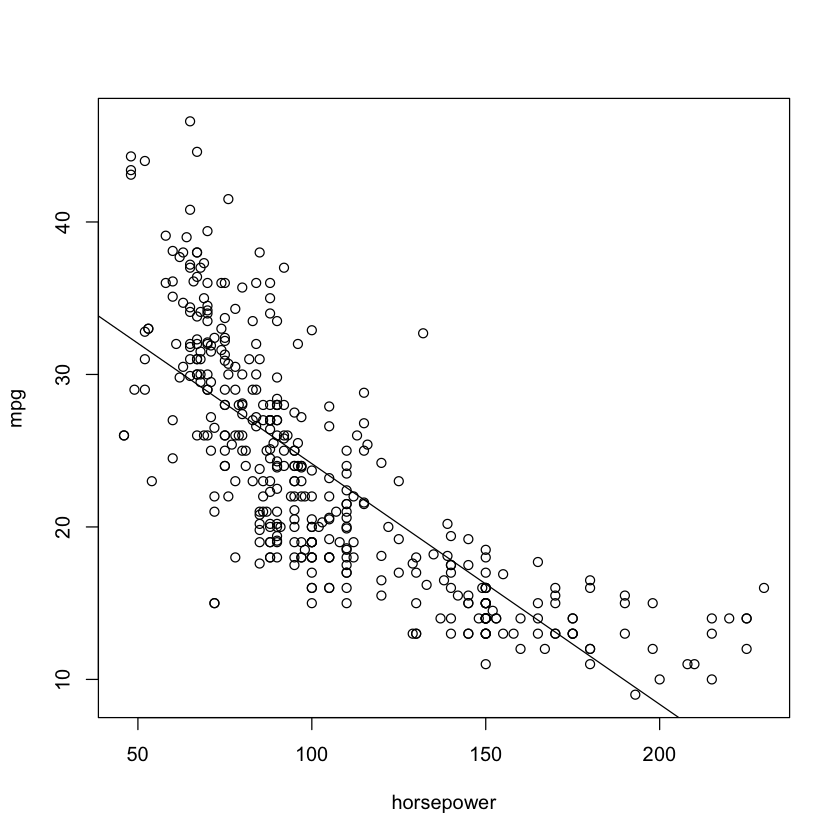

In [8]:
plot(horsepower, mpg)
abline(lm.fit)


**(c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.**



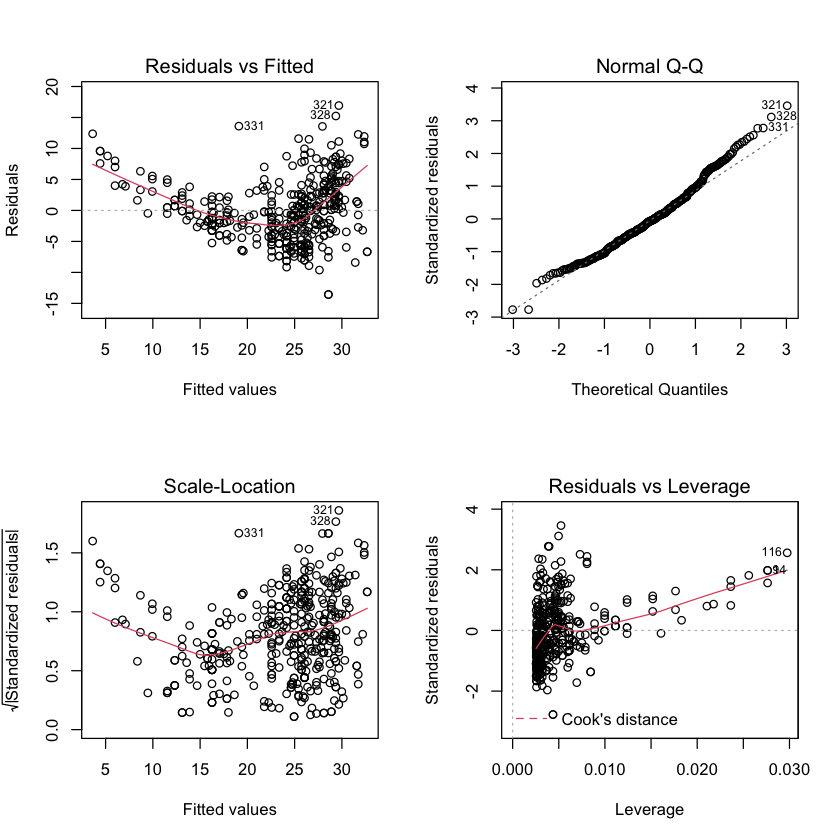

In [9]:
par(mfrow = c(2,2))
plot(lm.fit)


### Exercise 3.7.9

This question involves the use of multiple linear regression on the Auto data set.

**(a) Produce a scatterplot matrix which includes all of the variables in the data set.**


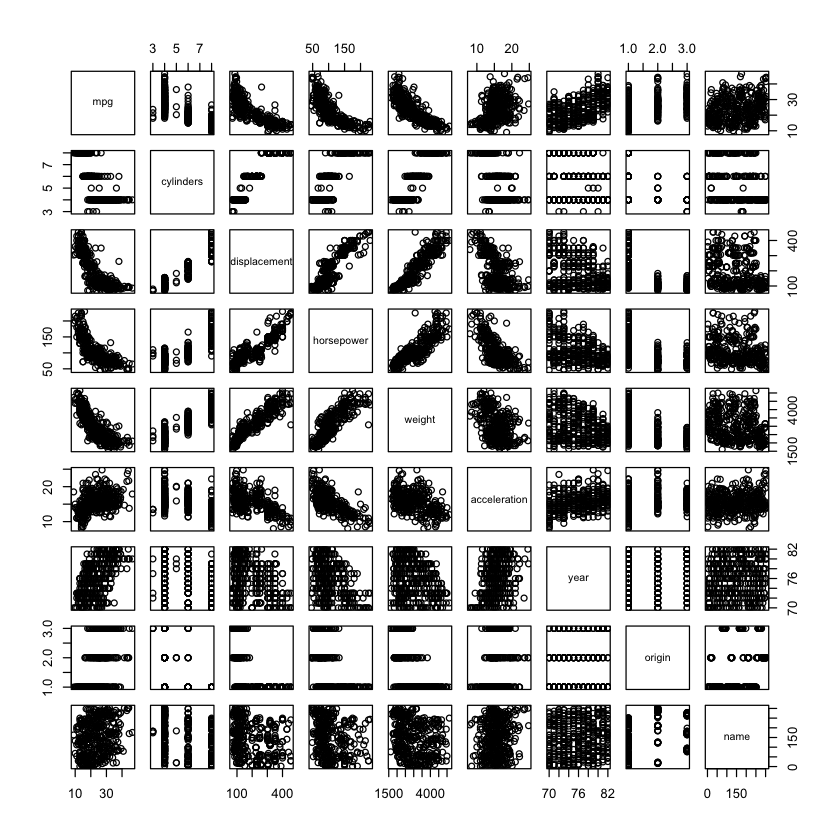

In [10]:
plot(Auto)



**(b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, cor() which is qualitative.**



In [11]:
quantityAuto <- Auto %>% select(-name)
cor(quantityAuto)


mpg        cylinders  displacement horsepower weight    
mpg           1.0000000 -0.7776175 -0.8051269   -0.7784268 -0.8322442
cylinders    -0.7776175  1.0000000  0.9508233    0.8429834  0.8975273
displacement -0.8051269  0.9508233  1.0000000    0.8972570  0.9329944
horsepower   -0.7784268  0.8429834  0.8972570    1.0000000  0.8645377
weight       -0.8322442  0.8975273  0.9329944    0.8645377  1.0000000
acceleration  0.4233285 -0.5046834 -0.5438005   -0.6891955 -0.4168392
year          0.5805410 -0.3456474 -0.3698552   -0.4163615 -0.3091199
origin        0.5652088 -0.5689316 -0.6145351   -0.4551715 -0.5850054
             acceleration year       origin    
mpg           0.4233285    0.5805410  0.5652088
cylinders    -0.5046834   -0.3456474 -0.5689316
displacement -0.5438005   -0.3698552 -0.6145351
horsepower   -0.6891955   -0.4163615 -0.4551715
weight       -0.4168392   -0.3091199 -0.5850054
acceleration  1.0000000    0.2903161  0.2127458
year          0.2903161    1.0000000  0.1815277
origin        0.2127458    0.1815277  1.0000000

**(c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results.**



In [12]:
lm.fit <- lm(mpg ~., data = quantityAuto)
summary(lm.fit)



Call:
lm(formula = mpg ~ ., data = quantityAuto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


**Comment on the output. For instance:**

**+ i. Is there a relationship between the predictors and the response?**

**+ ii. Which predictors appear to have a statistically significant relationship to the response?**

**+ iii. What does the coefficient for the year variable suggest?**

There is a relationship between some of the predictors and the response. The predictors that appear to have a statistically significant relationship to the response are displacement, weight, year, and origin. The coefficient for the year variable suggests that for every change in mpg, year affects the regression by 0.75 with a *significant positive relationship*.

**(d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit.**


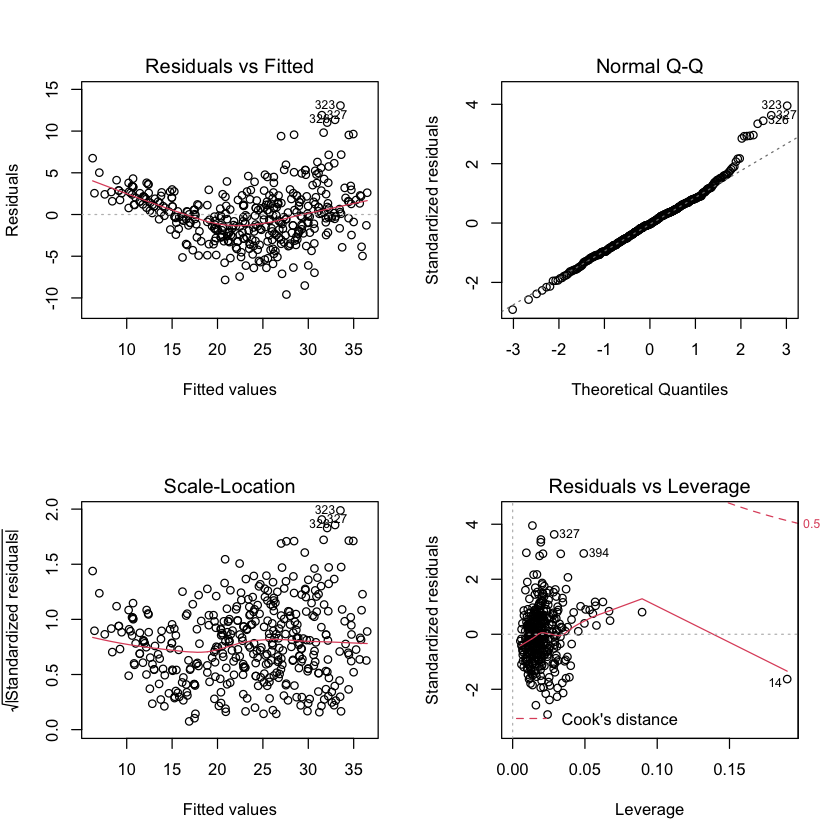

In [13]:
par(mfrow = c(2,2))
plot(lm.fit)


**Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?**

We can see that the residuals suggest unusually large outliers starting at x = 30 and beyond. We can also notice that there are some observations in the Residuals vs Leverage plot that falls outside the Cook's distance (red dashed line at the bottom), this indicates that they are influential points, high leverage.

**(e) Use the \* and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?**


In [14]:
lm.fit2 <- lm(mpg~displacement*weight, data = quantityAuto)
summary(lm.fit2)



Call:
lm(formula = mpg ~ displacement * weight, data = quantityAuto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8664  -2.4801  -0.3355   1.8071  17.9429 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          5.372e+01  1.940e+00  27.697  < 2e-16 ***
displacement        -7.831e-02  1.131e-02  -6.922 1.85e-11 ***
weight              -8.931e-03  8.474e-04 -10.539  < 2e-16 ***
displacement:weight  1.744e-05  2.789e-06   6.253 1.06e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.097 on 388 degrees of freedom
Multiple R-squared:  0.7265,	Adjusted R-squared:  0.7244 
F-statistic: 343.6 on 3 and 388 DF,  p-value: < 2.2e-16


In [15]:
lm.fit3 <- lm(mpg~displacement*year, data = quantityAuto)
summary(lm.fit3)



Call:
lm(formula = mpg ~ displacement * year, data = quantityAuto)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8530  -2.4250  -0.2234   2.0823  16.9933 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -7.288e+01  8.368e+00  -8.709  < 2e-16 ***
displacement       2.523e-01  4.059e-02   6.216 1.32e-09 ***
year               1.408e+00  1.102e-01  12.779  < 2e-16 ***
displacement:year -4.080e-03  5.453e-04  -7.482 4.96e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.729 on 388 degrees of freedom
Multiple R-squared:  0.7735,	Adjusted R-squared:  0.7718 
F-statistic: 441.7 on 3 and 388 DF,  p-value: < 2.2e-16


In [16]:
lm.fit4 <- lm(mpg~year*origin, data = quantityAuto)
summary(lm.fit4)



Call:
lm(formula = mpg ~ year * origin, data = quantityAuto)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.3141  -3.7120  -0.6513   3.3621  15.5859 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -83.3809    12.0000  -6.948 1.57e-11 ***
year          1.3089     0.1576   8.305 1.68e-15 ***
origin       17.3752     6.8325   2.543   0.0114 *  
year:origin  -0.1663     0.0889  -1.871   0.0621 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.199 on 388 degrees of freedom
Multiple R-squared:  0.5596,	Adjusted R-squared:  0.5562 
F-statistic: 164.4 on 3 and 388 DF,  p-value: < 2.2e-16


In [17]:
lm.fit5 <- lm(mpg~year*weight, data = quantityAuto)
summary(lm.fit5)
#displacement, weight, year, and origin



Call:
lm(formula = mpg ~ year * weight, data = quantityAuto)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0397 -1.9956 -0.0983  1.6525 12.9896 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.105e+02  1.295e+01  -8.531 3.30e-16 ***
year         2.040e+00  1.718e-01  11.876  < 2e-16 ***
weight       2.755e-02  4.413e-03   6.242 1.14e-09 ***
year:weight -4.579e-04  5.907e-05  -7.752 8.02e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.193 on 388 degrees of freedom
Multiple R-squared:  0.8339,	Adjusted R-squared:  0.8326 
F-statistic: 649.3 on 3 and 388 DF,  p-value: < 2.2e-16


The interaction between year:origin seems to not be statistically significant.

**(f) Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.**


In [18]:
lm.fit <- lm(mpg~year + I(year^2))
summary(lm.fit)



Call:
lm(formula = mpg ~ year + I(year^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.2681  -5.0887  -0.8619   4.6922  18.2275 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 565.72999  146.93208   3.850 0.000138 ***
year        -15.53584    3.87206  -4.012 7.21e-05 ***
I(year^2)     0.11028    0.02546   4.331 1.89e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.223 on 389 degrees of freedom
Multiple R-squared:  0.3675,	Adjusted R-squared:  0.3643 
F-statistic:   113 on 2 and 389 DF,  p-value: < 2.2e-16


In [19]:
lm.fit <- lm(mpg~year + log(year))
summary(lm.fit)



Call:
lm(formula = mpg ~ year + log(year))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.2727  -5.1030  -0.8339   4.7437  18.1913 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4177.461    975.784   4.281 2.34e-05 ***
year           18.042      3.863   4.670 4.15e-06 ***
log(year)   -1276.157    293.169  -4.353 1.72e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.222 on 389 degrees of freedom
Multiple R-squared:  0.3678,	Adjusted R-squared:  0.3646 
F-statistic: 113.2 on 2 and 389 DF,  p-value: < 2.2e-16


In [20]:
lm.fit <- lm(mpg~year + I(sqrt(year)))
summary(lm.fit)



Call:
lm(formula = mpg ~ year + I(sqrt(year)))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.2719  -5.0997  -0.8405   4.7305  18.2006 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2480.086    586.528   4.228 2.94e-05 ***
year            34.833      7.729   4.507 8.71e-06 ***
I(sqrt(year)) -585.630    134.688  -4.348 1.76e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.222 on 389 degrees of freedom
Multiple R-squared:  0.3678,	Adjusted R-squared:  0.3645 
F-statistic: 113.1 on 2 and 389 DF,  p-value: < 2.2e-16


Using different transformations for the variable year, we noticed that the near-zero *p*-value associated with the quadratic term suggests that it leads to an improved model, the Std. Error is also lowered for year^2. This is not the case for the other transformations. The other transformations are still significant but the Std. Error is way higher while also the *p*-value is a little bit higher too, for theses cases the coefficient is only showing the relationship between the variables, the coefficients make sense since we are using a log function and also √year, hence why these values are negatives.

### Exercise 4.10

This question should be answered using the Carseats data set.

**(a) Fit a multiple regression model to predict Sales using Price, Urban, and US.**


In [21]:
lm.fit <- lm(Sales~Price+Urban+US, data = Carseats)
summary(lm.fit)



Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


**(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!**

Each coefficient indicates how it is affecting Sales. Price has a **negative high significant relationship** while the UrbanYes (which is a 1 because it is a qualitative variable) has no significant relationship with Sales, finally USYes (again qualitative) has a **positive significant relationship**.

**(c) Write out the model in equation form, being careful to handle the qualitative variables properly.**

Sales = 13.043469 -0.054459*Price - 0.021916*UrbanYes +1.200573\*USYes + error

We do not include "No" for US or Urban as the dummy variable is zero, we would be multiplying by zero.

**(d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?**

We can reject the null hypothesis for Price and USYes.

**(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.**


In [22]:
lm.fit <- lm(Sales~Price+US, data = Carseats)
summary(lm.fit)



Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


**(f) How well do the models in (a) and (e) fit the data?** Model (a) has a non significant variable which is UrbanYes, comparing this model to model (e) which every variable is significant, model (e) has a lower R-squared compared to model (a). Model (e) also has lower Std. Error for some predictors while Multiple R-squared for both is the same. We would need to choose model (e) since this model has every single predictor rejecting the null hypothesis while model (a) has one predictor accepting H0.

**(g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).**


In [23]:
# 95 % Confidence Interval
predict(lm.fit, data.frame(Price = 150, US = "Yes"), interval = "confidence")
# Predicted is 6.058791
# Interval is (5.602926, 6.514655)


fit      lwr      upr     
1 6.058791 5.602926 6.514655

**(h) Is there evidence of outliers or high leverage observations in the model from (e)?**



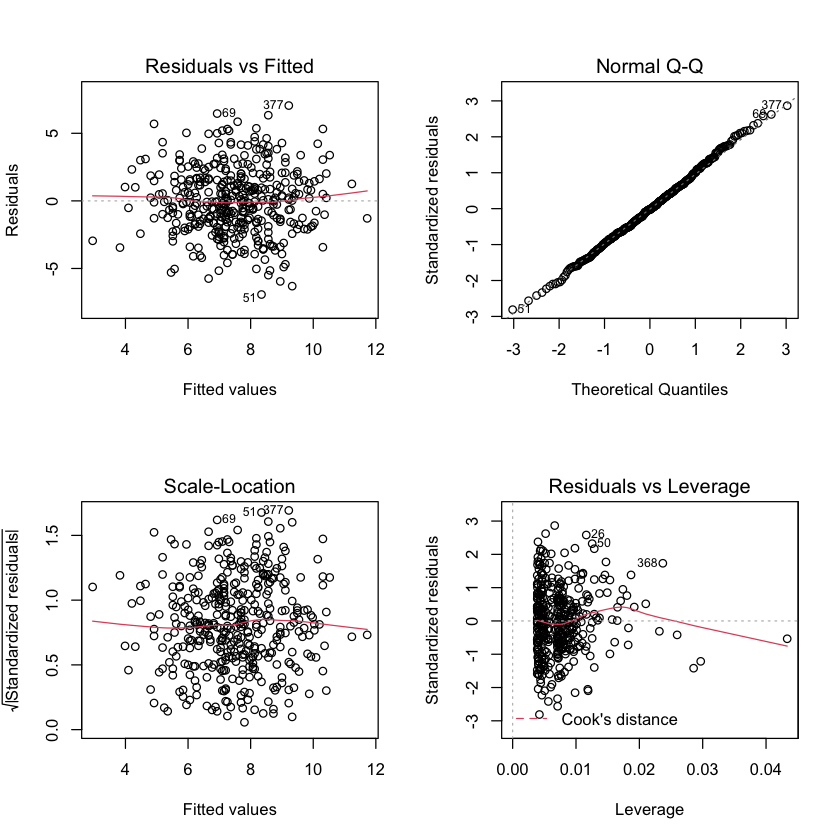

In [24]:
par(mfrow = c(2,2))
plot(lm.fit)


There is evidence of high leverage observations, outliers seem to be present although not drastically away from the data.

### Exercise 4.7.10

This question should be answered using the Weekly data set, which is part of the ISLR2 package. This data is similar in nature to the Smarket data from this chapter's lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.


In [25]:
#install.packages("ISLR")
#install.packages("MASS")
#install.packages("olsrr")
library("ISLR")
library("tidyverse")
library("MASS")
library ("e1071")
library("class")
library("rsample")
library("olsrr")



Attaching package: ‘ISLR’


The following objects are masked from ‘package:ISLR2’:

    Auto, Credit


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1
✔ readr   2.1.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


The following object is masked from ‘package:ISLR2’:

    Boston



Attaching package: ‘rsample’


The following object is masked from ‘package:e1071’:

    permutations



Attaching package: ‘olsrr’


The following object is masked from ‘package:MASS’:

    cement


The following object is masked from ‘package:datasets’:

    rivers




**(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?**



In [26]:
data("Weekly")
weekly_db<-Weekly
summary(weekly_db)


      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

There´s not a clear difference in the predictors in terms of the objective variable.



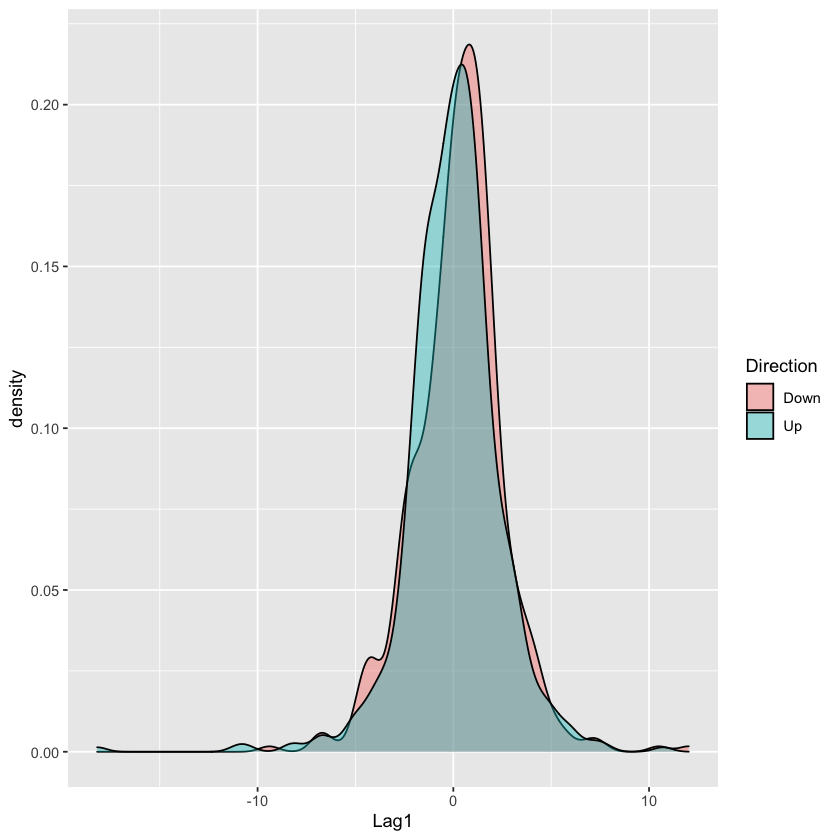

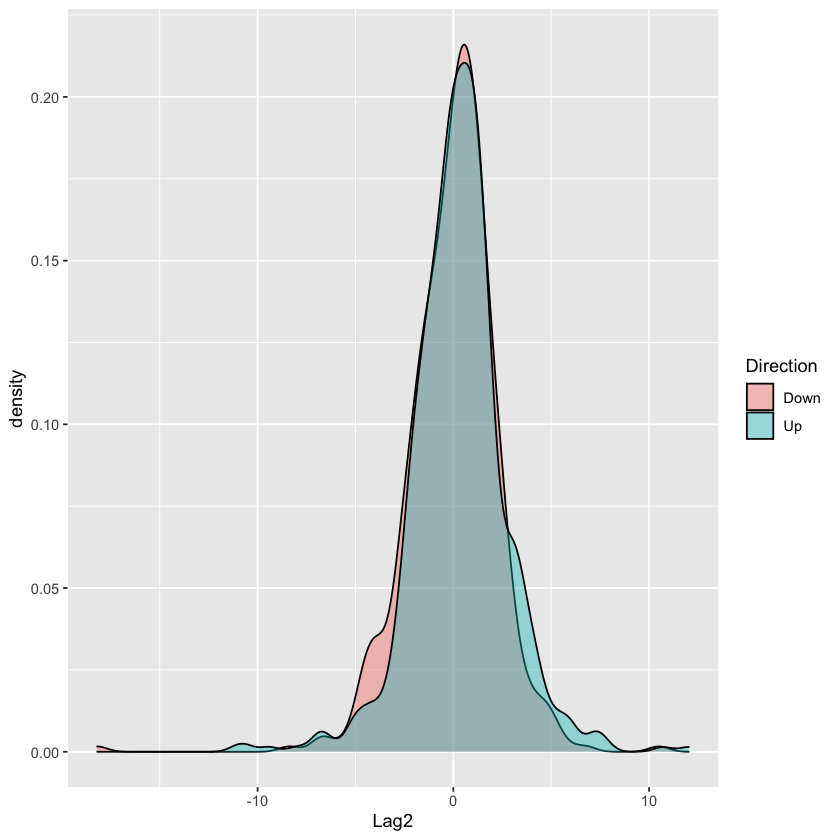

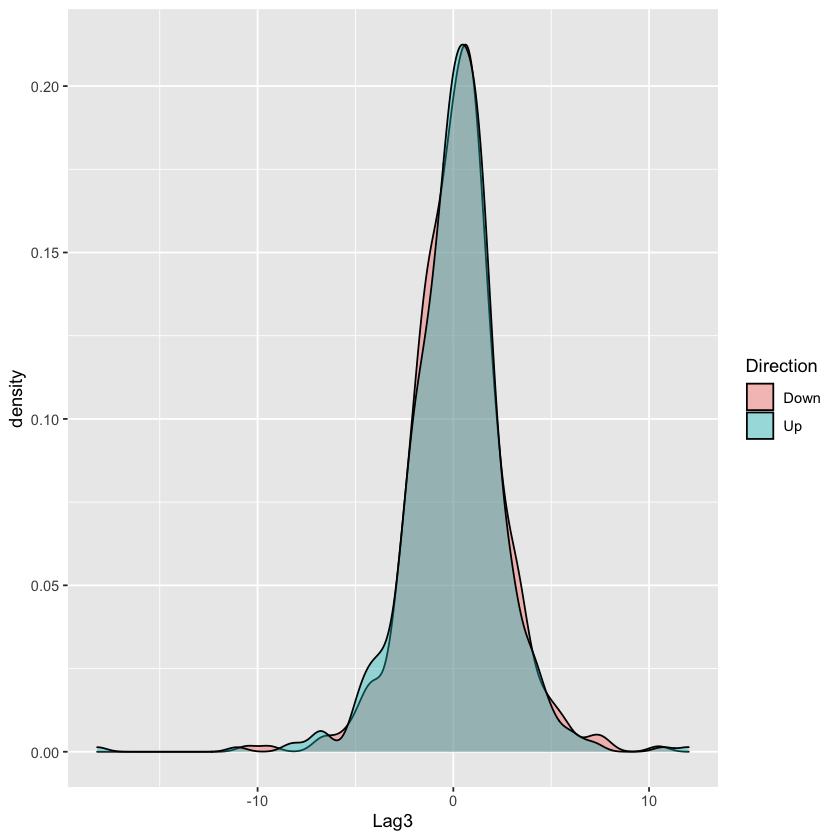

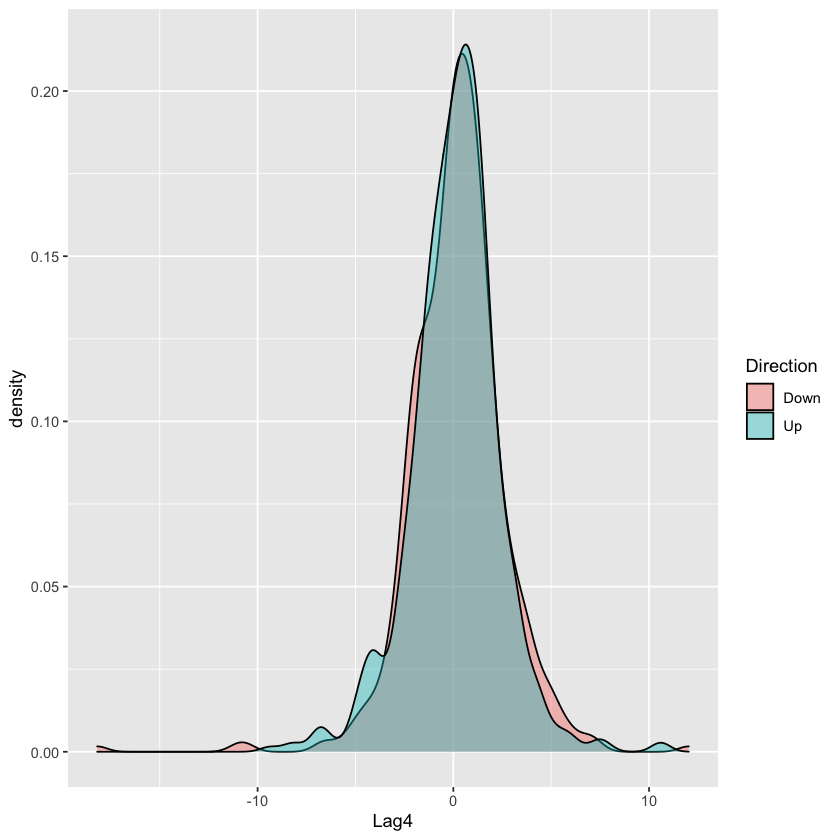

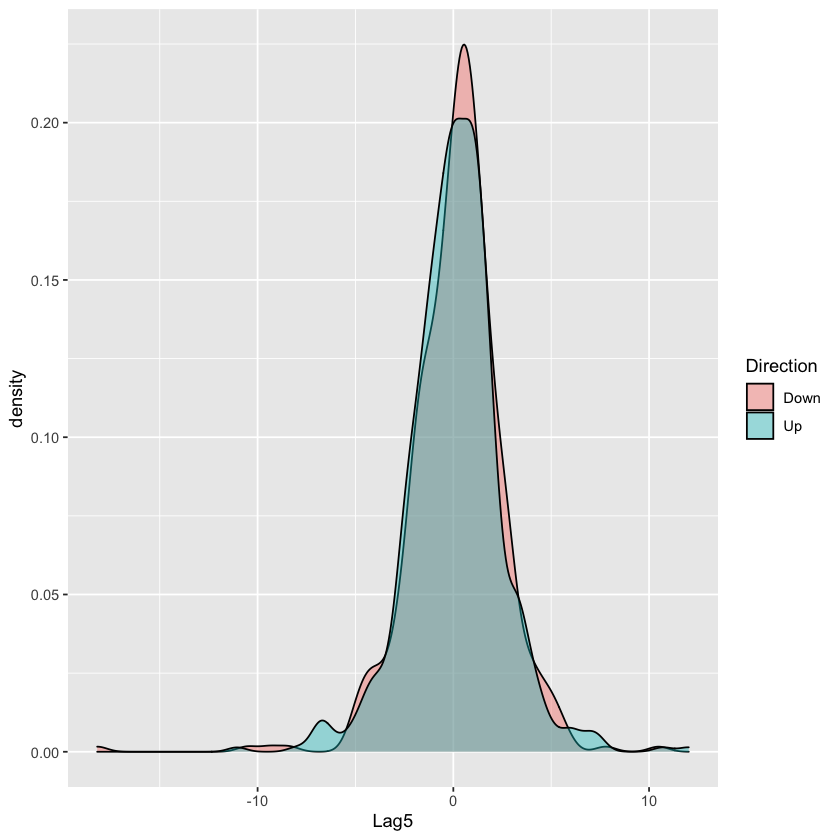

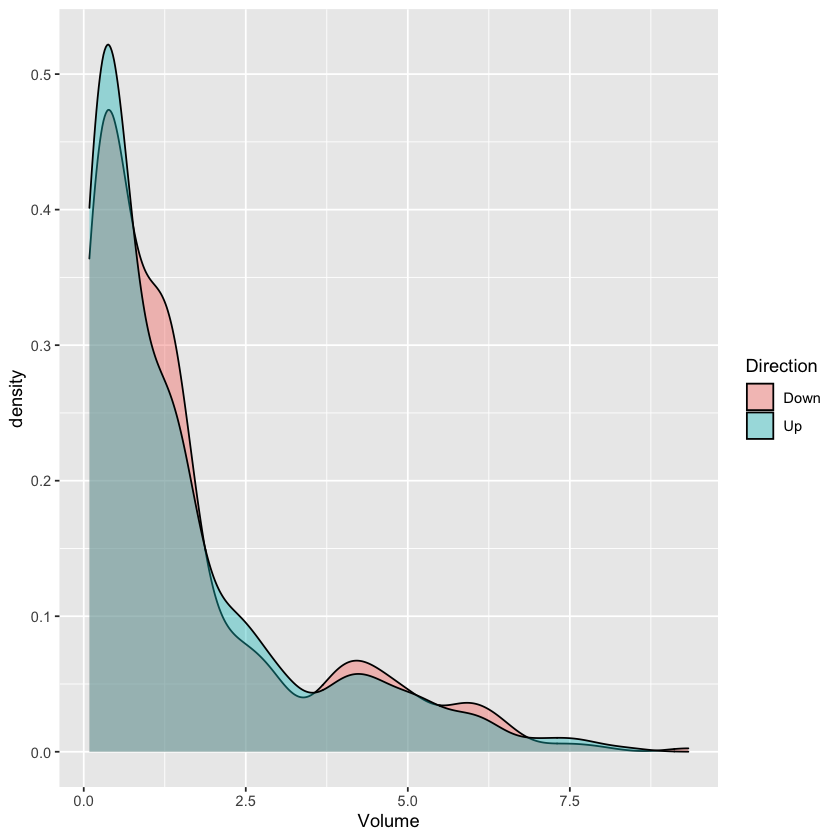

In [27]:
ggplot(data=weekly_db, aes(x=Lag1, group=Direction, fill=Direction)) +
    geom_density(alpha=.4) 

ggplot(data=weekly_db, aes(x=Lag2, group=Direction, fill=Direction)) +
    geom_density(alpha=.4) 

ggplot(data=weekly_db, aes(x=Lag3, group=Direction, fill=Direction)) +
    geom_density(alpha=.4) 

ggplot(data=weekly_db, aes(x=Lag4, group=Direction, fill=Direction)) +
    geom_density(alpha=.4) 

ggplot(data=weekly_db, aes(x=Lag5, group=Direction, fill=Direction)) +
    geom_density(alpha=.4) 

ggplot(data=weekly_db, aes(x=Volume, group=Direction, fill=Direction)) +
    geom_density(alpha=.4) 


**(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?**

The predictor *Lag 2* is statistically significant with a 95% confidence interval and the intercept also is significant with a 99% confidence interval.


In [28]:
glm.fits <- glm (Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume ,
data=weekly_db , family = binomial)
summary (glm.fits)



Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = weekly_db)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


**(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.**



In [29]:
glm_probs <- predict (glm.fits ,data=weekly_db)
glm_pred <- rep (" Down ", 1089)
glm_pred[glm_probs > .5] = "Up"


Confussion Matrix



In [30]:
cm1<-table (glm_pred , weekly_db$Direction)
cm1


        
glm_pred Down  Up
   Down   465 563
  Up       19  42

Accuracy Total



In [31]:
acc1<-(cm1[1]+cm1[4])/nrow(weekly_db)
acc1


[1] 0.4655647

Accuracy *Up* (*Sensitivity*)



In [32]:
acc_up1<-cm1[4]/(cm1[4]+cm1[3])
acc_up1


[1] 0.06942149

Accuracy *Down* (*Specificity*)



In [33]:
acc_dw1<-cm1[1]/(cm1[2]+cm1[1])
acc_dw1


[1] 0.9607438

**(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).**



In [34]:
weekly_train<-weekly_db[which(weekly_db$Year<=2008),]
weekly_test<-weekly_db[which(weekly_db$Year>=2009),] 
weekly_dir_test<-weekly_test$Direction


glm.fits2 <- glm (Direction ~ Lag2 , data=weekly_train , family = binomial)

glm_probs2 <- predict (glm.fits2 , newdata=weekly_test, type = "response")
glm_pred2 <- rep (" Down ", 104)
glm_pred2[glm_probs2 > .5] = "Up"


Confussion Matrix



In [35]:
cm2<-table (glm_pred2 , weekly_dir_test)
cm2


         weekly_dir_test
glm_pred2 Down Up
    Down     9  5
   Up       34 56

Accuracy Total



In [36]:
acc2<-(cm2[1]+cm2[4])/nrow(weekly_test)
acc2


[1] 0.625

Accuracy *Up* (*Sensitivity*)



In [37]:
acc_up2<-cm2[4]/(cm2[4]+cm2[3])
acc_up2


[1] 0.9180328

Accuracy *Down* (*Specificity*)



In [38]:
acc_dw2<-cm2[1]/(cm2[2]+cm2[1])
acc_dw2


[1] 0.2093023

**(e) Repeat (d) using LDA.**



In [39]:
lda.fit <- lda (Direction ~ Lag2 ,  data=weekly_train)
lda_pred <- predict (lda.fit , weekly_test)


Confussion Matrix



In [40]:
cm3<-table (lda_pred$class , weekly_dir_test)
cm3


      weekly_dir_test
       Down Up
  Down    9  5
  Up     34 56

Accuracy Total



In [41]:
acc3<-(cm3[1]+cm3[4])/nrow(weekly_test)
acc3


[1] 0.625

Accuracy *Up* (*Sensitivity*)



In [42]:
acc_up3<-cm3[4]/(cm3[4]+cm3[3])
acc_up3


[1] 0.9180328

Accuracy *Down* (*Specificity*)



In [43]:
acc_dw3<-cm3[1]/(cm3[2]+cm3[1])
acc_dw3


[1] 0.2093023

**(f) Repeat (d) using QDA.**



In [44]:
qda.fit <- qda (Direction ~ Lag2 ,  data=weekly_train)
qda_pred <- predict (qda.fit , weekly_test)


Confussion Matrix



In [45]:
cm4<-table (qda_pred$class , weekly_dir_test)
cm4


      weekly_dir_test
       Down Up
  Down    0  0
  Up     43 61

Accuracy Total



In [46]:
acc4<-(cm4[1]+cm4[4])/nrow(weekly_test)
acc4


[1] 0.5865385

Accuracy *Up* (*Sensitivity*)



In [47]:
acc_up4<-cm4[4]/(cm4[4]+cm4[3])
acc_up4


[1] 1

Accuracy *Down* (*Specificity*)



In [48]:
acc_dw4<-cm4[1]/(cm4[2]+cm4[1])
acc_dw4


[1] 0

**(g) Repeat (d) using KNN with K = 1.**



In [49]:
weekly_dir_train<-weekly_train$Direction
weekly_train_x<- weekly_train[,2:8]
weekly_test_x<- weekly_test[,2:8]

set.seed (123)
knn_pred <- knn(weekly_train_x, weekly_test_x, weekly_dir_train , k = 1)


Confussion Matrix



In [50]:
cm5<-table (knn_pred , weekly_dir_test)
cm5


        weekly_dir_test
knn_pred Down Up
    Down   35  9
    Up      8 52

Accuracy Total



In [51]:
acc5<-(cm5[1]+cm5[4])/nrow(weekly_test)
acc5


[1] 0.8365385

Accuracy *Up* (*Sensitivity*)



In [52]:
acc_up5<-cm5[4]/(cm5[4]+cm5[3])
acc_up5


[1] 0.852459

Accuracy *Down* (*Specificity*)



In [53]:
acc_dw5<-cm5[1]/(cm5[2]+cm5[1])
acc_dw5


[1] 0.8139535

**(h) Repeat (d) using naive Bayes.**



In [54]:
nb.fit <- naiveBayes (Direction ~ Lag2 ,  data=weekly_train)
nb_pred <- predict (nb.fit , weekly_test)


Confussion Matrix



In [55]:
cm6<-table (nb_pred , weekly_dir_test)
cm6


       weekly_dir_test
nb_pred Down Up
   Down    0  0
   Up     43 61

Accuracy Total



In [56]:
acc6<-(cm6[1]+cm6[4])/nrow(weekly_test)
acc6


[1] 0.5865385

Accuracy *Up* (*Sensitivity*)



In [57]:
acc_up6<-cm6[4]/(cm6[4]+cm6[3])
acc_up6


[1] 1

Accuracy *Down* (*Specificity*)



In [58]:
acc_dw6<-cm6[1]/(cm6[2]+cm6[1])
acc_dw6


[1] 0

**(i) Which of these methods appears to provide the best results on this data?**

The model that show the best performance is the **K-Nearest Neighbors**.


In [59]:
model <- c("GLM", "LDA","QDA","KNN","NB")
total_acc <- c(acc2,acc3,acc4,acc5,acc6)
sensitivity <- c(acc_up2, acc_up3, acc_up4, acc_up5, acc_up6)
specificity <- c(acc_dw2, acc_dw3, acc_dw4, acc_dw5, acc_dw6)

results_weekly <- data.frame(model, total_acc,sensitivity,specificity)
results_weekly


model total_acc sensitivity specificity
1 GLM   0.6250000 0.9180328   0.2093023  
2 LDA   0.6250000 0.9180328   0.2093023  
3 QDA   0.5865385 1.0000000   0.0000000  
4 KNN   0.8365385 0.8524590   0.8139535  
5 NB    0.5865385 1.0000000   0.0000000

### Exercise 4.7.11

In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

**(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.**


In [60]:
data(Auto)
auto_db<- Auto
summary(auto_db)


      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

In [61]:
auto_db$mpg01<-0
auto_db[which(auto_db$mpg>=median(auto_db$mpg)),10]<-1
auto_db$mpg01<-as.factor(auto_db$mpg01)

summary(auto_db)


      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

**(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.**

In all the variables there is a clear difference in terms of the objective variable. The ones with the more visual difference are (*cylinders*, *displacement*, *horsepower*, *weight* and *origin*).


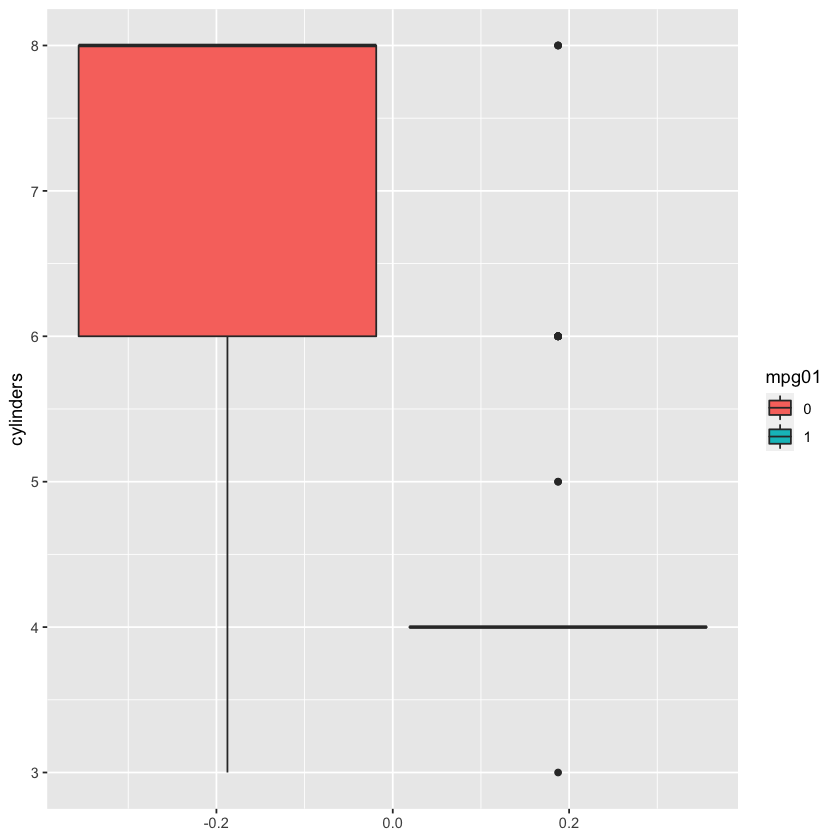

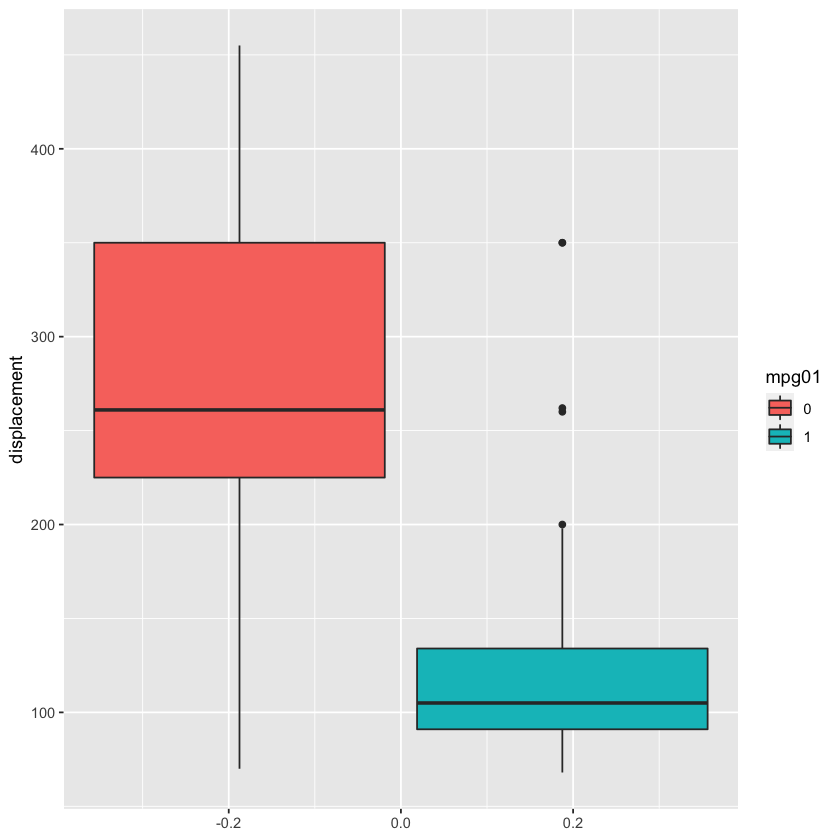

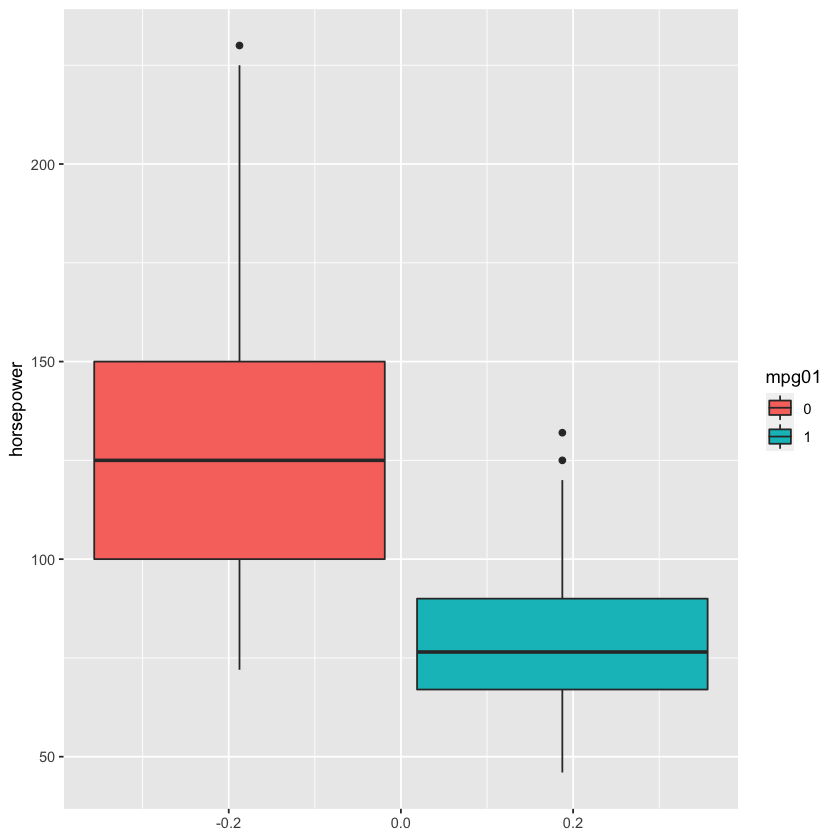

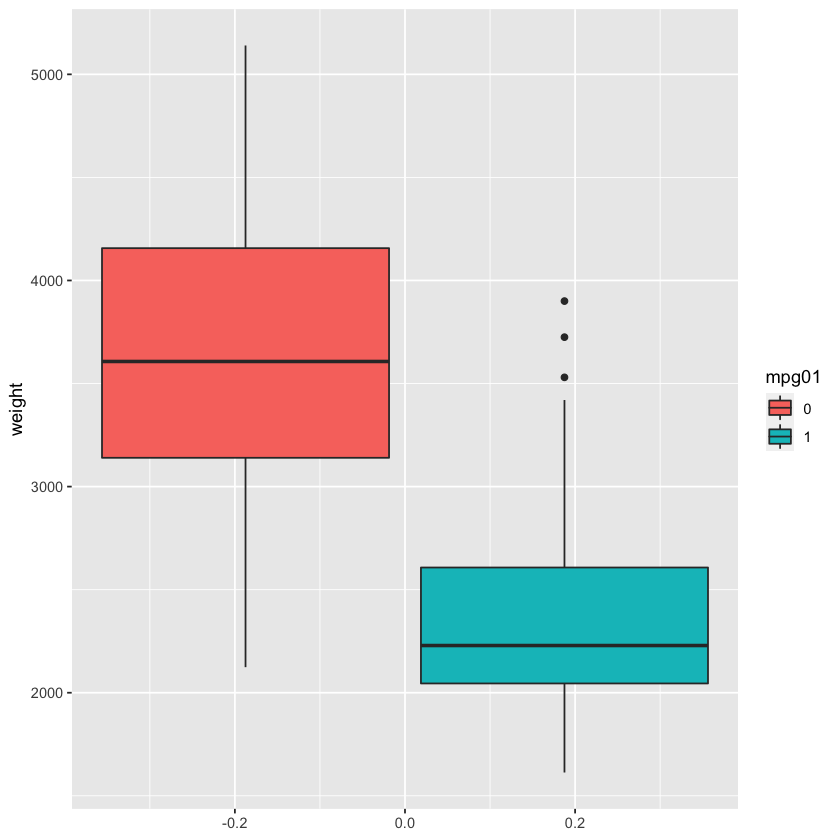

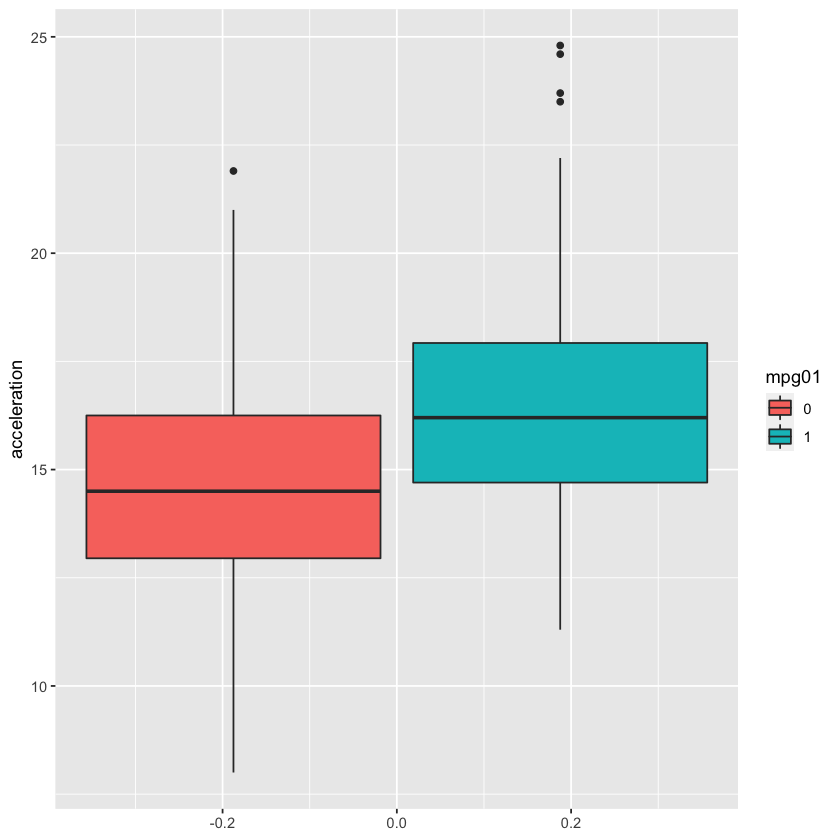

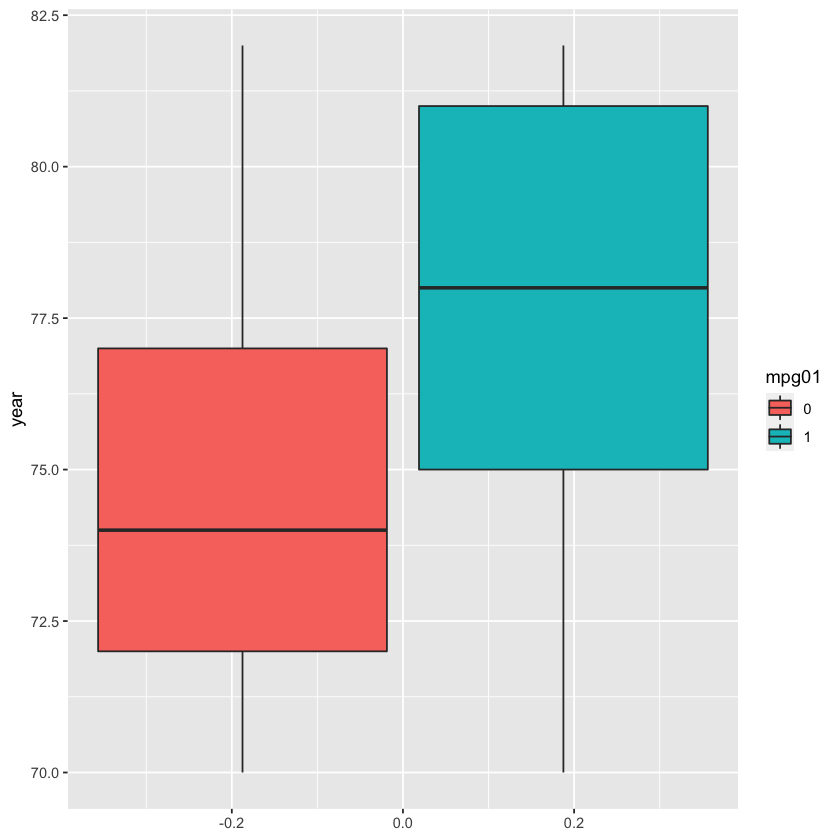

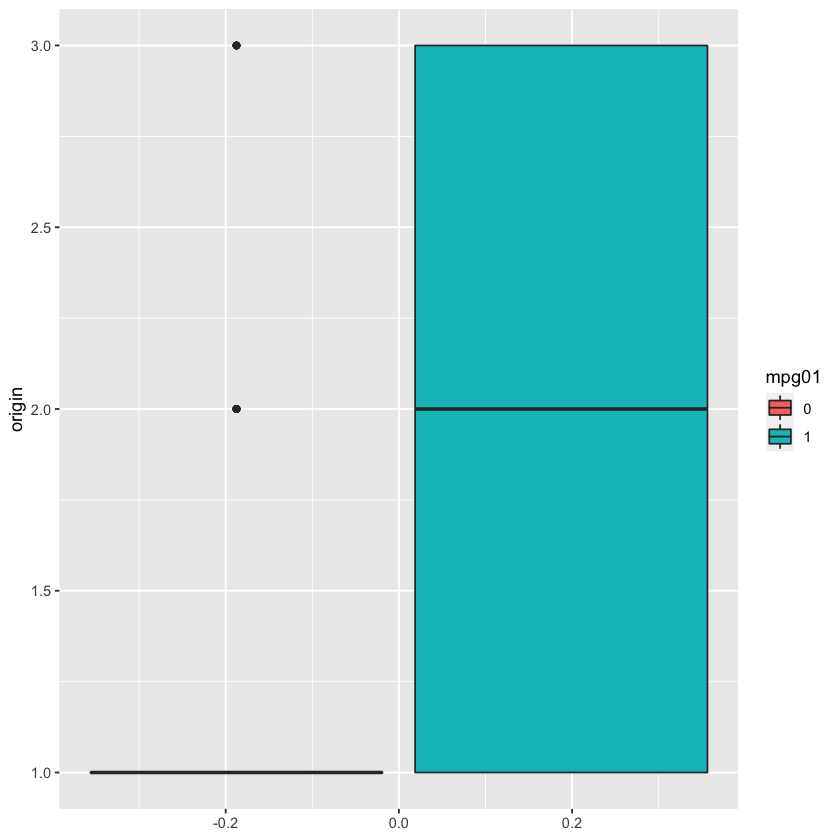

In [62]:
ggplot(aes(y=cylinders,fill=mpg01), data=auto_db) + geom_boxplot()

ggplot(aes(y=displacement,fill=mpg01), data=auto_db) + geom_boxplot()

ggplot(aes(y=horsepower,fill=mpg01), data=auto_db) + geom_boxplot()

ggplot(aes(y=weight,fill=mpg01), data=auto_db) + geom_boxplot()

ggplot(aes(y=acceleration,fill=mpg01), data=auto_db) + geom_boxplot()

ggplot(aes(y=year,fill=mpg01), data=auto_db) + geom_boxplot()

ggplot(aes(y=origin,fill=mpg01), data=auto_db) + geom_boxplot()


**(c) Split the data into a training set and a test set.**



In [63]:
set.seed(123) 
split_auto<- initial_split(
                data = auto_db,    # Datos
                prop = 0.8,     # Proporcion conjunto entrenamiento
                strata = mpg01  # Variable objetivo
                )

auto_train <- training(split_auto)
auto_test <- testing(split_auto)
auto_test_mpg01<-auto_test$mpg01


**(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?**



In [64]:
lda.fit_auto <- lda (mpg01 ~ cylinders + displacement + horsepower + weight + origin,   data=auto_train)
lda_pred_auto <- predict (lda.fit_auto , auto_test)


Confussion Matrix



In [65]:
cm1_auto<-table (lda_pred_auto$class , auto_test_mpg01)
cm1_auto


   auto_test_mpg01
     0  1
  0 32  2
  1  8 38

Accuracy Total



In [66]:
acc1_auto<-(cm3[1]+cm3[4])/nrow(auto_test)
acc1_auto


[1] 0.8125

Accuracy *1 - over median* (*Sensitivity*)



In [67]:
acc1_1_auto<-cm1_auto[4]/(cm1_auto[4]+cm1_auto[3])
acc1_1_auto


[1] 0.95

Accuracy *0 - under median* (*Specificity*)



In [68]:
acc1_0_auto<-cm1_auto[1]/(cm1_auto[2]+cm1_auto[1])
acc1_0_auto


[1] 0.8

**(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?**



In [69]:
qda.fit_auto <- qda (mpg01 ~ cylinders + displacement + horsepower + weight + origin,   data=auto_train)
qda_pred <- predict (qda.fit_auto , auto_test)


Confussion Matrix



In [70]:
cm2_auto<-table (qda_pred$class , auto_test_mpg01)
cm2_auto


   auto_test_mpg01
     0  1
  0 34  3
  1  6 37

Accuracy Total



In [71]:
acc2_auto<-(cm2_auto[1]+cm2_auto[4])/nrow(auto_test)
acc2_auto


[1] 0.8875

Accuracy *1 - over median* (*Sensitivity*)



In [72]:
acc2_1_auto<-cm2_auto[4]/(cm2_auto[4]+cm2_auto[3])
acc2_1_auto


[1] 0.925

Accuracy *0 - under median* (*Specificity*)



In [73]:
acc2_0_auto<-cm2_auto[1]/(cm2_auto[2]+cm2_auto[1])
acc2_0_auto


[1] 0.85

**(f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?**



In [74]:
glm.fits_auto <- glm (mpg01 ~ cylinders + displacement + horsepower + weight + origin,   data=auto_train, family = binomial)
glm_probs_auto <- predict (glm.fits_auto , newdata=auto_test, type = "response")
glm_pred_auto <- rep (0, nrow(auto_test))
glm_pred_auto[glm_probs_auto > .5] = 1


Confussion Matrix



In [75]:
cm3_auto<-table (glm_pred_auto , auto_test_mpg01)
cm3_auto


             auto_test_mpg01
glm_pred_auto  0  1
            0 33  3
            1  7 37

Accuracy Total



In [76]:
acc3_auto<-(cm3_auto[1]+cm3_auto[4])/nrow(auto_test)
acc3_auto


[1] 0.875

Accuracy *1 - over median* (*Sensitivity*)



In [77]:
acc3_1_auto<-cm3_auto[4]/(cm3_auto[4]+cm3_auto[3])
acc3_1_auto


[1] 0.925

Accuracy *0 - under median* (*Specificity*)



In [78]:
acc3_0_auto<-cm3_auto[1]/(cm3_auto[2]+cm3_auto[1])
acc3_0_auto


[1] 0.825

**(g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained**



In [79]:
nb.fit_auto <- naiveBayes(mpg01 ~ cylinders + displacement + horsepower + weight + origin,   data=auto_train)
nb_pred_auto <- predict (nb.fit_auto , auto_test)


Confussion Matrix



In [80]:
cm4_auto<-table (nb_pred_auto , auto_test_mpg01)
cm4_auto


            auto_test_mpg01
nb_pred_auto  0  1
           0 32  2
           1  8 38

Accuracy Total



In [81]:
acc4_auto<-(cm4_auto[1]+cm4_auto[4])/nrow(auto_test)
acc4_auto


[1] 0.875

Accuracy *1 - over median* (*Sensitivity*)



In [82]:
acc4_1_auto<-cm4_auto[4]/(cm4_auto[4]+cm4_auto[3])
acc4_1_auto


[1] 0.95

Accuracy *0 - over median* (*Specificity*)



In [83]:
acc4_0_auto<-cm4_auto[1]/(cm4_auto[2]+cm4_auto[1])
acc4_0_auto


[1] 0.8

**(h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain?**



In [84]:
auto_train_mpg01<-auto_train$mpg01
auto_train_x<- auto_train[,c(2,3,4,5,8)]
auto_test_x<- auto_test[,c(2,3,4,5,8)]

set.seed (123)
knn_pred_auto <- knn(auto_train_x, auto_test_x, auto_train_mpg01 , k = 1)


Confussion Matrix



In [85]:
cm5_auto<-table (knn_pred_auto , auto_test_mpg01)
cm5_auto


             auto_test_mpg01
knn_pred_auto  0  1
            0 31  4
            1  9 36

Accuracy Total



In [86]:
acc5_auto<-(cm5_auto[1]+cm5_auto[4])/nrow(auto_test)
acc5_auto


[1] 0.8375

Accuracy *1 - over median* (*Sensitivity*)



In [87]:
acc5_1_auto<-cm5_auto[4]/(cm5_auto[4]+cm5_auto[3])
acc5_1_auto


[1] 0.9

Accuracy *0 - over median* (*Specificity*)



In [88]:
acc5_0_auto<-cm5_auto[1]/(cm5_auto[2]+cm5_auto[1])
acc5_0_auto


[1] 0.775

# Problem 2: Application Problems

Note that some details are missing for all the following examples, the problems lack a complete explanation, and the code may need adequate comments. In this form, you must present a proper mathematical formulation, a brief background of the problem (and its bibliographical references) and, a much better explanation.

## 1. The *olsrr* Package


In [89]:
# Install release version from CRAN
# install.packages("olsrr")


#### Regression

Ordinary least squares regression.


In [90]:
library(olsrr)
ols_regress(mpg ~ disp + hp + wt + qsec, data = mtcars)


                        Model Summary                          
--------------------------------------------------------------
R                       0.914       RMSE                2.622 
R-Squared               0.835       Coef. Var          13.051 
Adj. R-Squared          0.811       MSE                 6.875 
Pred R-Squared          0.771       MAE                 1.858 
--------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                               ANOVA                                 
--------------------------------------------------------------------
                Sum of                                              
               Squares        DF    Mean Square      F         Sig. 
--------------------------------------------------------------------
Regression     940.412         4        235.103    34.195    0.0000 
Residual       185.635        27          6.875            

#### Stepwise Regression

Build regression model from a set of candidate predictor variables by entering and removing predictors based on *p*-values, in a stepwise manner until there is no variable left to enter or remove any more.

##### Variable Selection


In [91]:
model <- lm(y ~ ., data = surgical)
ols_step_both_p(model)



                                Stepwise Selection Summary                                 
------------------------------------------------------------------------------------------
                        Added/                   Adj.                                         
Step     Variable      Removed     R-Square    R-Square     C(p)        AIC         RMSE      
------------------------------------------------------------------------------------------
   1    liver_test     addition       0.455       0.444    62.5120    771.8753    296.2992    
   2     alc_heavy     addition       0.567       0.550    41.3680    761.4394    266.6484    
   3    enzyme_test    addition       0.659       0.639    24.3380    750.5089    238.9145    
   4      pindex       addition       0.750       0.730     7.5370    735.7146    206.5835    
   5        bcs        addition       0.781       0.758     3.1920    730.6204    195.4544    
------------------------------------------------------------

#### Stepwise AIC Backward Regression

Build regression model from a set of candidate predictor variables by removing predictors based on Akaike Information Criteria, in a stepwise manner until there is no variable left to remove any more.

##### Variable Selection


In [92]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_backward_aic(model)
k




                        Backward Elimination Summary                         
---------------------------------------------------------------------------
Variable        AIC          RSS          Sum Sq        R-Sq      Adj. R-Sq 
---------------------------------------------------------------------------
Full Model    736.390    1825905.713    6543614.824    0.78184      0.74305 
alc_mod       734.407    1826477.828    6543042.709    0.78177      0.74856 
gender        732.494    1829435.617    6540084.920    0.78142      0.75351 
age           730.620    1833716.447    6535804.090    0.78091      0.75808 
---------------------------------------------------------------------------


#### Breusch Pagan Test

Breusch Pagan test is used to test for herteroskedasticity (non-constant error variance). It tests whether the variance of the errors from a regression is dependent on the values of the independent variables. It is a χ2 test.

Test for constant variance. It assumes that the error terms are normally distributed.


In [93]:
model <- lm(mpg ~ disp + hp + wt + drat, data = mtcars)
ols_test_breusch_pagan(model)



 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

             Data               
 -------------------------------
 Response : mpg 
 Variables: fitted values of mpg 

       Test Summary         
 ---------------------------
 DF            =    1 
 Chi2          =    1.429672 
 Prob > Chi2   =    0.231818 

#### Collinearity Diagnostics

Variance inflation factor, tolerance, eigenvalues and condition indices. Collinearity implies two variables are near perfect linear combinations of one another. Multicollinearity involves more than two variables. In the presence of multicollinearity, regression estimates are unstable and have high standard errors.


In [94]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_coll_diag(model)


Tolerance and Variance Inflation Factor
---------------------------------------
  Variables Tolerance      VIF
1      disp 0.1252279 7.985439
2        hp 0.1935450 5.166758
3        wt 0.1445726 6.916942
4      qsec 0.3191708 3.133119


Eigenvalue and Condition Index
------------------------------
   Eigenvalue Condition Index   intercept        disp          hp           wt
1 4.721487187        1.000000 0.000123237 0.001132468 0.001413094 0.0005253393
2 0.216562203        4.669260 0.002617424 0.036811051 0.027751289 0.0002096014
3 0.050416837        9.677242 0.001656551 0.120881424 0.392366164 0.0377028008
4 0.010104757       21.616057 0.025805998 0.777260487 0.059594623 0.7017528428
5 0.001429017       57.480524 0.969796790 0.063914571 0.518874831 0.2598094157
          qsec
1 0.0001277169
2 0.0046789491
3 0.0001952599
4 0.0024577686
5 0.9925403056

### a) Introduction to *olsrr*

-   Residual Diagnostics: Includes plots to examine residuals to validate OLS assumptions

-   Variable selection: Different variable selection procedures such as all possible regression, best subset regression, stepwise regression, stepwise forward regression and stepwise backward regression

-   Heteroskedasticity: Tests for heteroskedasticity include bartlett test, breusch pagan test, score test and f test

-   Measures of influence: Includes 10 different plots to detect and identify influential observations

-   Collinearity diagnostics: VIF, Tolerance and condition indices to detect collinearity and plots for assessing mode fit and contributions of variables

#### Regression

Ordinary least squares regression. In the presence of interaction terms in the model, the predictors are scaled and centered before computing the standardized betas, you can indicate the presence of interaction terms by setting iterm to TRUE.


In [95]:
ols_regress(mpg ~ disp + hp + wt + qsec, data = mtcars)



                        Model Summary                          
--------------------------------------------------------------
R                       0.914       RMSE                2.622 
R-Squared               0.835       Coef. Var          13.051 
Adj. R-Squared          0.811       MSE                 6.875 
Pred R-Squared          0.771       MAE                 1.858 
--------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                               ANOVA                                 
--------------------------------------------------------------------
                Sum of                                              
               Squares        DF    Mean Square      F         Sig. 
--------------------------------------------------------------------
Regression     940.412         4        235.103    34.195    0.0000 
Residual       185.635        27          6.875            

#### Residual vs Fitted Values Plot

Plot to detect non-linearity, unequal error variances, and outliers. Scatter plot of residuals on the y axis and fitted values on the x axis to detect non-linearity, unequal error variances, and outliers.

Characteristics of a well behaved residual vs fitted plot:

-   The residuals spread randomly around the 0 line indicating that the relationship is linear.

-   The residuals form an approximate horizontal band around the 0 line indicating homogeneity of error variance.

-   No one residual is visibly away from the random pattern of the residuals indicating that there are no outliers.


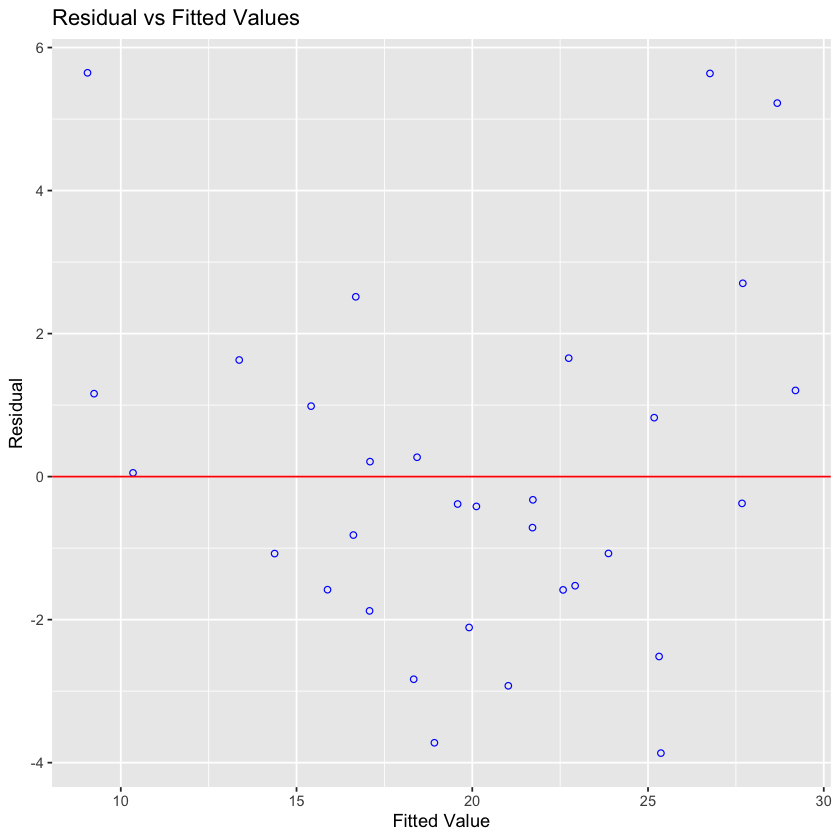

In [96]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_fit(model)


#### DFBETAs Panel

DFBETAs measure the difference in each parameter estimate with and without the influential observation. dfbetas_panel creates plots to detect influential observations using DFBETAs. There is a DFBETA for each data point i.e if there are n observations and k variables, there will be 𝑛∗𝑘DFBETAs. In general, large values of DFBETAS indicate observations that are influential in estimating a given parameter. Belsley, Kuh, and Welsch recommend 2 as a general cutoff value to indicate influential observations and 2/(√𝑛) as a size-adjusted cutoff.


[[1]]
NULL


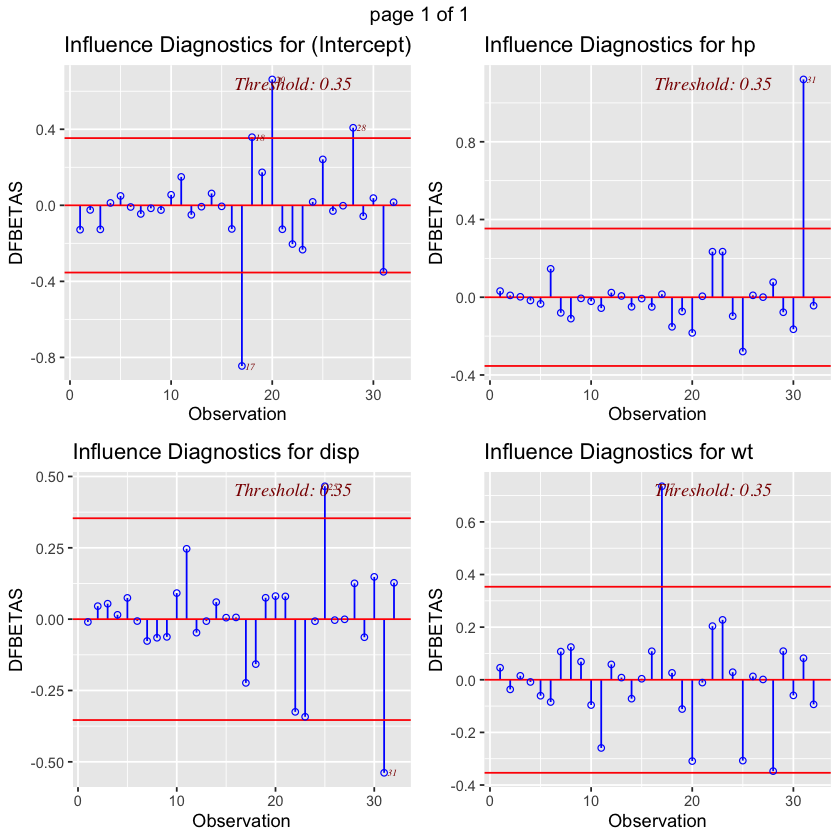

In [97]:
model <- lm(mpg ~ disp + hp + wt, data = mtcars)
ols_plot_dfbetas(model)


#### Residual Fit Spread Plot

Plot to detect non-linearity, influential observations and outliers. Consists of side-by-side quantile plots of the centered fit and the residuals. It shows how much variation in the data is explained by the fit and how much remains in the residuals. For inappropriate models, the spread of the residuals in such a plot is often greater than the spread of the centered fit.


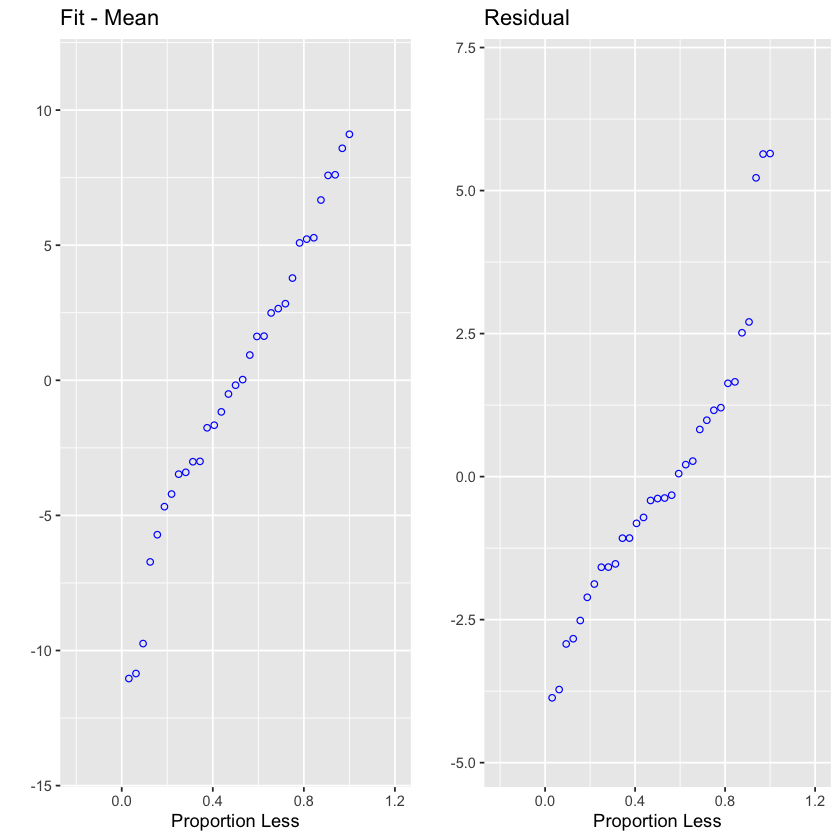

In [98]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_fit_spread(model)


#### Breusch Pagan Test

Breusch Pagan test is used to test for herteroskedasticity (non-constant error variance). It tests whether the variance of the errors from a regression is dependent on the values of the independent variables. It is a 𝜒2 test.

-   Null Hypothesis: Equal/constant variances

-   Alternative Hypothesis: Unequal/non-constant variances

Computation

-   Fit a regression model

-   Regress the squared residuals from the above model on the independent variables

-   Compute 𝑛𝑅2. It follows a chi square distribution with p -1 degrees of freedom, where p is the number of independent variables, n is the sample size and 𝑅2 is the coefficient of determination from the regression in step 2.


In [99]:
model <- lm(mpg ~ disp + hp + wt + drat, data = mtcars)
ols_test_breusch_pagan(model)



 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

             Data               
 -------------------------------
 Response : mpg 
 Variables: fitted values of mpg 

       Test Summary         
 ---------------------------
 DF            =    1 
 Chi2          =    1.429672 
 Prob > Chi2   =    0.231818 

#### Collinearity Diagnostics

Collinearity implies two variables are near perfect linear combinations of one another. Multicollinearity involves more than two variables. In the presence of multicollinearity, regression estimates are unstable and have high standard errors.


In [100]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_coll_diag(model)


Tolerance and Variance Inflation Factor
---------------------------------------
  Variables Tolerance      VIF
1      disp 0.1252279 7.985439
2        hp 0.1935450 5.166758
3        wt 0.1445726 6.916942
4      qsec 0.3191708 3.133119


Eigenvalue and Condition Index
------------------------------
   Eigenvalue Condition Index   intercept        disp          hp           wt
1 4.721487187        1.000000 0.000123237 0.001132468 0.001413094 0.0005253393
2 0.216562203        4.669260 0.002617424 0.036811051 0.027751289 0.0002096014
3 0.050416837        9.677242 0.001656551 0.120881424 0.392366164 0.0377028008
4 0.010104757       21.616057 0.025805998 0.777260487 0.059594623 0.7017528428
5 0.001429017       57.480524 0.969796790 0.063914571 0.518874831 0.2598094157
          qsec
1 0.0001277169
2 0.0046789491
3 0.0001952599
4 0.0024577686
5 0.9925403056

#### Stepwise Regression

Build regression model from a set of candidate predictor variables by entering and removing predictors based on p values, in a stepwise manner until there is no variable left to enter or remove any more.

##### Variable Selection


In [101]:
model <- lm(y ~ ., data = surgical)
ols_step_both_p(model)



                                Stepwise Selection Summary                                 
------------------------------------------------------------------------------------------
                        Added/                   Adj.                                         
Step     Variable      Removed     R-Square    R-Square     C(p)        AIC         RMSE      
------------------------------------------------------------------------------------------
   1    liver_test     addition       0.455       0.444    62.5120    771.8753    296.2992    
   2     alc_heavy     addition       0.567       0.550    41.3680    761.4394    266.6484    
   3    enzyme_test    addition       0.659       0.639    24.3380    750.5089    238.9145    
   4      pindex       addition       0.750       0.730     7.5370    735.7146    206.5835    
   5        bcs        addition       0.781       0.758     3.1920    730.6204    195.4544    
------------------------------------------------------------

##### Plot



[[1]]
NULL

[[2]]
NULL


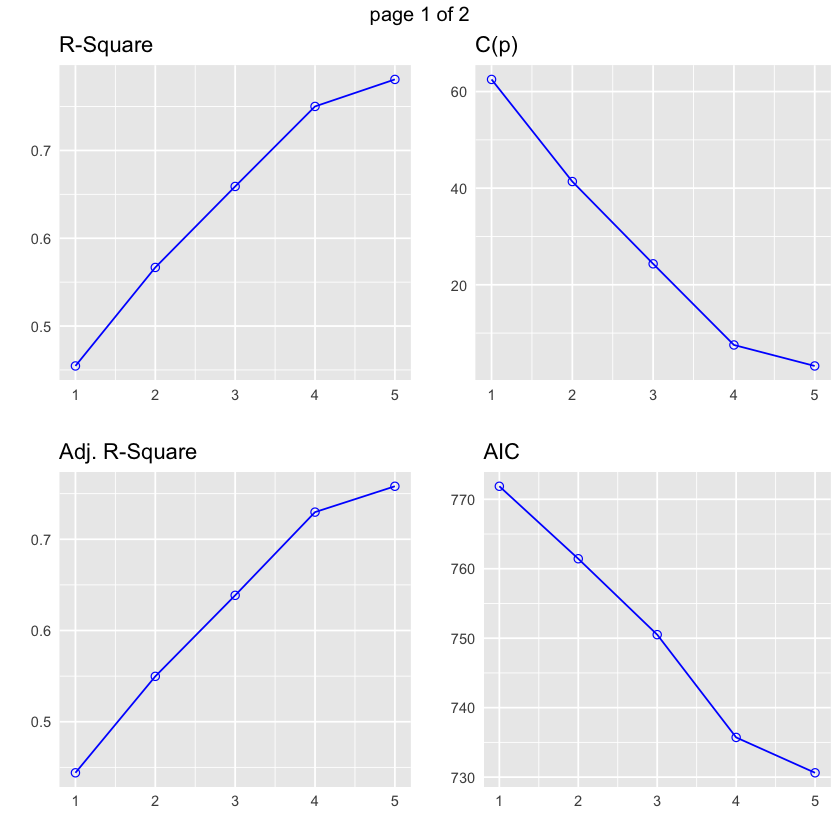

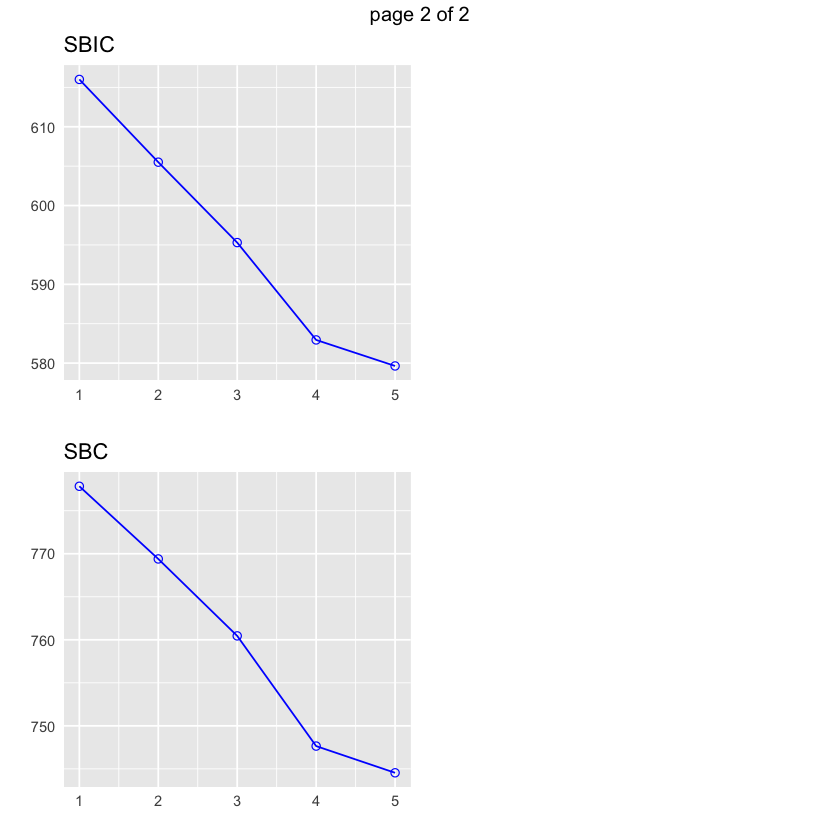

In [102]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_both_p(model)
plot(k)


#### Stepwise AIC Backward Regression

Build regression model from a set of candidate predictor variables by removing predictors based on Akaike Information Criteria, in a stepwise manner until there is no variable left to remove any more.

##### Variable Selection


In [103]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_backward_aic(model)
k




                        Backward Elimination Summary                         
---------------------------------------------------------------------------
Variable        AIC          RSS          Sum Sq        R-Sq      Adj. R-Sq 
---------------------------------------------------------------------------
Full Model    736.390    1825905.713    6543614.824    0.78184      0.74305 
alc_mod       734.407    1826477.828    6543042.709    0.78177      0.74856 
gender        732.494    1829435.617    6540084.920    0.78142      0.75351 
age           730.620    1833716.447    6535804.090    0.78091      0.75808 
---------------------------------------------------------------------------


##### Plot



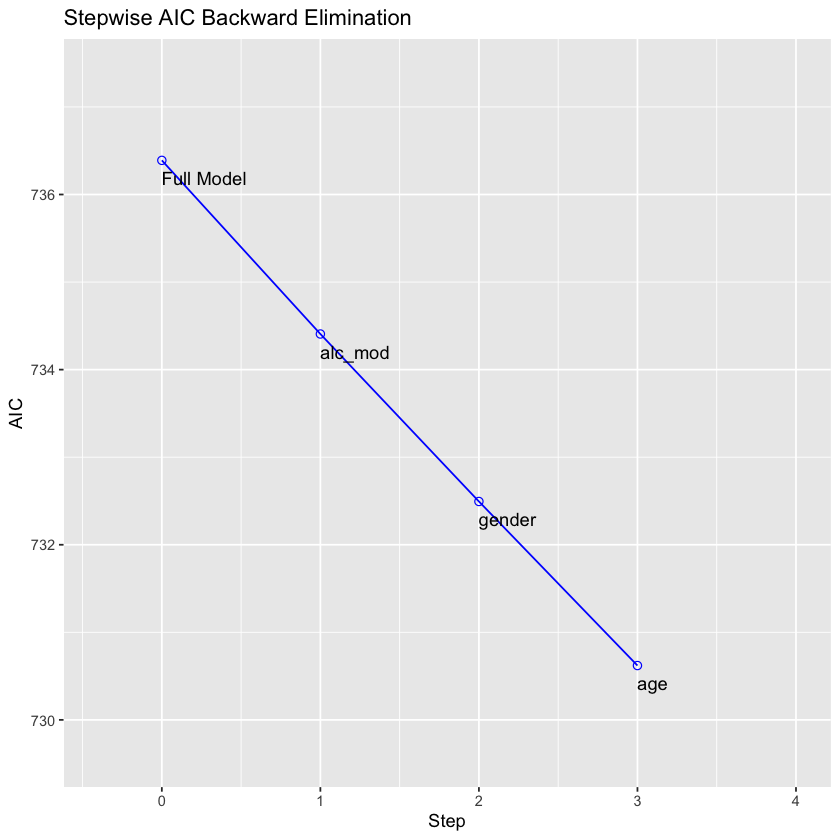

In [104]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_backward_aic(model)
plot(k)


### b) Variable Selection Methods

#### All Possible Regression
All subset regression tests all possible subsets of the set of potential independent variables. If there are K potential independent variables (besides the constant), then there are 2𝑘distinct subsets of them to be tested. For example, if you have 10 candidate independent variables, the number of subsets to be tested is 2^10, which is 1024, and if you have 20 candidate variables, the number is 2^20, which is more than one million.

**ols_step_all_possible()**
Fits all regressions involving one regressor, two regressors, three regressors, and so on. It tests all possible subsets of the set of potential independent variables.


In [105]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_step_all_possible(model)


mindex n predictors      rsquare   adjr      predrsq    cp         aic     
3   1     1 wt              0.7528328 0.7445939 0.70869536  12.480939 166.0294
1   2     1 disp            0.7183433 0.7089548 0.67512054  18.129607 170.2094
2   3     1 hp              0.6024373 0.5891853 0.50969578  37.112642 181.2386
4   4     1 qsec            0.1752963 0.1478062 0.07541973 107.069616 204.5881
8   5     2 hp wt           0.8267855 0.8148396 0.78108710   2.369005 156.6523
10  6     2 wt qsec         0.8264161 0.8144448 0.77856272   2.429492 156.7205
6   7     2 disp wt         0.7809306 0.7658223 0.72532105   9.879096 164.1678
5   8     2 disp hp         0.7482402 0.7308774 0.69454380  15.233115 168.6186
7   9     2 disp qsec       0.7215598 0.7023571 0.66395284  19.602810 171.8418
9  10     2 hp qsec         0.6368769 0.6118339 0.52014395  33.472150 180.3391
14 11     3 hp wt qsec      0.8347678 0.8170643 0.78199548   3.061665 157.1426
11 12     3 disp hp wt      0.8268361 0.8082829 0.76789526   4.360702 158.6430
13 13     3 disp wt qsec    0.8264170 0.8078189 0.76988533   4.429343 158.7203
12 14     3 disp hp qsec    0.7541953 0.7278591 0.68301440  16.257790 169.8525
15 15     4 disp hp wt qsec 0.8351443 0.8107212 0.77102968   5.000000 159.0696
   sbic      sbc      msep     fpe       apc       hsp      
3   74.29156 170.4266 296.9167  9.857235 0.2801228 0.3199103
1   77.98447 174.6066 338.3482 11.232704 0.3192109 0.3645502
2   87.87515 185.6358 477.5836 15.855132 0.4505710 0.5145682
4  109.55912 208.9853 990.6990 32.889874 0.9346642 1.0674198
8   66.57546 162.5153 215.5104  7.356327 0.2090520 0.2402066
10  66.63043 162.5834 215.9699  7.372012 0.2094978 0.2407188
6   72.68365 170.0307 272.5621  9.303758 0.2643941 0.3037962
5   76.36266 174.4815 313.2349 10.692102 0.3038481 0.3491298
7   79.06210 177.7048 346.4301 11.825201 0.3360485 0.3861290
9   86.32866 186.2020 451.7911 15.421640 0.4382520 0.5035638
14  67.72382 164.4713 213.1929  7.475597 0.2124414 0.2461102
11  68.82455 165.9717 223.4268  7.834447 0.2226392 0.2579242
13  68.88149 166.0490 223.9676  7.853408 0.2231781 0.2585484
12  77.31534 177.1812 317.1526 11.120934 0.3160346 0.3661213
15  70.04081 167.8640 220.8882  7.949661 0.2259134 0.2644378


The plot method shows the panel of fit criteria for all possible regression methods.


Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”
Warning message:
“It is deprecated to specify `g

[[1]]
NULL

[[2]]
NULL


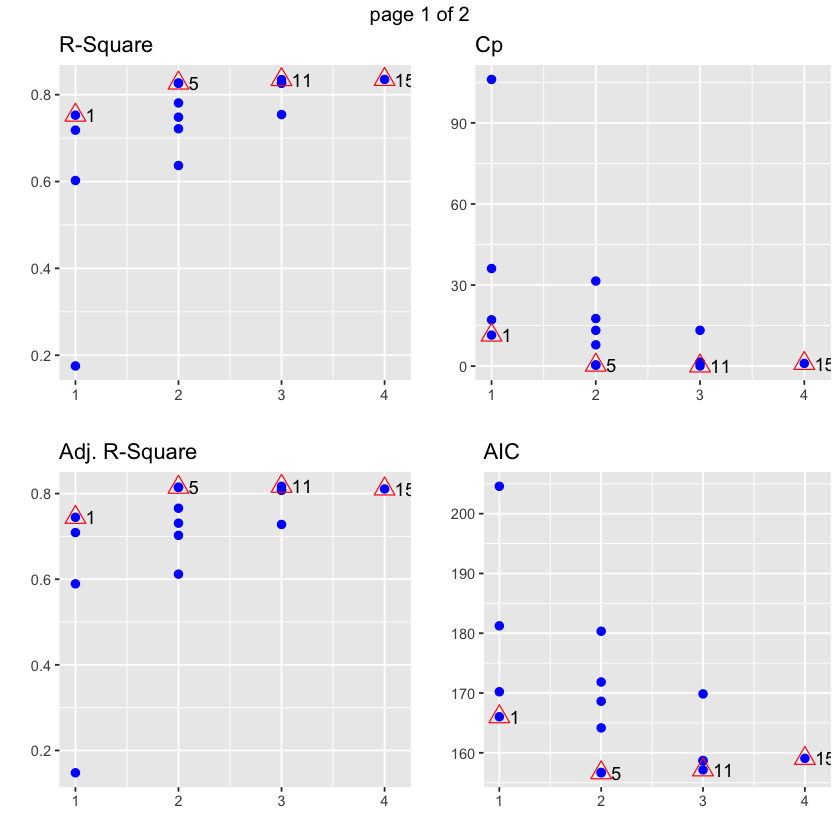

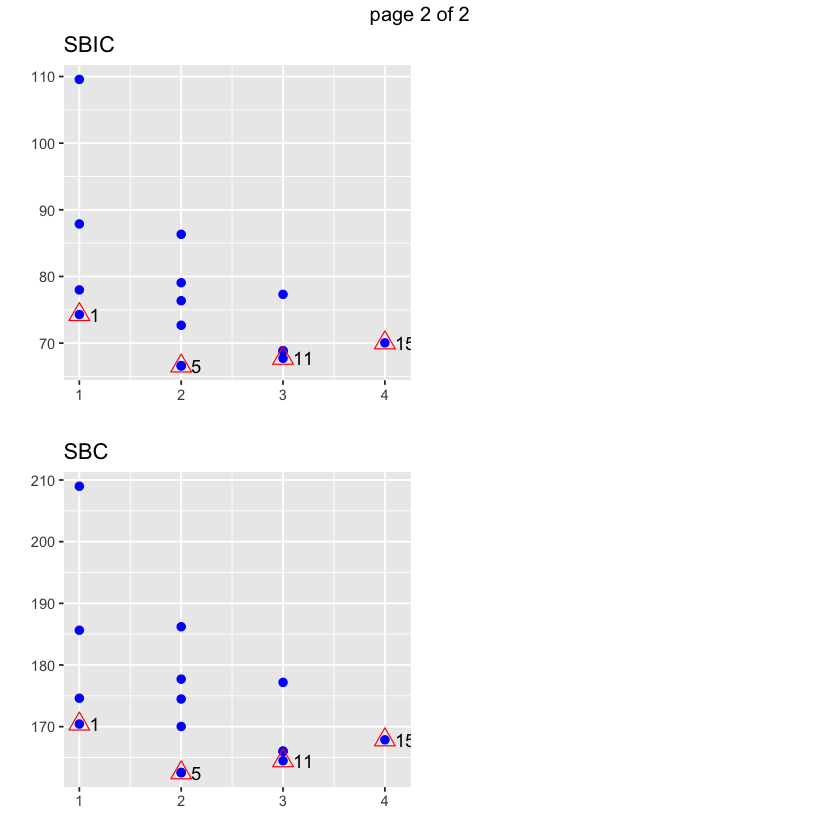

In [106]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
k <- ols_step_all_possible(model)
plot(k)


#### Best Subset Regression

Select the subset of predictors that do the best at meeting some well-defined objective criterion, such as having the largest R2 value or the smallest MSE, Mallow’s Cp or AIC.


In [107]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_step_best_subset(model)


mindex n predictors      rsquare   adjr      predrsq   cp        aic     
3  1      1 wt              0.7528328 0.7445939 0.7086954 12.480939 166.0294
8  2      2 hp wt           0.8267855 0.8148396 0.7810871  2.369005 156.6523
14 3      3 hp wt qsec      0.8347678 0.8170643 0.7819955  3.061665 157.1426
15 4      4 disp hp wt qsec 0.8351443 0.8107212 0.7710297  5.000000 159.0696
   sbic     sbc      msep     fpe      apc       hsp      
3  74.29156 170.4266 296.9167 9.857235 0.2801228 0.3199103
8  66.57546 162.5153 215.5104 7.356327 0.2090520 0.2402066
14 67.72382 164.4713 213.1929 7.475597 0.2124414 0.2461102
15 70.04081 167.8640 220.8882 7.949661 0.2259134 0.2644378

[[1]]
NULL

[[2]]
NULL


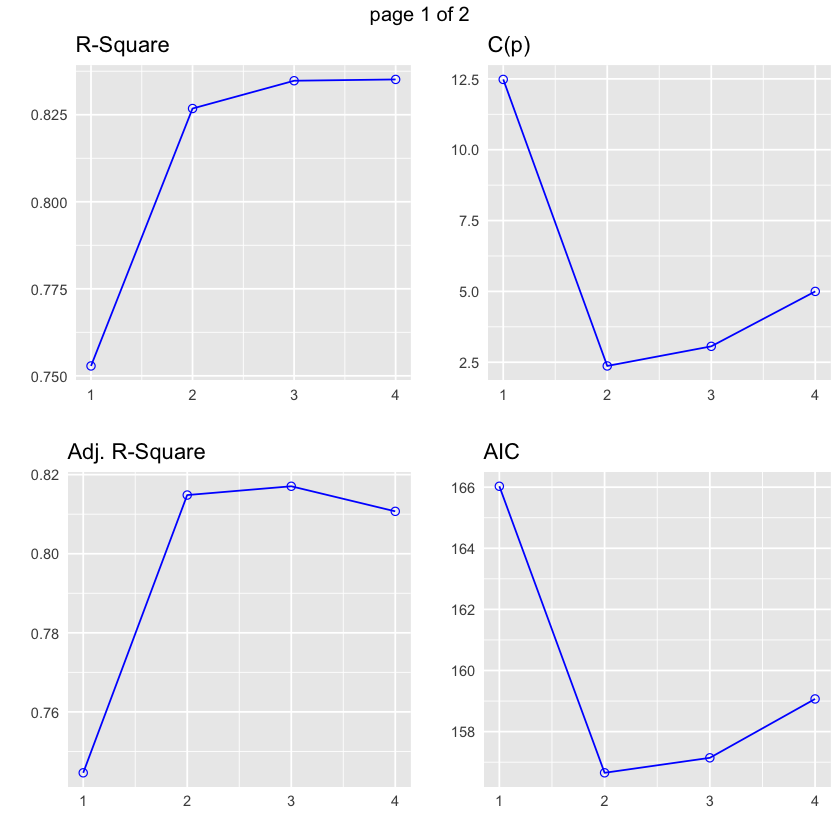

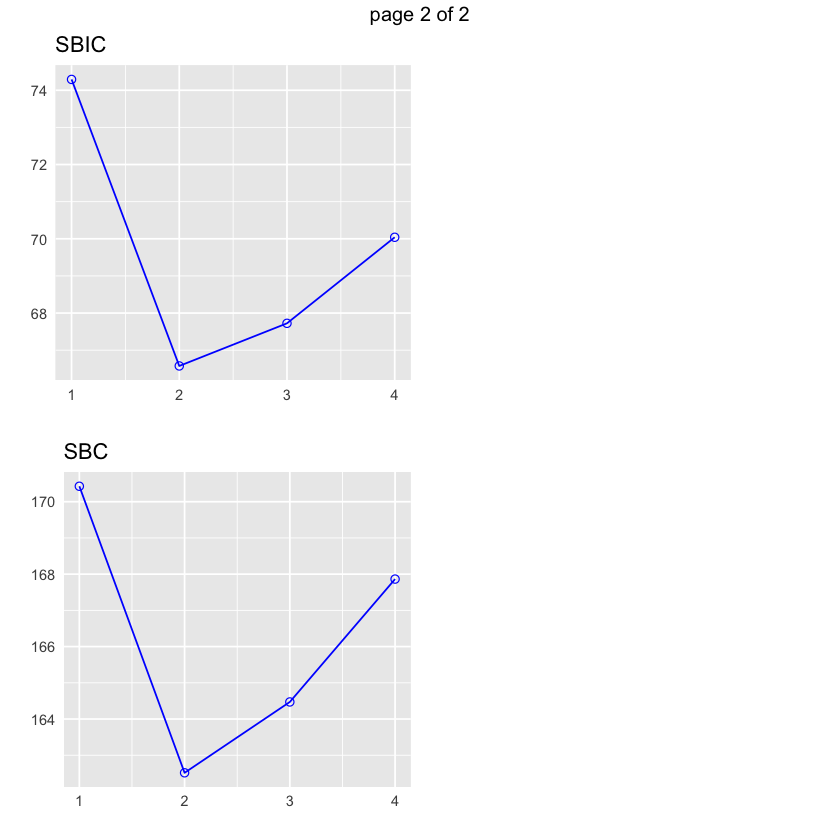

In [108]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
k <- ols_step_best_subset(model)
plot(k)


#### Stepwise Forward Regression
Build regression model from a set of candidate predictor variables by entering predictors based on p values, in a stepwise manner until there is no variable left to enter any more. The model should include all the candidate predictor variables. If details is set to TRUE, each step is displayed.

##### Variable Selection
Build regression model from a set of candidate predictor variables by entering predictors based on p values, in a stepwise manner until there is no variable left to enter any more.


In [109]:
model <- lm(y ~ ., data = surgical)
ols_step_forward_p(model)



                              Selection Summary                                
------------------------------------------------------------------------------
        Variable                     Adj.                                         
Step      Entered      R-Square    R-Square     C(p)        AIC         RMSE      
------------------------------------------------------------------------------
   1    liver_test       0.4545      0.4440    62.5119    771.8753    296.2992    
   2    alc_heavy        0.5667      0.5498    41.3681    761.4394    266.6484    
   3    enzyme_test      0.6590      0.6385    24.3379    750.5089    238.9145    
   4    pindex           0.7501      0.7297     7.5373    735.7146    206.5835    
   5    bcs              0.7809      0.7581     3.1925    730.6204    195.4544    
------------------------------------------------------------------------------


##### Plot


[[1]]
NULL

[[2]]
NULL


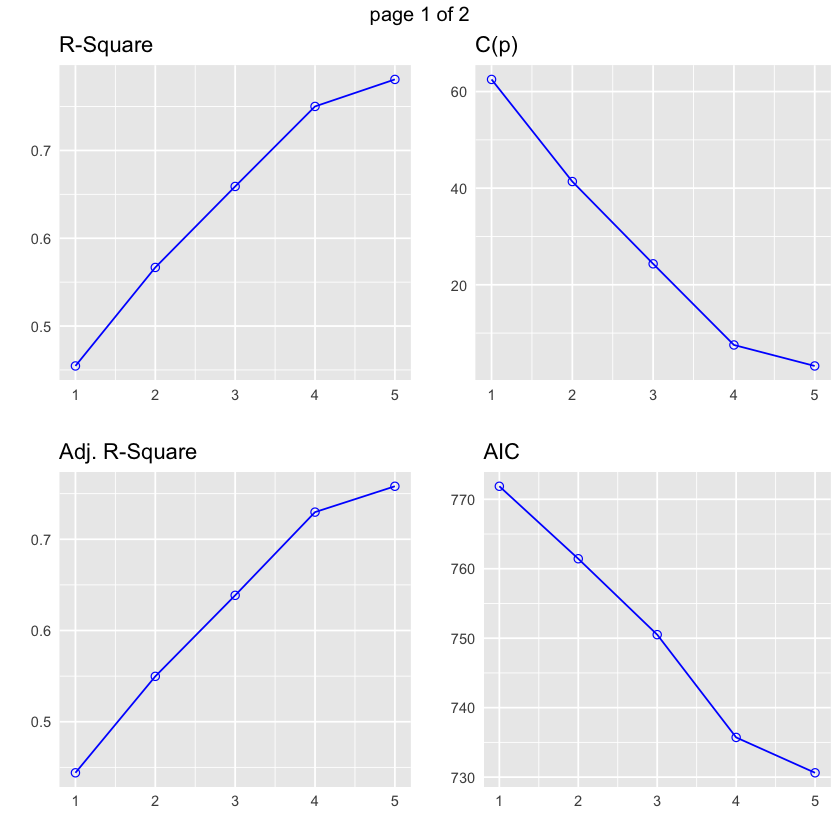

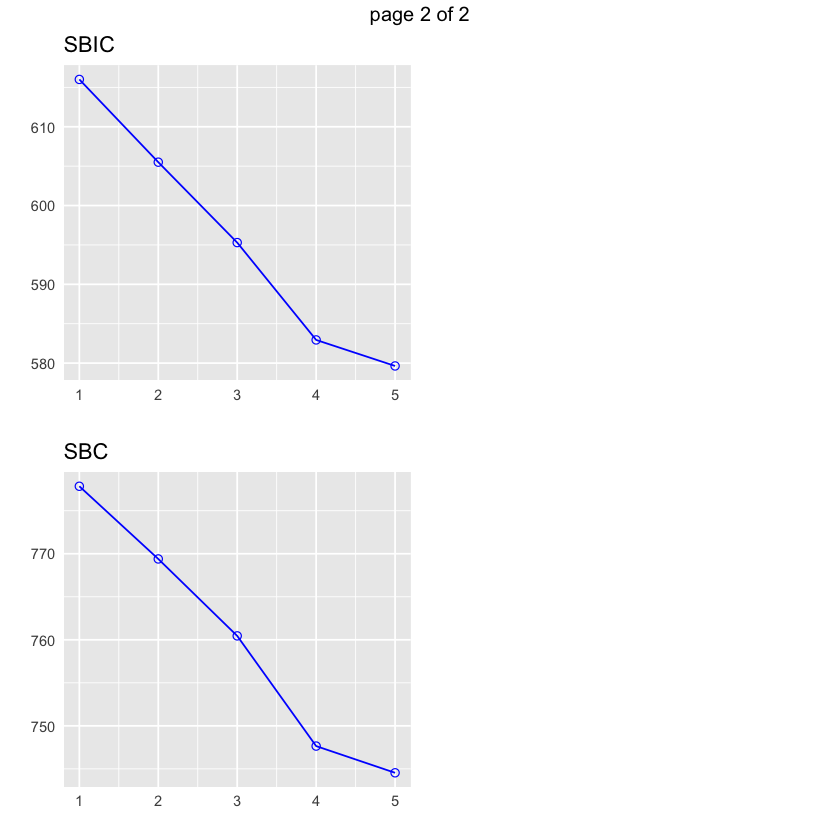

In [110]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_forward_p(model)
plot(k)



##### Detailed Output


In [111]:
model <- lm(y ~ ., data = surgical)
ols_step_forward_p(model, details = TRUE)


Forward Selection Method    
---------------------------

Candidate Terms: 

1. bcs 
2. pindex 
3. enzyme_test 
4. liver_test 
5. age 
6. gender 
7. alc_mod 
8. alc_heavy 

We are selecting variables based on p value...


Forward Selection: Step 1 

- liver_test 

                          Model Summary                           
-----------------------------------------------------------------
R                       0.674       RMSE                 296.299 
R-Squared               0.455       Coef. Var             42.202 
Adj. R-Squared          0.444       MSE                87793.232 
Pred R-Squared          0.386       MAE                  212.857 
-----------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                 ANOVA                                  
-----------------------------------------------------------------------
                   Sum of                  


                              Selection Summary                                
------------------------------------------------------------------------------
        Variable                     Adj.                                         
Step      Entered      R-Square    R-Square     C(p)        AIC         RMSE      
------------------------------------------------------------------------------
   1    liver_test       0.4545      0.4440    62.5119    771.8753    296.2992    
   2    alc_heavy        0.5667      0.5498    41.3681    761.4394    266.6484    
   3    enzyme_test      0.6590      0.6385    24.3379    750.5089    238.9145    
   4    pindex           0.7501      0.7297     7.5373    735.7146    206.5835    
   5    bcs              0.7809      0.7581     3.1925    730.6204    195.4544    
------------------------------------------------------------------------------

#### Stepwise Backward Regression
Build regression model from a set of candidate predictor variables by removing predictors based on p values, in a stepwise manner until there is no variable left to remove any more. The model should include all the candidate predictor variables. If details is set to TRUE, each step is displayed.

##### Variable Selection


In [112]:
model <- lm(y ~ ., data = surgical)
ols_step_backward_p(model)




                           Elimination Summary                             
--------------------------------------------------------------------------
        Variable                  Adj.                                        
Step    Removed     R-Square    R-Square     C(p)       AIC         RMSE      
--------------------------------------------------------------------------
   1    alc_mod       0.7818      0.7486    7.0141    734.4068    199.2637    
   2    gender        0.7814      0.7535    5.0870    732.4942    197.2921    
   3    age           0.7809      0.7581    3.1925    730.6204    195.4544    
--------------------------------------------------------------------------

##### Plot


[[1]]
NULL

[[2]]
NULL


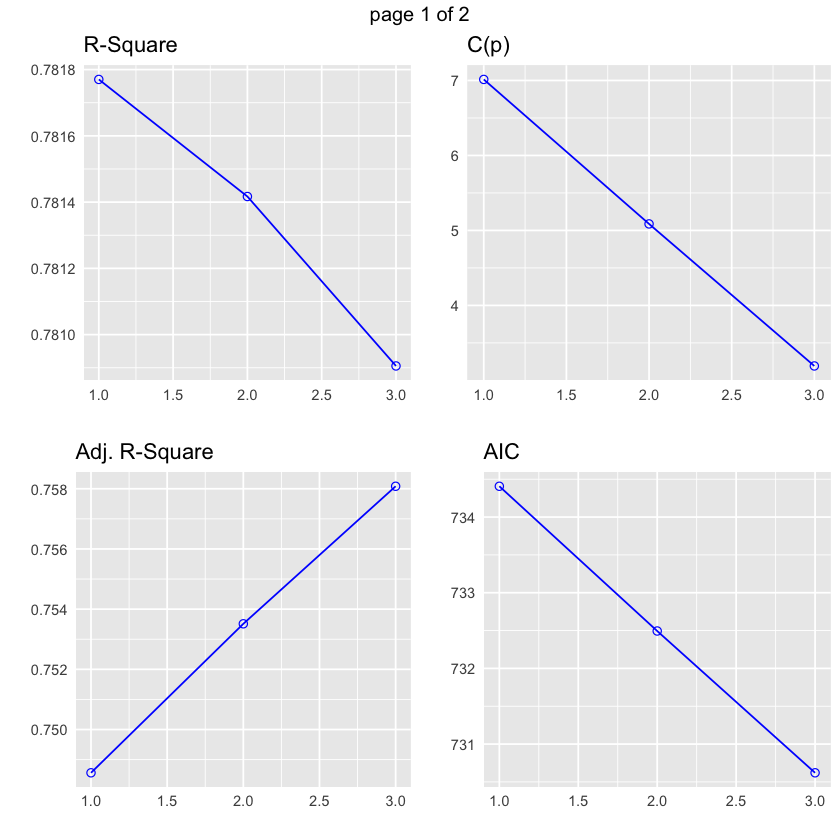

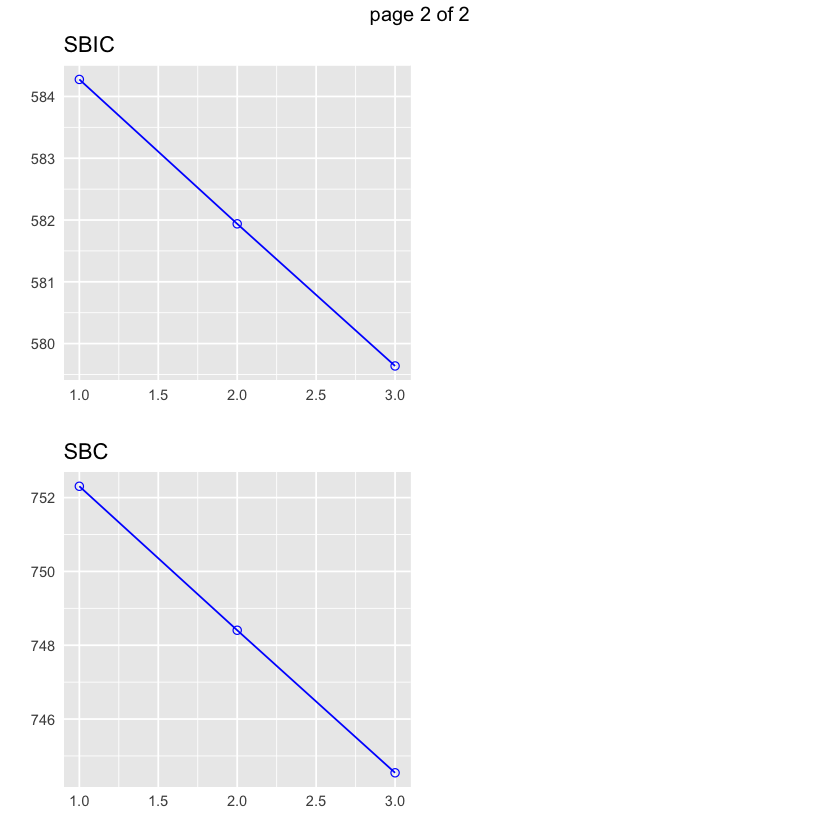

In [113]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_backward_p(model)
plot(k)



##### Detailed Output


In [114]:
model <- lm(y ~ ., data = surgical)
ols_step_backward_p(model, details = TRUE)


Backward Elimination Method 
---------------------------

Candidate Terms: 

1 . bcs 
2 . pindex 
3 . enzyme_test 
4 . liver_test 
5 . age 
6 . gender 
7 . alc_mod 
8 . alc_heavy 

We are eliminating variables based on p value...

- alc_mod 

Backward Elimination: Step 1 

 Variable alc_mod Removed 

                          Model Summary                           
-----------------------------------------------------------------
R                       0.884       RMSE                 199.264 
R-Squared               0.782       Coef. Var             28.381 
Adj. R-Squared          0.749       MSE                39706.040 
Pred R-Squared          0.678       MAE                  137.053 
-----------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                 ANOVA                                  
-----------------------------------------------------------------------
      



                           Elimination Summary                             
--------------------------------------------------------------------------
        Variable                  Adj.                                        
Step    Removed     R-Square    R-Square     C(p)       AIC         RMSE      
--------------------------------------------------------------------------
   1    alc_mod       0.7818      0.7486    7.0141    734.4068    199.2637    
   2    gender        0.7814      0.7535    5.0870    732.4942    197.2921    
   3    age           0.7809      0.7581    3.1925    730.6204    195.4544    
--------------------------------------------------------------------------

#### Stepwise Regression
Build regression model from a set of candidate predictor variables by entering and removing predictors based on p values, in a stepwise manner until there is no variable left to enter or remove any more. The model should include all the candidate predictor variables. If details is set to TRUE, each step is displayed.

##### Variable Selection


In [115]:
model <- lm(y ~ ., data = surgical)
ols_step_both_p(model)



                                Stepwise Selection Summary                                 
------------------------------------------------------------------------------------------
                        Added/                   Adj.                                         
Step     Variable      Removed     R-Square    R-Square     C(p)        AIC         RMSE      
------------------------------------------------------------------------------------------
   1    liver_test     addition       0.455       0.444    62.5120    771.8753    296.2992    
   2     alc_heavy     addition       0.567       0.550    41.3680    761.4394    266.6484    
   3    enzyme_test    addition       0.659       0.639    24.3380    750.5089    238.9145    
   4      pindex       addition       0.750       0.730     7.5370    735.7146    206.5835    
   5        bcs        addition       0.781       0.758     3.1920    730.6204    195.4544    
------------------------------------------------------------

##### Plot


[[1]]
NULL

[[2]]
NULL


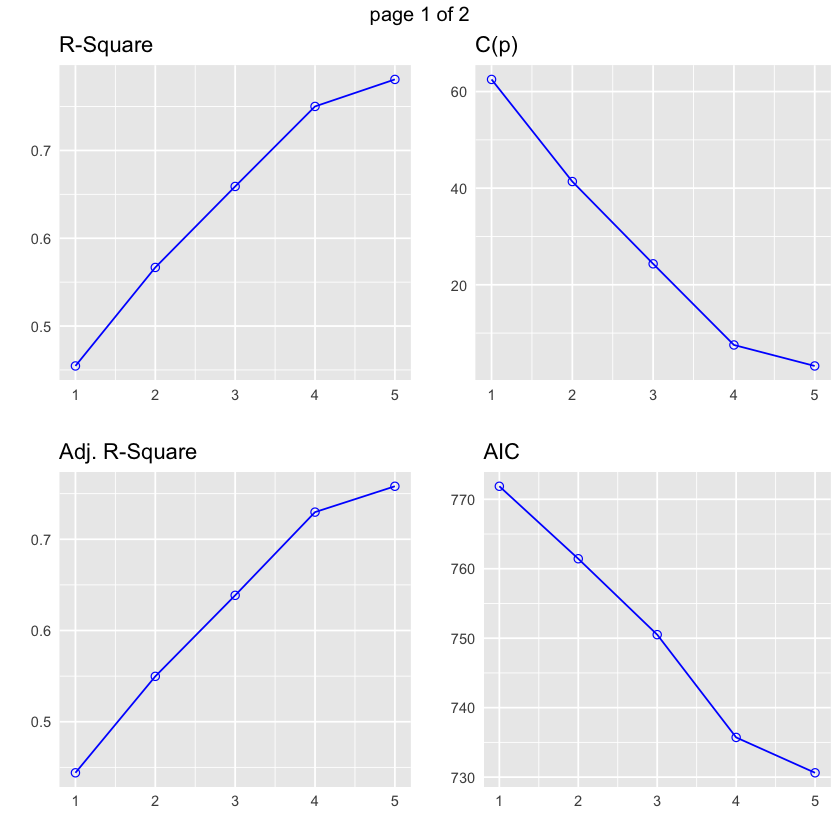

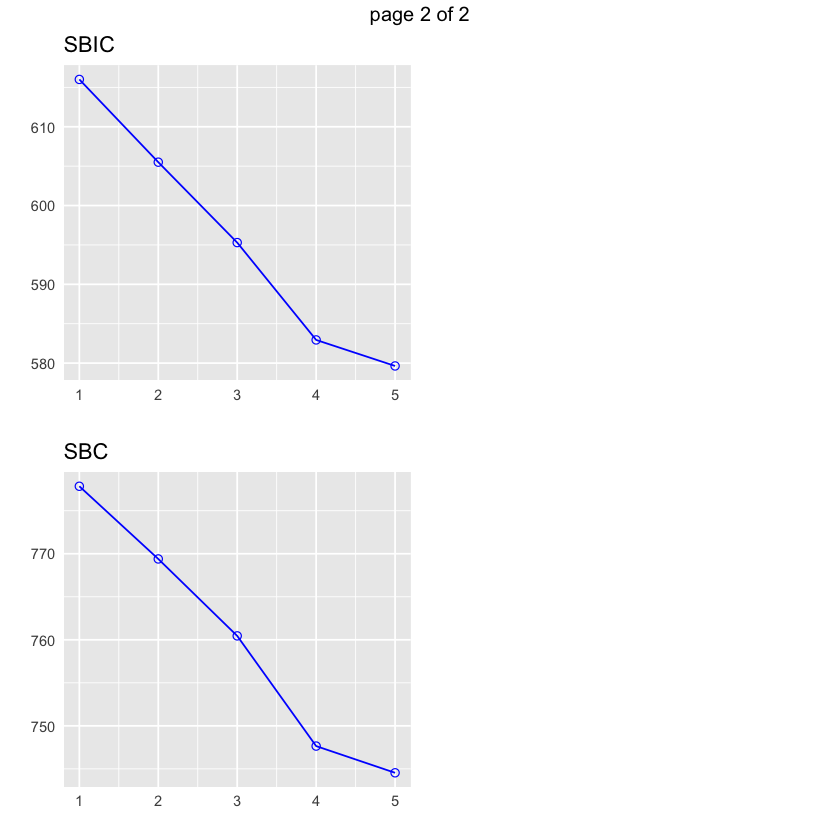

In [116]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_both_p(model)
plot(k)



##### Detailed Output


In [117]:
model <- lm(y ~ ., data = surgical)
ols_step_both_p(model, details = TRUE)


Stepwise Selection Method   
---------------------------

Candidate Terms: 

1. bcs 
2. pindex 
3. enzyme_test 
4. liver_test 
5. age 
6. gender 
7. alc_mod 
8. alc_heavy 

We are selecting variables based on p value...


Stepwise Selection: Step 1 

- liver_test added 

                          Model Summary                           
-----------------------------------------------------------------
R                       0.674       RMSE                 296.299 
R-Squared               0.455       Coef. Var             42.202 
Adj. R-Squared          0.444       MSE                87793.232 
Pred R-Squared          0.386       MAE                  212.857 
-----------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                 ANOVA                                  
-----------------------------------------------------------------------
                   Sum of           


                                Stepwise Selection Summary                                 
------------------------------------------------------------------------------------------
                        Added/                   Adj.                                         
Step     Variable      Removed     R-Square    R-Square     C(p)        AIC         RMSE      
------------------------------------------------------------------------------------------
   1    liver_test     addition       0.455       0.444    62.5120    771.8753    296.2992    
   2     alc_heavy     addition       0.567       0.550    41.3680    761.4394    266.6484    
   3    enzyme_test    addition       0.659       0.639    24.3380    750.5089    238.9145    
   4      pindex       addition       0.750       0.730     7.5370    735.7146    206.5835    
   5        bcs        addition       0.781       0.758     3.1920    730.6204    195.4544    
------------------------------------------------------------

#### Stepwise AIC Forward Regression
Build regression model from a set of candidate predictor variables by entering predictors based on Akaike Information Criteria, in a stepwise manner until there is no variable left to enter any more. The model should include all the candidate predictor variables. If details is set to TRUE, each step is displayed.

##### Variable Selection


In [118]:
model <- lm(y ~ ., data = surgical)
ols_step_forward_aic(model)



                             Selection Summary                               
----------------------------------------------------------------------------
Variable         AIC        Sum Sq           RSS         R-Sq      Adj. R-Sq 
----------------------------------------------------------------------------
liver_test     771.875    3804272.477    4565248.060    0.45454      0.44405 
alc_heavy      761.439    4743349.776    3626170.761    0.56674      0.54975 
enzyme_test    750.509    5515514.136    2854006.401    0.65900      0.63854 
pindex         735.715    6278360.060    2091160.477    0.75015      0.72975 
bcs            730.620    6535804.090    1833716.447    0.78091      0.75808 
----------------------------------------------------------------------------


#### Plot


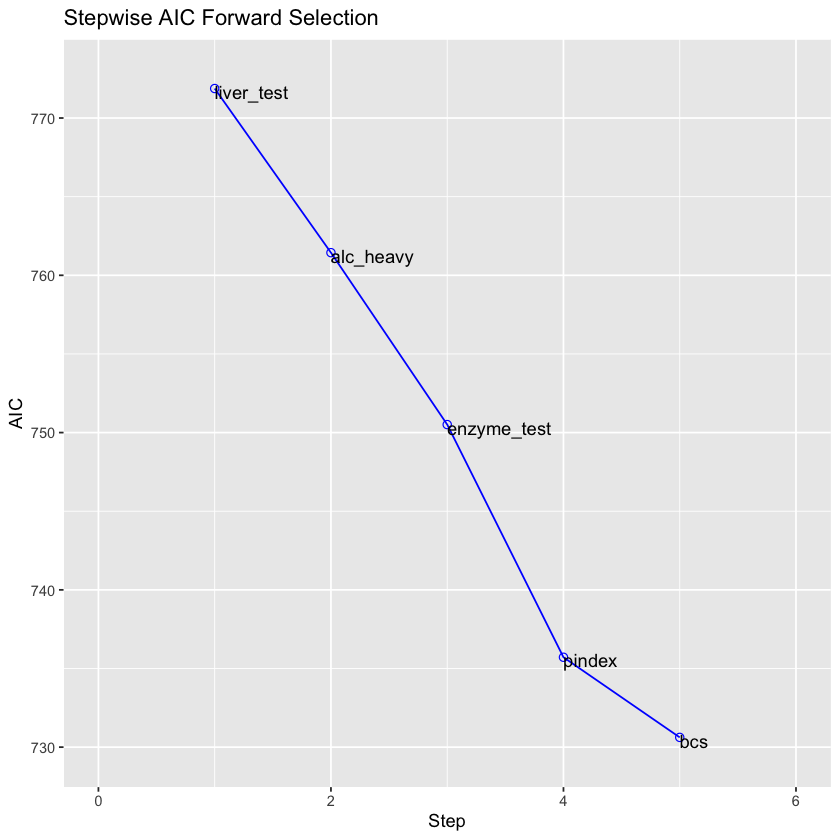

In [119]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_forward_aic(model)
plot(k)



##### Detailed Output


In [120]:
model <- lm(y ~ ., data = surgical)
ols_step_forward_aic(model, details = TRUE)


Forward Selection Method 
------------------------

Candidate Terms: 

1 . bcs 
2 . pindex 
3 . enzyme_test 
4 . liver_test 
5 . age 
6 . gender 
7 . alc_mod 
8 . alc_heavy 

 Step 0: AIC = 802.606 
 y ~ 1 

--------------------------------------------------------------------------------
Variable       DF      AIC        Sum Sq           RSS        R-Sq     Adj. R-Sq 
--------------------------------------------------------------------------------
liver_test      1    771.875    3804272.477    4565248.060    0.455        0.444 
enzyme_test     1    782.629    2798309.881    5571210.656    0.334        0.322 
pindex          1    794.100    1479766.754    6889753.784    0.177        0.161 
alc_heavy       1    794.301    1454057.255    6915463.282    0.174        0.158 
bcs             1    797.697    1005151.658    7364368.879    0.120        0.103 
alc_mod         1    802.828     271062.330    8098458.207    0.032        0.014 
gender          1    802.956     251808.570    8117711.9


                             Selection Summary                               
----------------------------------------------------------------------------
Variable         AIC        Sum Sq           RSS         R-Sq      Adj. R-Sq 
----------------------------------------------------------------------------
liver_test     771.875    3804272.477    4565248.060    0.45454      0.44405 
alc_heavy      761.439    4743349.776    3626170.761    0.56674      0.54975 
enzyme_test    750.509    5515514.136    2854006.401    0.65900      0.63854 
pindex         735.715    6278360.060    2091160.477    0.75015      0.72975 
bcs            730.620    6535804.090    1833716.447    0.78091      0.75808 
----------------------------------------------------------------------------

#### Stepwise AIC Backward Regression
Build regression model from a set of candidate predictor variables by removing predictors based on Akaike Information Criteria, in a stepwise manner until there is no variable left to remove any more. The model should include all the candidate predictor variables. If details is set to TRUE, each step is displayed.

##### Variable Selection


In [121]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_backward_aic(model)
k




                        Backward Elimination Summary                         
---------------------------------------------------------------------------
Variable        AIC          RSS          Sum Sq        R-Sq      Adj. R-Sq 
---------------------------------------------------------------------------
Full Model    736.390    1825905.713    6543614.824    0.78184      0.74305 
alc_mod       734.407    1826477.828    6543042.709    0.78177      0.74856 
gender        732.494    1829435.617    6540084.920    0.78142      0.75351 
age           730.620    1833716.447    6535804.090    0.78091      0.75808 
---------------------------------------------------------------------------



##### Plot


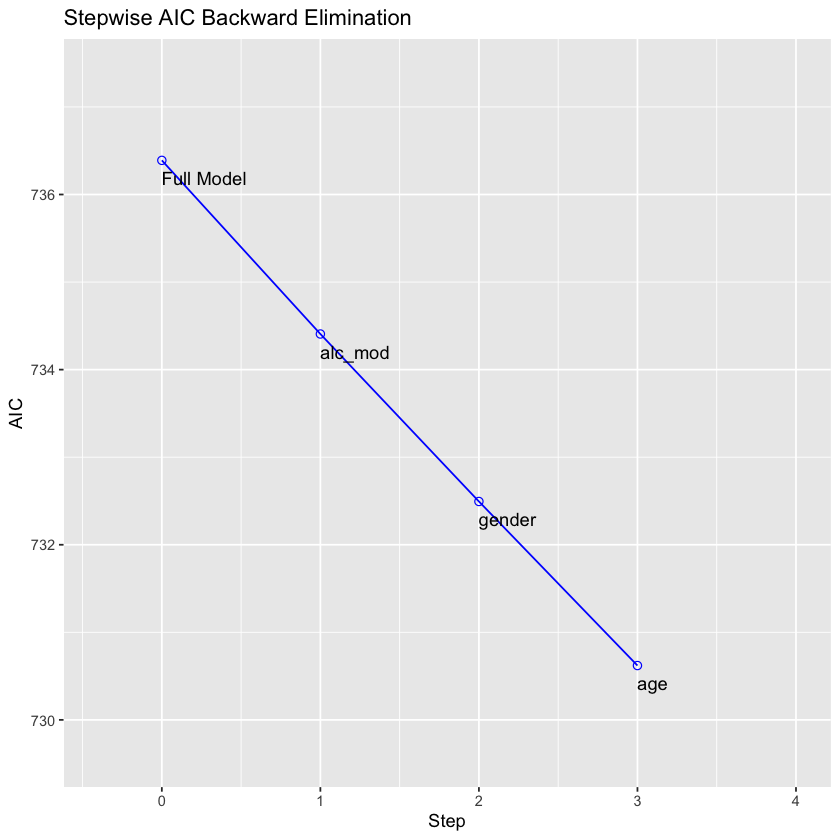

In [122]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_backward_aic(model)
plot(k)



##### Detailed Output


In [123]:
model <- lm(y ~ ., data = surgical)
ols_step_backward_aic(model, details = TRUE)


Backward Elimination Method 
---------------------------

Candidate Terms: 

1 . bcs 
2 . pindex 
3 . enzyme_test 
4 . liver_test 
5 . age 
6 . gender 
7 . alc_mod 
8 . alc_heavy 

 Step 0: AIC = 736.3899 
 y ~ bcs + pindex + enzyme_test + liver_test + age + gender + alc_mod + alc_heavy 

--------------------------------------------------------------------------------
Variable       DF      AIC        Sum Sq           RSS        R-Sq     Adj. R-Sq 
--------------------------------------------------------------------------------
alc_mod        1     734.407        572.115    1826477.828    0.782        0.749 
gender         1     734.478       2990.338    1828896.051    0.781        0.748 
age            1     734.544       5231.108    1831136.821    0.781        0.748 
liver_test     1     735.878      51016.156    1876921.869    0.776        0.742 
bcs            1     741.677     263780.393    2089686.106    0.750        0.712 
alc_heavy      1     749.210     576636.222    2402541.9



                        Backward Elimination Summary                         
---------------------------------------------------------------------------
Variable        AIC          RSS          Sum Sq        R-Sq      Adj. R-Sq 
---------------------------------------------------------------------------
Full Model    736.390    1825905.713    6543614.824    0.78184      0.74305 
alc_mod       734.407    1826477.828    6543042.709    0.78177      0.74856 
gender        732.494    1829435.617    6540084.920    0.78142      0.75351 
age           730.620    1833716.447    6535804.090    0.78091      0.75808 
---------------------------------------------------------------------------


#### Stepwise AIC Regression
Build regression model from a set of candidate predictor variables by entering and removing predictors based on Akaike Information Criteria, in a stepwise manner until there is no variable left to enter or remove any more. The model should include all the candidate predictor variables. If details is set to TRUE, each step is displayed.

##### Variable Selection


In [124]:
model <- lm(y ~ ., data = surgical)
ols_step_both_aic(model)




                                     Stepwise Summary                                     
----------------------------------------------------------------------------------------
Variable        Method       AIC          RSS          Sum Sq        R-Sq      Adj. R-Sq 
----------------------------------------------------------------------------------------
liver_test     addition    771.875    4565248.060    3804272.477    0.45454      0.44405 
alc_heavy      addition    761.439    3626170.761    4743349.776    0.56674      0.54975 
enzyme_test    addition    750.509    2854006.401    5515514.136    0.65900      0.63854 
pindex         addition    735.715    2091160.477    6278360.060    0.75015      0.72975 
bcs            addition    730.620    1833716.447    6535804.090    0.78091      0.75808 
----------------------------------------------------------------------------------------



##### Plot


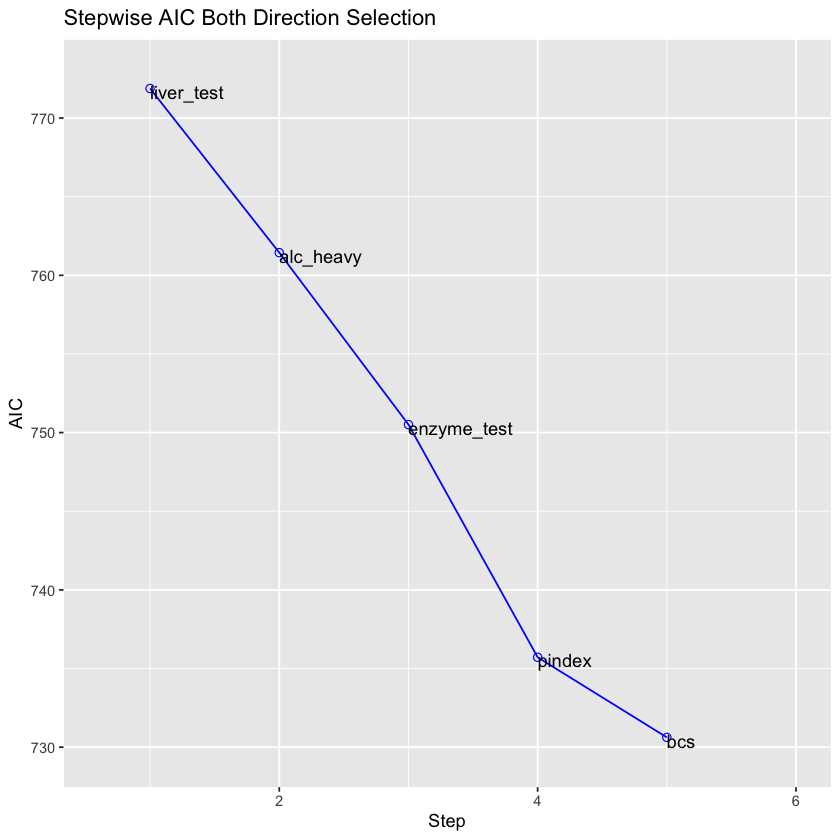

In [125]:
model <- lm(y ~ ., data = surgical)
k <- ols_step_both_aic(model)
plot(k)



##### Detailed Output


In [126]:
model <- lm(y ~ ., data = surgical)
ols_step_both_aic(model, details = TRUE)


Stepwise Selection Method 
-------------------------

Candidate Terms: 

1 . bcs 
2 . pindex 
3 . enzyme_test 
4 . liver_test 
5 . age 
6 . gender 
7 . alc_mod 
8 . alc_heavy 

 Step 0: AIC = 802.606 
 y ~ 1 


Variables Entered/Removed: 

                               Enter New Variables                              
--------------------------------------------------------------------------------
Variable       DF      AIC        Sum Sq           RSS        R-Sq     Adj. R-Sq 
--------------------------------------------------------------------------------
liver_test      1    771.875    3804272.477    4565248.060    0.455        0.444 
enzyme_test     1    782.629    2798309.881    5571210.656    0.334        0.322 
pindex          1    794.100    1479766.754    6889753.784    0.177        0.161 
alc_heavy       1    794.301    1454057.255    6915463.282    0.174        0.158 
bcs             1    797.697    1005151.658    7364368.879    0.120        0.103 
alc_mod         1    802.



                                     Stepwise Summary                                     
----------------------------------------------------------------------------------------
Variable        Method       AIC          RSS          Sum Sq        R-Sq      Adj. R-Sq 
----------------------------------------------------------------------------------------
liver_test     addition    771.875    4565248.060    3804272.477    0.45454      0.44405 
alc_heavy      addition    761.439    3626170.761    4743349.776    0.56674      0.54975 
enzyme_test    addition    750.509    2854006.401    5515514.136    0.65900      0.63854 
pindex         addition    735.715    2091160.477    6278360.060    0.75015      0.72975 
bcs            addition    730.620    1833716.447    6535804.090    0.78091      0.75808 
----------------------------------------------------------------------------------------


### c) Residual Diagnostics

olsrr offers tools for detecting violation of standard regression assumptions. Here we take a look at residual diagnostics. The standard regression assumptions include the following about residuals/errors:

-   The error has a normal distribution (normality assumption).

-   The errors have mean zero.

-   The errors have same but unknown variance (homoscedasticity assumption).

-   The error are independent of each other (independent errors assumption).

#### Residual QQ Plot

This graph is used to detect a violation on normality assumption, the most closest the point (residuals) to the line, represent normality.


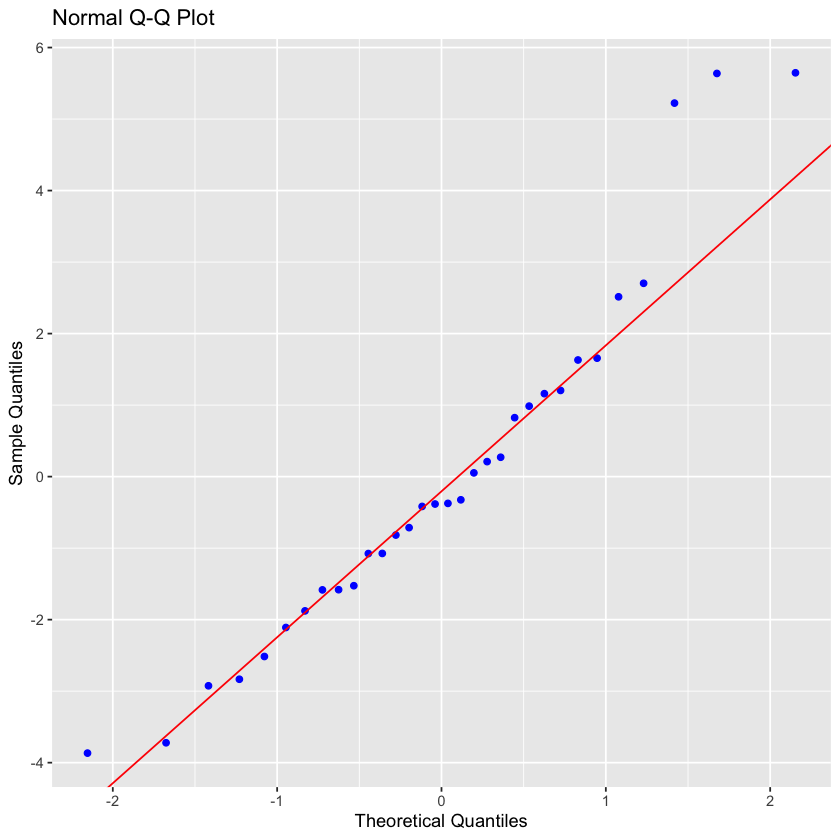

In [127]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_qq(model)


#### Residual Normality Test

This test is used to detect a violation on normality assumption. It calculates 4 test (*Shapiro-Wilk, Kolmogorov-Smirnov, Cramer-von Mise, Anderson-Darling*).


In [128]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_test_normality(model)


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9366         0.0600 
Kolmogorov-Smirnov        0.1152         0.7464 
Cramer-von Mises          2.8122         0.0000 
Anderson-Darling          0.5859         0.1188 
-----------------------------------------------

Correlation between observed residuals and expected residuals under normality.



In [129]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_test_correlation(model)


[1] 0.970066

#### Residual vs Fitted Values Plot

It is a scatter plot of residuals on the y axis and fitted values on the x axis to detect non-linearity, unequal error variances, and outliers.

Characteristics of a well behaved residual vs fitted plot:

-   The residuals spread randomly around the 0 line indicating that the relationship is linear.

-   The residuals form an approximate horizontal band around the 0 line indicating homogeneity of error variance.

-   No one residual is visibly away from the random pattern of the residuals indicating that there are no outliers.


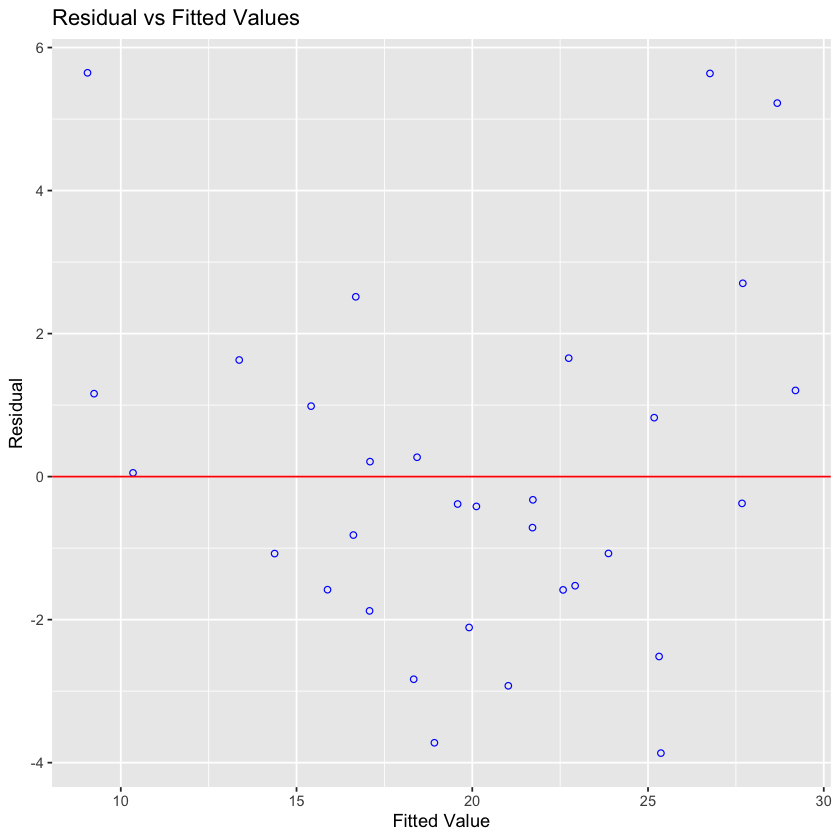

In [130]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_fit(model)


#### Residual Histogram

Histogram of residuals for detecting violation of normality assumption.


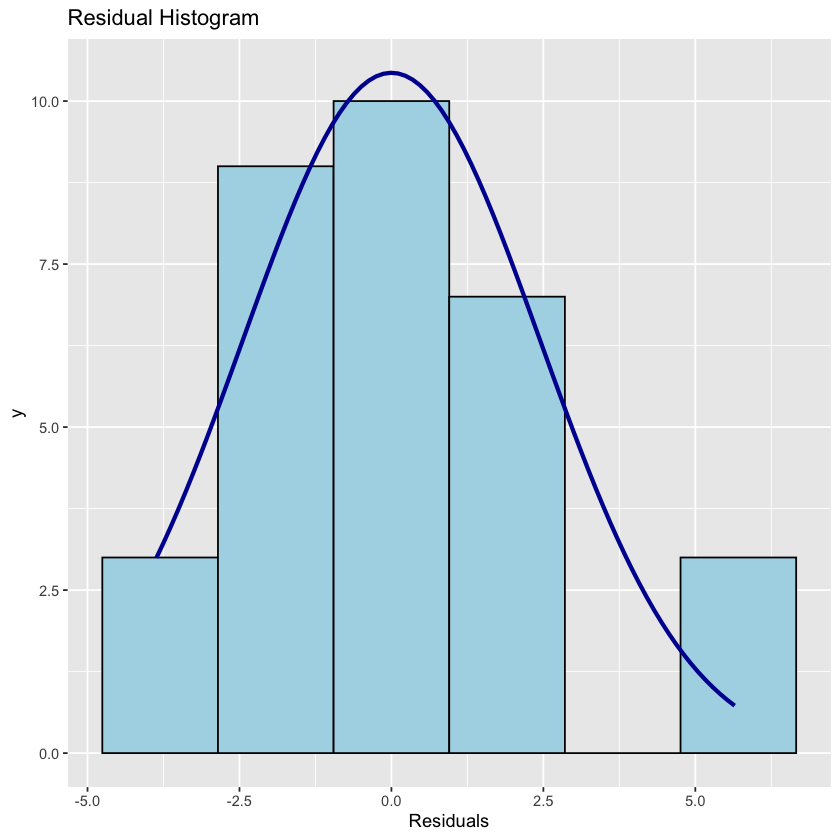

In [131]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_hist(model)


### d) Heteroscedasticity

#### Bartlett Test

Librerias


In [132]:
library(descriptr)
library(olsrr)



Attaching package: ‘descriptr’


The following object is masked from ‘package:olsrr’:

    hsb




Use grouping variable



In [133]:
ols_test_bartlett(hsb, 'read', group_var = 'female')




    Bartlett's Test of Homogenity of Variances    
------------------------------------------------
Ho: Variances are equal across groups
Ha: Variances are unequal for atleast two groups

        Test Summary         
 ----------------------------
 DF            =    1 
 Chi2          =    0.1866579 
 Prob > Chi2   =    0.6657129 

Using variables



In [134]:
ols_test_bartlett(hsb, 'read', 'write')




    Bartlett's Test of Homogenity of Variances    
------------------------------------------------
Ho: Variances are equal across groups
Ha: Variances are unequal for atleast two groups

        Data          
 ---------------------
 Variables: read write 

        Test Summary         
 ----------------------------
 DF            =    1 
 Chi2          =    1.222871 
 Prob > Chi2   =    0.2687979 

#### Breusch Pagan Test

Use fitted values of the model


In [135]:
model <- lm(mpg ~ disp + hp + wt + drat, data = mtcars)
ols_test_breusch_pagan(model)



 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

             Data               
 -------------------------------
 Response : mpg 
 Variables: fitted values of mpg 

       Test Summary         
 ---------------------------
 DF            =    1 
 Chi2          =    1.429672 
 Prob > Chi2   =    0.231818 

Use independent variables of the model



In [136]:
model <- lm(mpg ~ disp + hp + wt + drat, data = mtcars)
ols_test_breusch_pagan(model, rhs = TRUE)



 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

           Data            
 --------------------------
 Response : mpg 
 Variables: disp hp wt drat 

        Test Summary         
 ----------------------------
 DF            =    4 
 Chi2          =    1.513808 
 Prob > Chi2   =    0.8241927 

Use independent variables of the model and perform multiple tests



In [137]:
model <- lm(mpg ~ disp + hp + wt + drat, data = mtcars)
ols_test_breusch_pagan(model, rhs = TRUE, multiple = TRUE)



 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

           Data            
 --------------------------
 Response : mpg 
 Variables: disp hp wt drat 

        Test Summary (Unadjusted p values)       
 ----------------------------------------------
  Variable           chi2       df        p     
 ----------------------------------------------
  disp             1.2355345     1    0.2663334 
  hp               0.9209878     1    0.3372157 
  wt               1.2529988     1    0.2629805 
  drat             1.1668486     1    0.2800497 
 ----------------------------------------------
  simultaneous     1.5138083     4    0.8241927 
 ----------------------------------------------

Bonferroni p value Adjustment



In [138]:
model <- lm(mpg ~ disp + hp + wt + drat, data = mtcars)
ols_test_breusch_pagan(model, rhs = TRUE, multiple = TRUE, p.adj = 'bonferroni')



 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

           Data            
 --------------------------
 Response : mpg 
 Variables: disp hp wt drat 

        Test Summary (Bonferroni p values)       
 ----------------------------------------------
  Variable           chi2       df        p     
 ----------------------------------------------
  disp             1.2355345     1    1.0000000 
  hp               0.9209878     1    1.0000000 
  wt               1.2529988     1    1.0000000 
  drat             1.1668486     1    1.0000000 
 ----------------------------------------------
  simultaneous     1.5138083     4    0.8241927 
 ----------------------------------------------

Sidak p value Adjustment



In [139]:
model <- lm(mpg ~ disp + hp + wt + drat, data = mtcars)
ols_test_breusch_pagan(model, rhs = TRUE, multiple = TRUE, p.adj = 'sidak')



 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

           Data            
 --------------------------
 Response : mpg 
 Variables: disp hp wt drat 

          Test Summary (Sidak p values)          
 ----------------------------------------------
  Variable           chi2       df        p     
 ----------------------------------------------
  disp             1.2355345     1    0.7102690 
  hp               0.9209878     1    0.8070305 
  wt               1.2529988     1    0.7049362 
  drat             1.1668486     1    0.7313356 
 ----------------------------------------------
  simultaneous     1.5138083     4    0.8241927 
 ----------------------------------------------

Holm's p value Adjustment



In [140]:
model <- lm(mpg ~ disp + hp + wt + drat, data = mtcars)
ols_test_breusch_pagan(model, rhs = TRUE, multiple = TRUE, p.adj = 'holm')



 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

           Data            
 --------------------------
 Response : mpg 
 Variables: disp hp wt drat 

          Test Summary (Holm's p values)         
 ----------------------------------------------
  Variable           chi2       df        p     
 ----------------------------------------------
  disp             1.2355345     1    0.7990002 
  hp               0.9209878     1    0.3372157 
  wt               1.2529988     1    1.0000000 
  drat             1.1668486     1    0.5600994 
 ----------------------------------------------
  simultaneous     1.5138083     4    0.8241927 
 ----------------------------------------------

#### Score Test

Use fitted values of the model


In [141]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_test_score(model)



 Score Test for Heteroskedasticity
 ---------------------------------
 Ho: Variance is homogenous
 Ha: Variance is not homogenous

 Variables: fitted values of mpg 

        Test Summary         
 ----------------------------
 DF            =    1 
 Chi2          =    0.5163959 
 Prob > Chi2   =    0.4723832 

Use independent variables of the model



In [142]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_test_score(model, rhs = TRUE)



 Score Test for Heteroskedasticity
 ---------------------------------
 Ho: Variance is homogenous
 Ha: Variance is not homogenous

 Variables: disp hp wt qsec 

        Test Summary         
 ----------------------------
 DF            =    4 
 Chi2          =    2.039404 
 Prob > Chi2   =    0.7285114 

Specify variables



In [143]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_test_score(model, vars = c('disp', 'hp'))



 Score Test for Heteroskedasticity
 ---------------------------------
 Ho: Variance is homogenous
 Ha: Variance is not homogenous

 Variables: disp hp 

        Test Summary         
 ----------------------------
 DF            =    2 
 Chi2          =    0.9983196 
 Prob > Chi2   =    0.6070405 

#### F Test

Use fitted values of the model


In [144]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_test_f(model)



 F Test for Heteroskedasticity
 -----------------------------
 Ho: Variance is homogenous
 Ha: Variance is not homogenous

 Variables: fitted values of mpg 

      Test Summary        
 -------------------------
 Num DF     =    1 
 Den DF     =    30 
 F          =    0.4920617 
 Prob > F   =    0.4884154 

Use independent variables of the model



In [145]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_test_f(model, rhs = TRUE)



 F Test for Heteroskedasticity
 -----------------------------
 Ho: Variance is homogenous
 Ha: Variance is not homogenous

 Variables: disp hp wt qsec 

      Test Summary        
 -------------------------
 Num DF     =    4 
 Den DF     =    27 
 F          =    0.4594694 
 Prob > F   =    0.7647271 

Specify variables



In [146]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_test_f(model, vars = c('disp', 'hp'))



 F Test for Heteroskedasticity
 -----------------------------
 Ho: Variance is homogenous
 Ha: Variance is not homogenous

 Variables: disp hp 

      Test Summary        
 -------------------------
 Num DF     =    2 
 Den DF     =    29 
 F          =    0.4669306 
 Prob > F   =    0.631555 

### e) Measures of Influence

#### Cook's D Bar Plot

It is used to identify influential data points. It depends on both the residual and leverage i.e it takes it account both the x value and y value of the observation.

Steps to compute Cook's distance:

-   delete observations one at a time.
-   refit the regression model on remaining (n−1) observations
-   examine how much all of the fitted values change when the ith observation is deleted.

A data point having a large cook's d indicates that the data point strongly influences the fitted values.


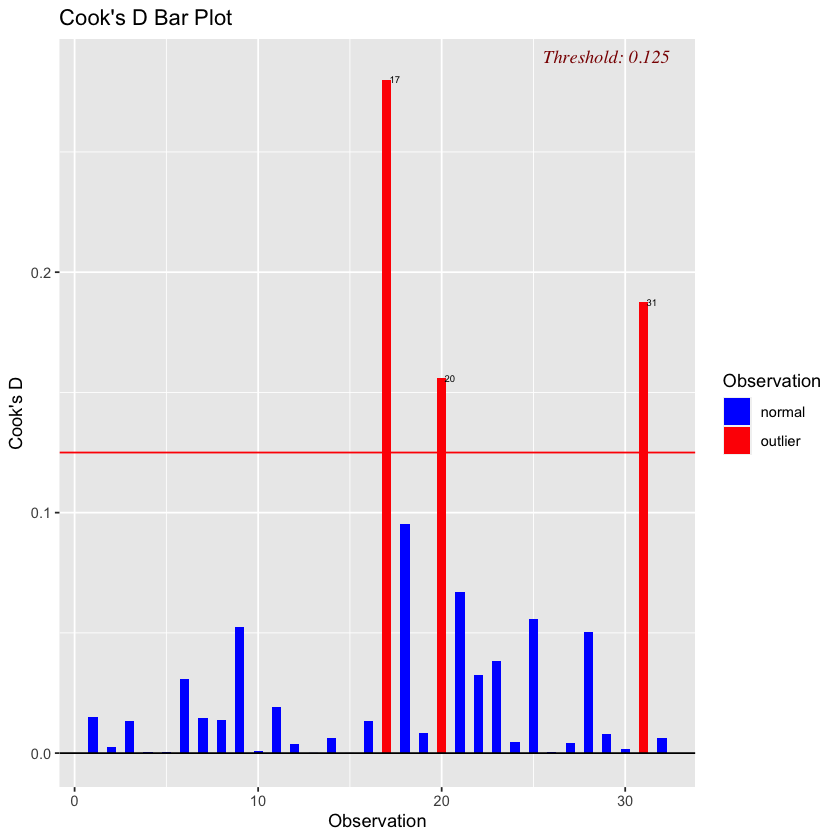

In [147]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_cooksd_bar(model)


#### Cook's D Chart

Chart of Cook's distance to detect observations that strongly influence fitted values of the model.


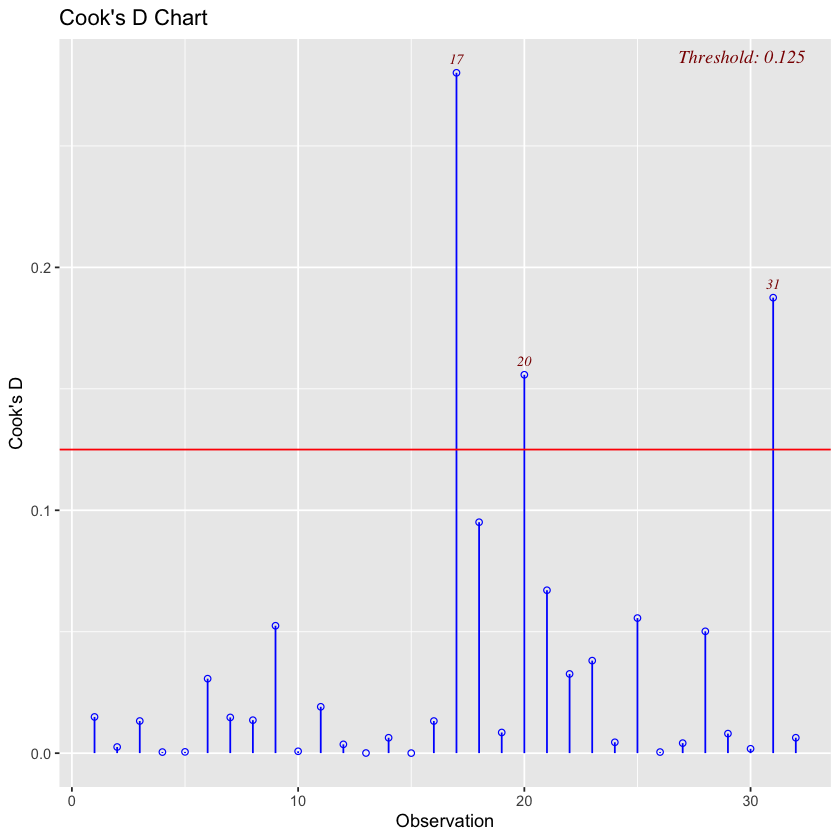

In [148]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_cooksd_chart(model)


#### DFBETAs Panel

DFBETA measures the difference in each parameter estimate with and without the influential point. There is a DFBETA for each data point i.e if there are n observations and k variables, there will be *n∗k* DFBETAs. In general, large values of DFBETAS indicate observations that are influential in estimating a given parameter. Belsley, Kuh, and Welsch recommend 2 as a general cutoff value to indicate influential observations and *2/√n* as a size-adjusted cutoff.


[[1]]
NULL


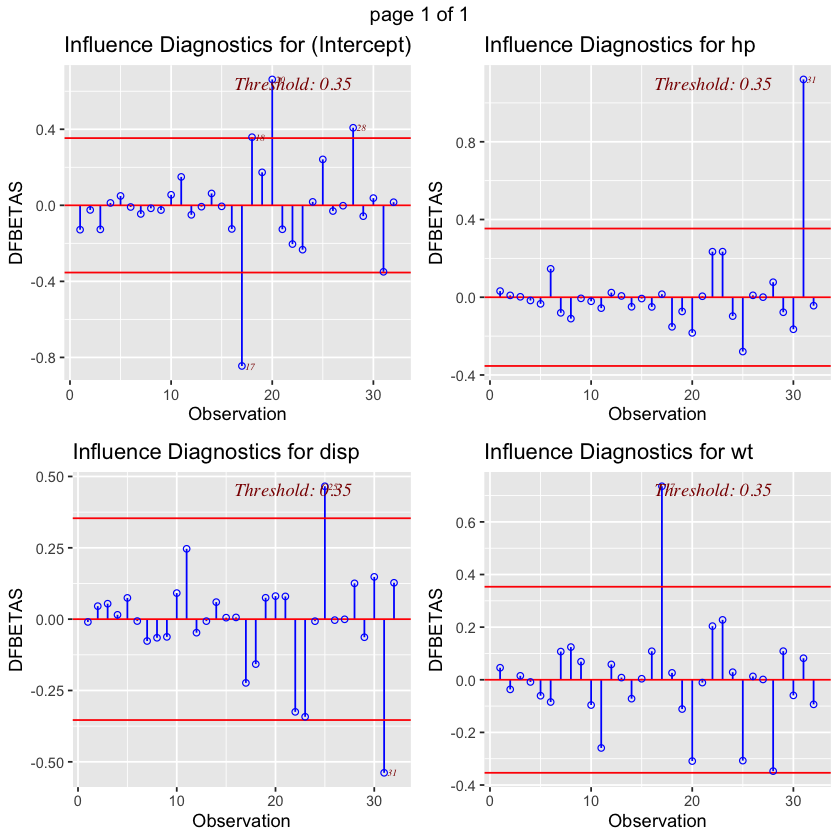

In [149]:
model <- lm(mpg ~ disp + hp + wt, data = mtcars)
ols_plot_dfbetas(model)


#### DFFITS Plot

Proposed by Welsch and Kuh (1977). It is the scaled difference between the *i^th* fitted value obtained from the full data and the *i^th* fitted value obtained by deleting the ith observation. DFFIT - difference in fits, is used to identify influential data points. It quantifies the number of standard deviations that the fitted value changes when the *i^th* data point is omitted.

Steps to compute DFFITs:

-   delete observations one at a time.
-   refit the regression model on remaining observations
-   examine how much all of the fitted values change when the ith observation is deleted.


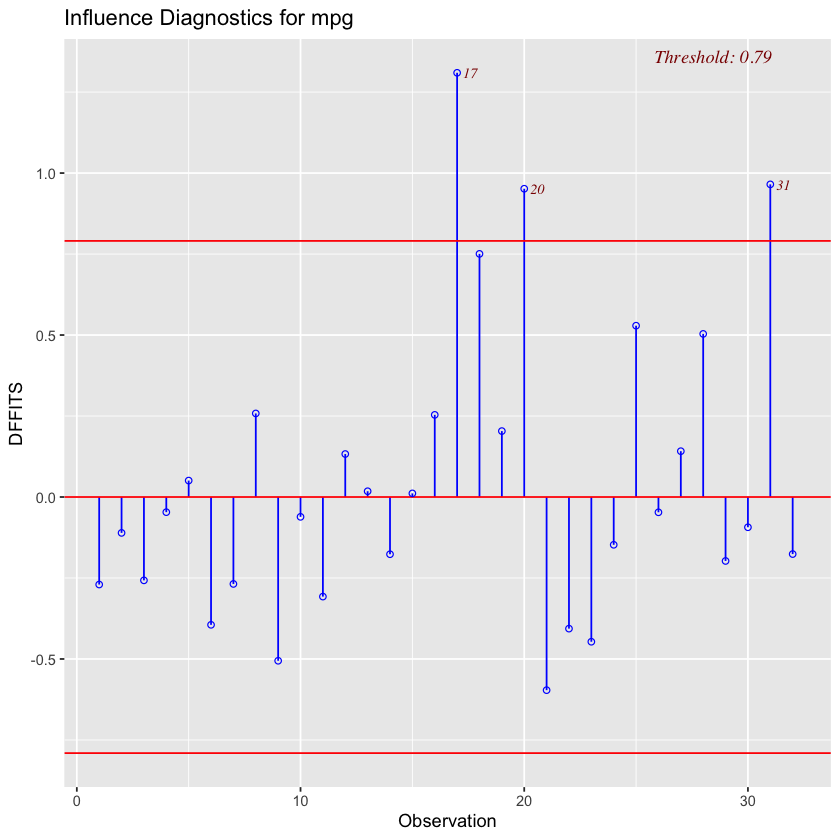

In [150]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_dffits(model)


#### Studentized Residual Plot

Plot for detecting outliers. Studentized deleted residuals (or externally studentized residuals) is the deleted residual divided by its estimated standard deviation. Studentized residuals are going to be more effective for detecting outlying Y observations than standardized residuals. If an observation has an externally studentized residual that is larger than 3 (in absolute value) we can call it an outlier.


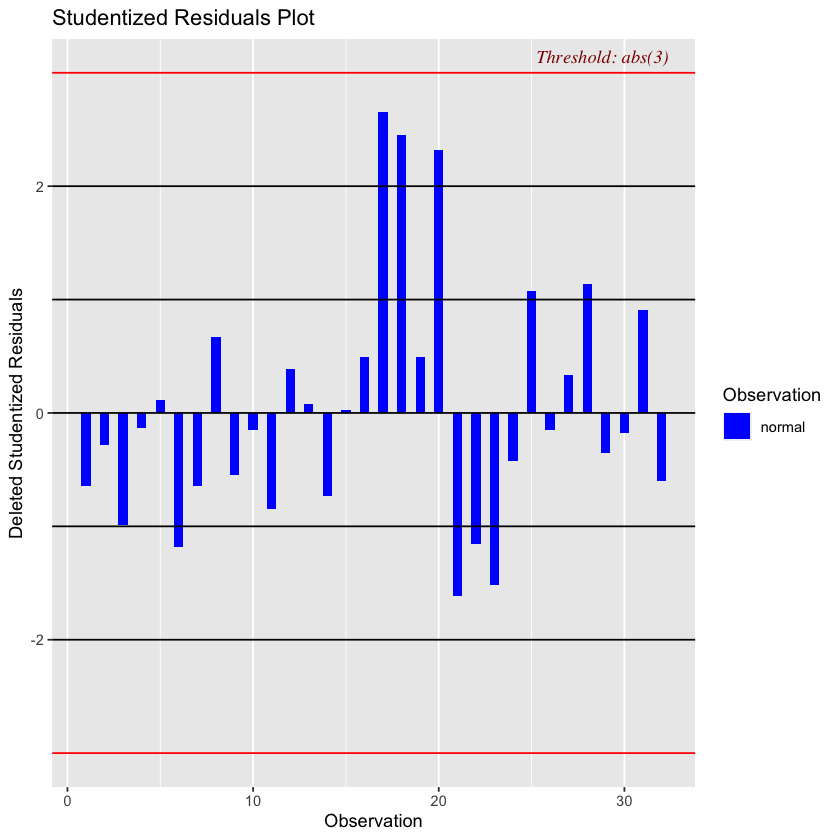

In [151]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_stud(model)


#### Standardized Residual Chart

Chart for detecting outliers. Standardized residual (internally studentized) is the residual divided by estimated standard deviation.


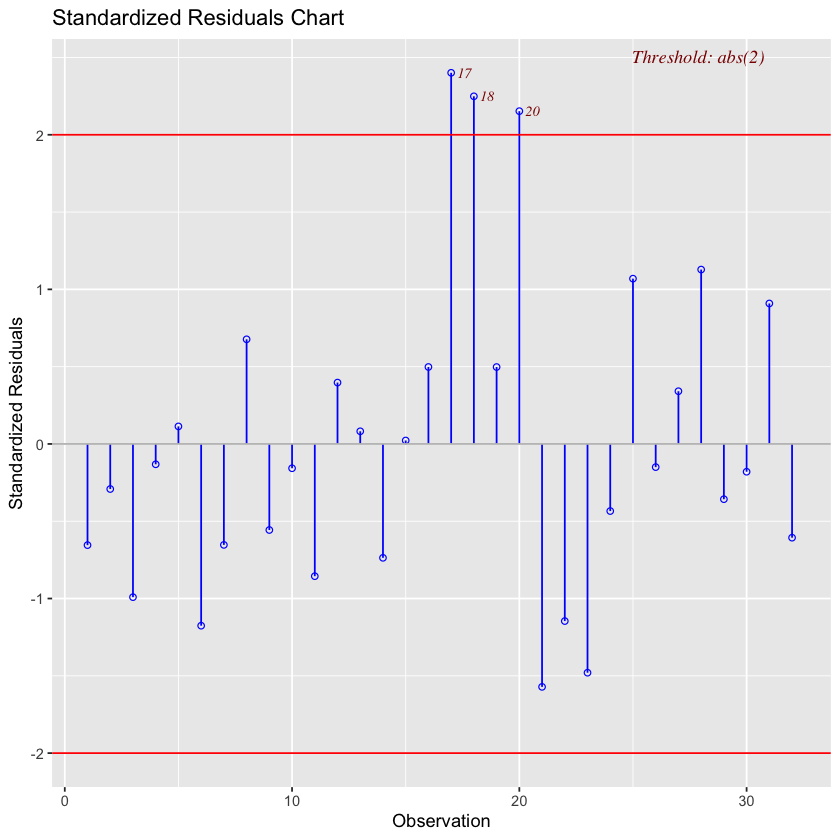

In [152]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_stand(model)


#### Studentized Residuals vs Leverage Plot

Graph for detecting influential observations.


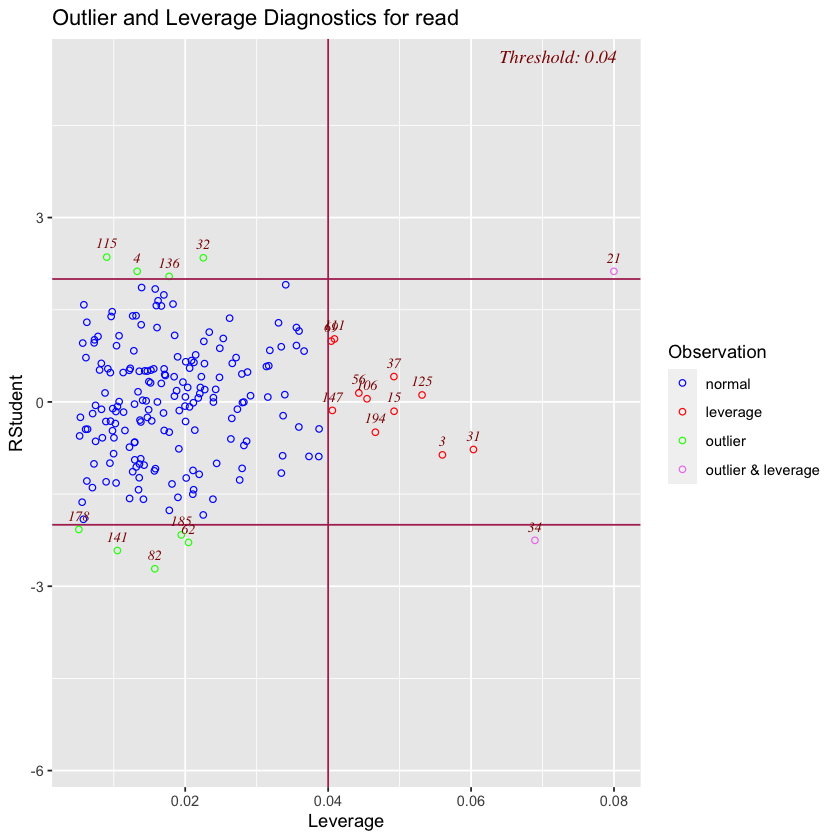

In [153]:
model <- lm(read ~ write + math + science, data = hsb)
ols_plot_resid_lev(model)


#### Deleted Studentized Residual vs Fitted Values Plot

Graph for detecting outliers.


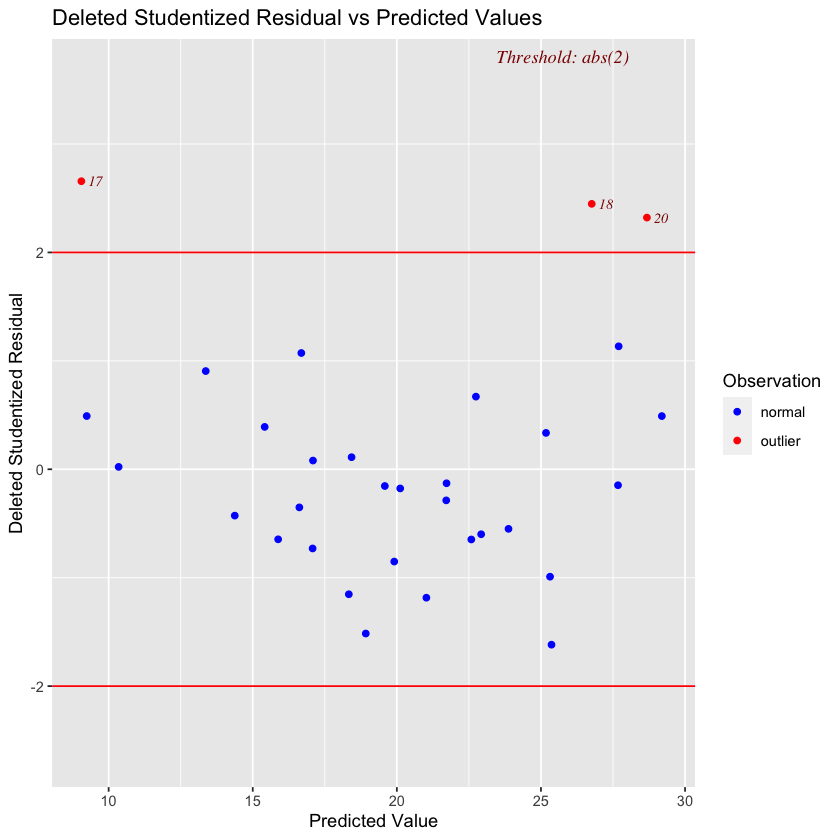

In [154]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_stud_fit(model)


#### Hadi Plot

Hadi's measure of influence based on the fact that influential observations can be present in either the response variable or in the predictors or both. The plot is used to detect influential observations based on Hadi's measure.


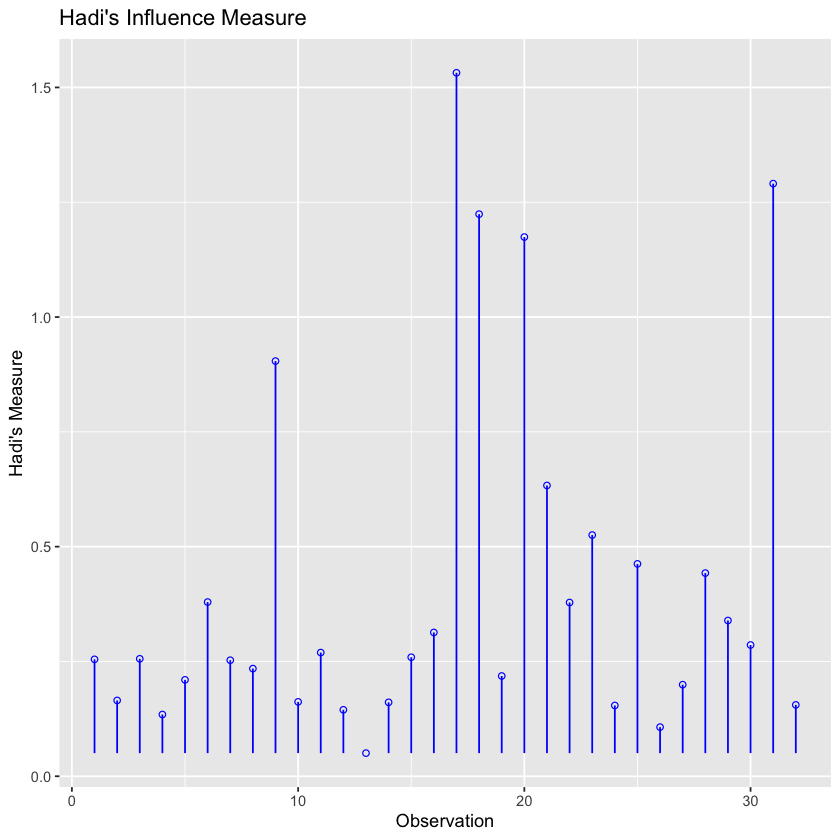

In [155]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_hadi(model)


#### Potential Residual Plot

Plot to aid in classifying unusual observations as high-leverage points, outliers, or a combination of both.


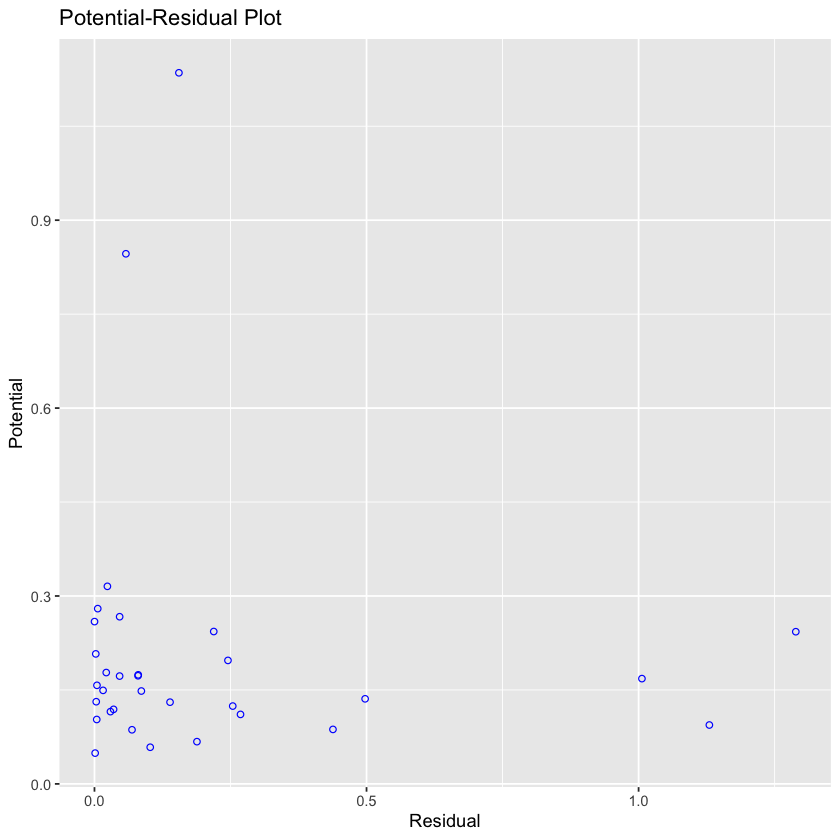

In [156]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_pot(model)


### f) Collinearity Diagnostics, Model Fit & Variable Contribution

#### Collinearity Diagnostics

Collinearity implies two variables are near perfect linear combinations of one another. Multicollinearity involves more than two variables. In the presence of multicollinearity, regression estimates are unstable and have high standard errors.

#### VIF

Variance inflation factors measure the inflation in the variances of the parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient βk is "inflated" by the existence of correlation among the predictor variables in the model. A VIF of 1 means that there is no correlation among the kth predictor and the remaining predictor variables, and hence the variance of βk is not inflated at all. The general rule of thumb is that VIFs exceeding 4 warrant further investigation, while VIFs exceeding 10 are signs of serious multicollinearity requiring correction.

Steps to calculate VIF:

Regress the *k^th* predictor on rest of the predictors in the model. Compute the *R^2 k*


In [157]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_vif_tol(model)


Variables Tolerance VIF     
1 disp      0.1252279 7.985439
2 hp        0.1935450 5.166758
3 wt        0.1445726 6.916942
4 qsec      0.3191708 3.133119

Condition Index

Most multivariate statistical approaches involve decomposing a correlation matrix into linear combinations of variables. The linear combinations are chosen so that the first combination has the largest possible variance (subject to some restrictions we won't discuss), the second combination has the next largest variance, subject to being uncorrelated with the first, the third has the largest possible variance, subject to being uncorrelated with the first and second, and so forth. The variance of each of these linear combinations is called an eigenvalue. Collinearity is spotted by finding 2 or more variables that have large proportions of variance (.50 or more) that correspond to large condition indices. A rule of thumb is to label as large those condition indices in the range of 30 or larger.


In [158]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_eigen_cindex(model)


Eigenvalue  Condition Index intercept   disp        hp          wt          
1 4.721487187  1.000000       0.000123237 0.001132468 0.001413094 0.0005253393
2 0.216562203  4.669260       0.002617424 0.036811051 0.027751289 0.0002096014
3 0.050416837  9.677242       0.001656551 0.120881424 0.392366164 0.0377028008
4 0.010104757 21.616057       0.025805998 0.777260487 0.059594623 0.7017528428
5 0.001429017 57.480524       0.969796790 0.063914571 0.518874831 0.2598094157
  qsec        
1 0.0001277169
2 0.0046789491
3 0.0001952599
4 0.0024577686
5 0.9925403056

Collinearity Diagnostics



In [159]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_coll_diag(model)


Tolerance and Variance Inflation Factor
---------------------------------------
  Variables Tolerance      VIF
1      disp 0.1252279 7.985439
2        hp 0.1935450 5.166758
3        wt 0.1445726 6.916942
4      qsec 0.3191708 3.133119


Eigenvalue and Condition Index
------------------------------
   Eigenvalue Condition Index   intercept        disp          hp           wt
1 4.721487187        1.000000 0.000123237 0.001132468 0.001413094 0.0005253393
2 0.216562203        4.669260 0.002617424 0.036811051 0.027751289 0.0002096014
3 0.050416837        9.677242 0.001656551 0.120881424 0.392366164 0.0377028008
4 0.010104757       21.616057 0.025805998 0.777260487 0.059594623 0.7017528428
5 0.001429017       57.480524 0.969796790 0.063914571 0.518874831 0.2598094157
          qsec
1 0.0001277169
2 0.0046789491
3 0.0001952599
4 0.0024577686
5 0.9925403056

#### Model Fit Assessment

Residual Fit Spread Plot

Plot to detect non-linearity, influential observations and outliers. Consists of side-by-side quantile plots of the centered fit and the residuals. It shows how much variation in the data is explained by the fit and how much remains in the residuals. For inappropriate models, the spread of the residuals in such a plot is often greater than the spread of the centered fit.


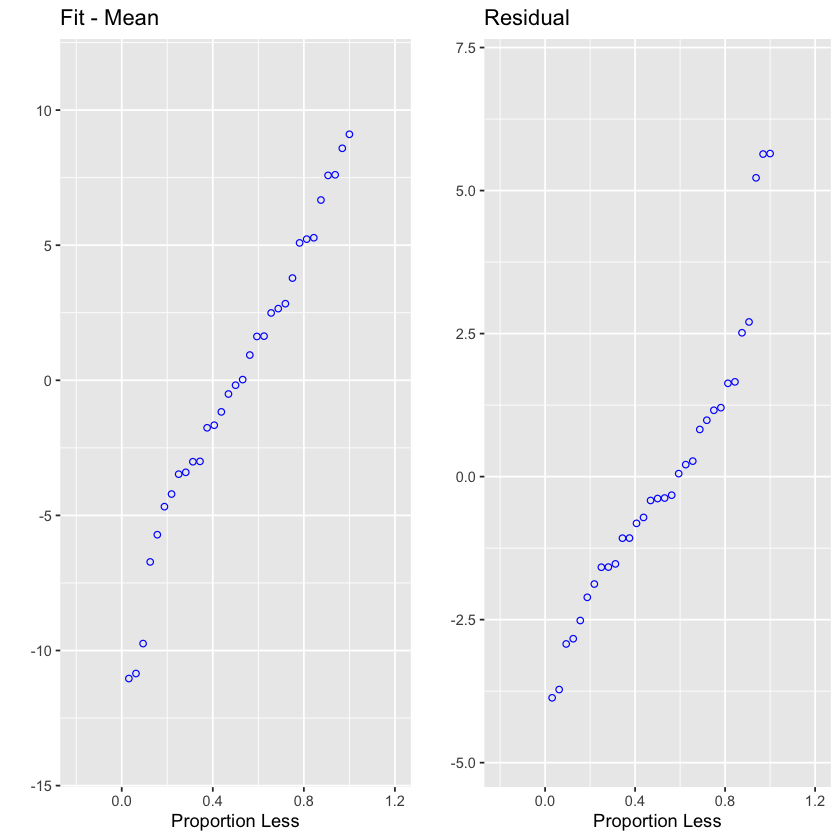

In [160]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_resid_fit_spread(model)


Part & Partial Correlations

**Correlations** Relative importance of independent variables in determining Y. How much each variable uniquely contributes to R2 over and above that which can be accounted for by the other predictors.

**Zero Order** Pearson correlation coefficient between the dependent variable and the independent variables.

**Part** Unique contribution of independent variables. How much R2 will decrease if that variable is removed from the model?

**Partial** How much of the variance in Y, which is not estimated by the other independent variables in the model, is estimated by the specific variable?


In [161]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_correlations(model)


Zero-order Partial     Part       
disp -0.8475514  0.04773567  0.01940396
hp   -0.7761684 -0.22422544 -0.09341969
wt   -0.8676594 -0.57386614 -0.28451535
qsec  0.4186840  0.21903983  0.09114896

Observed vs Predicted Plot

Plot of observed vs fitted values to assess the fit of the model. Ideally, all your points should be close to a regressed diagonal line. Draw such a diagonal line within your graph and check out where the points lie. If your model had a high R Square, all the points would be close to this diagonal line. The lower the R Square, the weaker the Goodness of fit of your model, the more foggy or dispersed your points are from this diagonal line.


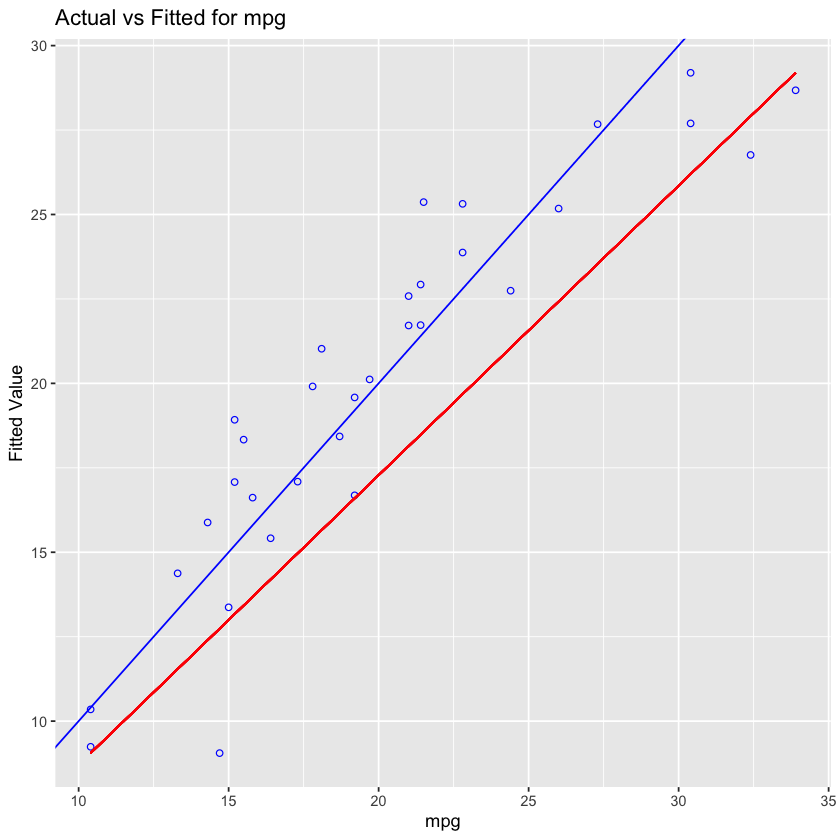

In [162]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_obs_fit(model)


Lack of Fit F Test

Assess how much of the error in prediction is due to lack of model fit. The residual sum of squares resulting from a regression can be decomposed into 2 components:

-   Due to lack of fit
-   Due to random variation

If most of the error is due to lack of fit and not just random error, the model should be discarded and a new model must be built. The lack of fit F test works only with simple linear regression. Moreover, it is important that the data contains repeat observations i.e. replicates for at least one of the values of the predictor x. This test generally only applies to datasets with plenty of replicates.


In [163]:
model <- lm(mpg ~ disp, data = mtcars)
ols_pure_error_anova(model)


Lack of Fit F Test 
-----------------
Response :   mpg 
Predictor:   disp 

                      Analysis of Variance Table                       
----------------------------------------------------------------------
                DF     Sum Sq     Mean Sq     F Value        Pr(>F)    
----------------------------------------------------------------------
disp             1    808.8885    808.8885    314.0095    1.934413e-17 
Residual        30    317.1587    10.57196                             
 Lack of fit    25    304.2787    12.17115    4.724824      0.04563623 
 Pure Error      5       12.88       2.576                             
----------------------------------------------------------------------

Diagnostics Panel

Panel of plots for regression diagnostics


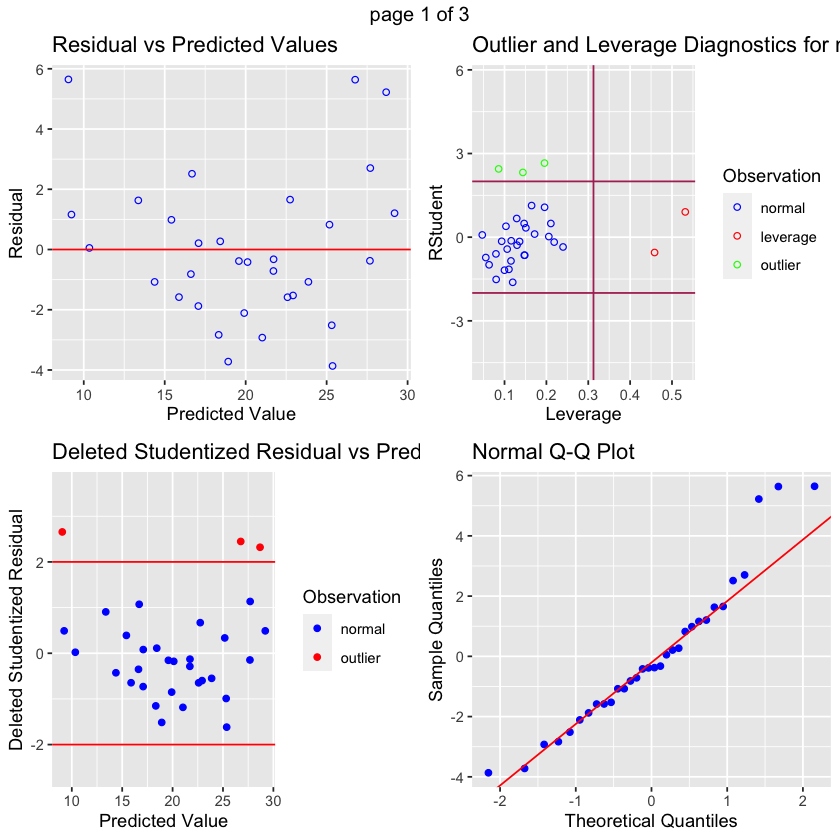

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL


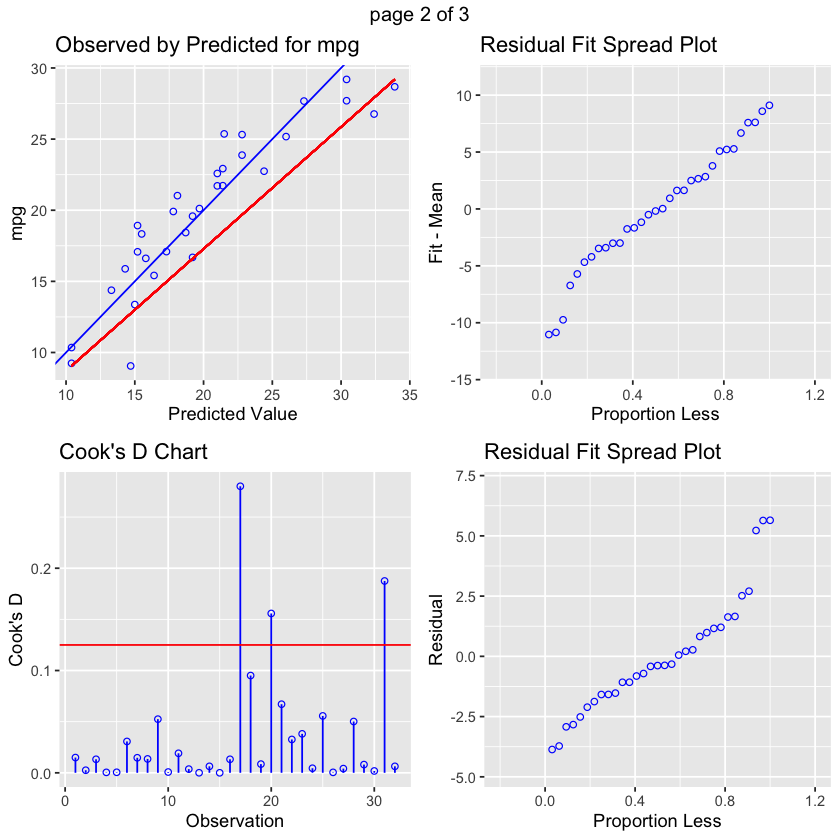

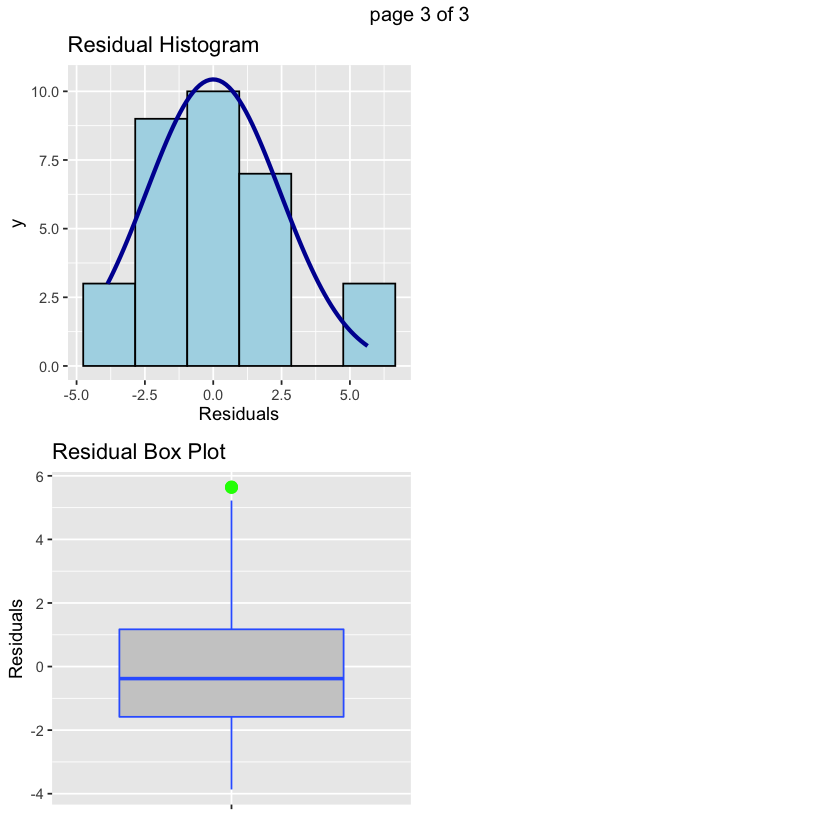

In [164]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_diagnostics(model)


#### Variable Contributions

Residual vs Regressor Plots

Graph to determine whether we should add a new predictor to the model already containing other predictors. The residuals from the model is regressed on the new predictor and if the plot shows non random pattern, you should consider adding the new predictor to the model.


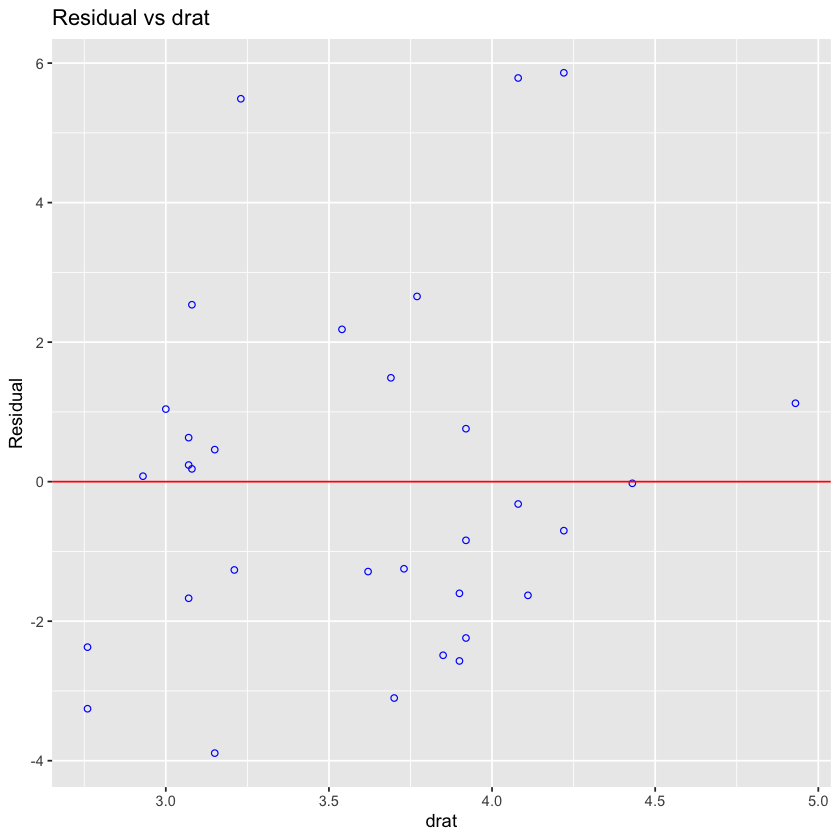

In [165]:
model <- lm(mpg ~ disp + hp + wt, data = mtcars)
ols_plot_resid_regressor(model, 'drat')


Added Variable Plot

Added variable plot provides information about the marginal importance of a predictor variable Xk, given the other predictor variables already in the model. It shows the marginal importance of the variable in reducing the residual variability.

It enables us to visualize the regression coefficient of a new variable being considered to be included in a model. The plot can be constructed for each predictor variable.

Steps to construct an added variable plot:

-   Regress Y on all variables other than X and store the residuals (Y residuals).
-   Regress X on all the other variables included in the model (X residuals).
-   Construct a scatter plot of Y residuals and X residuals.

A strong linear relationship in the added variable plot indicates the increased importance of the contribution of X to the model already containing the other predictors.


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



[[1]]
NULL


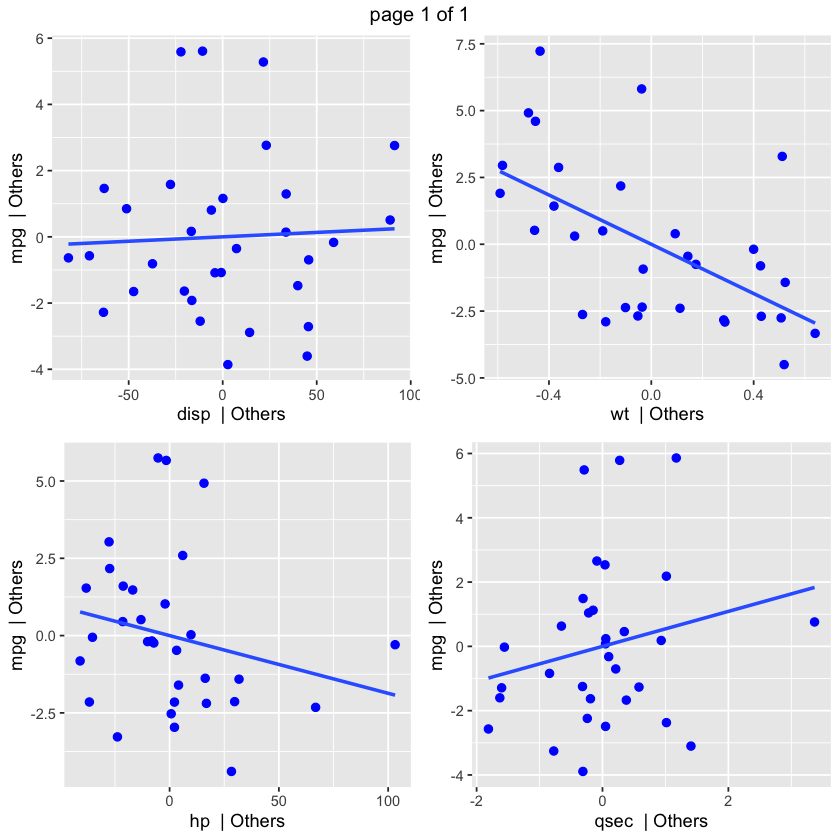

In [166]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_added_variable(model)


Residual Plus Component Plot

The residual plus component plot was introduced by Ezekeil (1924). It was called as Partial Residual Plot by Larsen and McCleary (1972). Hadi and Chatterjee (2012) called it the residual plus component plot.

Steps to construct the plot:

-   Regress **Y** on all variables including **X** and store the residuals (**e**).
-   Multiply **e** with regression coefficient of **X** (**eX**).
-   Construct scatter plot of **eX** and **X**

The residual plus component plot indicates whether any non-linearity is present in the relationship between **Y** and **X** and can suggest possible transformations for linearizing the data.


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



[[1]]
NULL


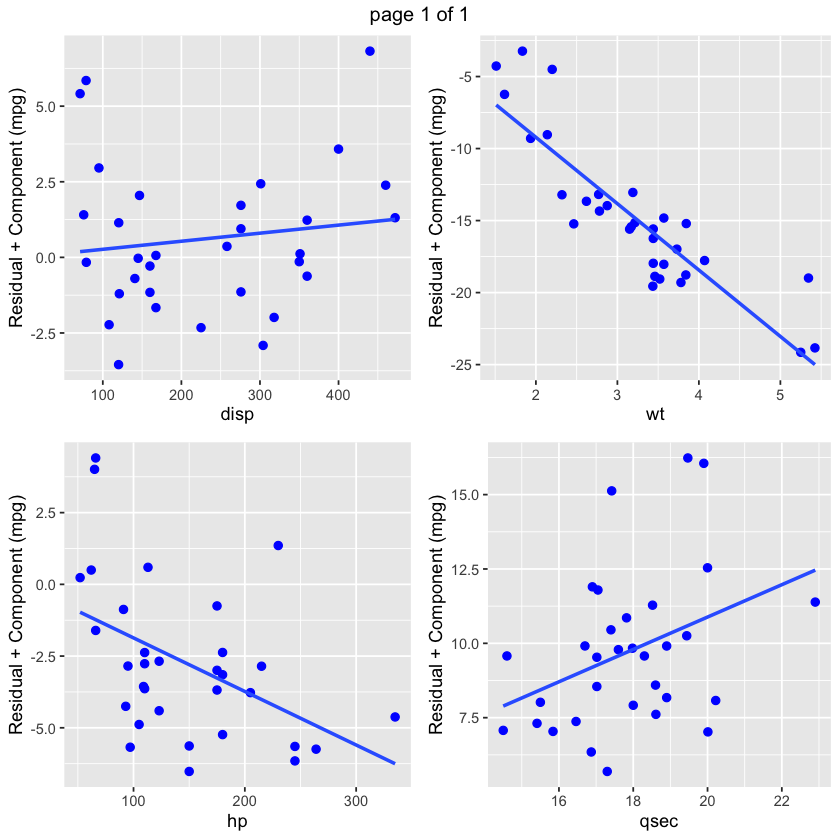

In [167]:
model <- lm(mpg ~ disp + hp + wt + qsec, data = mtcars)
ols_plot_comp_plus_resid(model)


## 2. The *blorr* Package

a\) A Short Introduction to the blorr Package

### Data

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets: 1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014] 2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs. 3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Attribute Information:

Input variables: Bank client data: 1 - age (numeric) 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') 5 - default: has credit in default? (categorical: 'no','yes','unknown') 6 - housing: has housing loan? (categorical: 'no','yes','unknown') 7 - loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) 14 - previous: number of contacts performed before this campaign and for this client (numeric) 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric) 17 - cons.price.idx: consumer price index - monthly indicator (numeric) 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 19 - euribor3m: euribor 3 month rate - daily indicator (numeric) 20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target): 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

To demonstrate the features of blorr, we will use the bank marketing data set. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. It contains a random sample (\~4k) of the original data set which can be found at <https://archive.ics.uci.edu/ml/datasets/bank+marketing>

In order to execute, all character variables were transformed to Factor. Also the response variable was transformed to 1 for yes and 0 for now.

#### Bibliography source:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


In [168]:
library(blorr)
library(magrittr)
library(readr)

bank_marketing <- read_delim("bank.csv", delim = ";", 
    escape_double = FALSE, trim_ws = TRUE)

bank_marketing[sapply(bank_marketing, is.character)] <- lapply(bank_marketing[sapply(bank_marketing, is.character)], 
                                                           as.factor)
bank_marketing<-as.data.frame(bank_marketing)

bank_marketing$y<-as.factor(ifelse(bank_marketing$y=="yes",1,0))



Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Rows: 4521 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (10): job, marital, education, default, housing, loan, contact, month, p...
dbl  (7): age, balance, day, duration, campaign, pdays, previous

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Bivariate Analysis

Let us begin with careful bivariate analysis of each possible variable and the outcome variable. We will use information value and likelihood ratio chi square test for selecting the initial set of predictors for our model. The bivariate analysis is currently available for categorical predictors only.


In [169]:
blr_bivariate_analysis(bank_marketing, y, job, marital, education, default, 
  housing, loan, contact, poutcome)


                          Bivariate Analysis                           
----------------------------------------------------------------------
Variable     Information Value    LR Chi Square    LR DF    LR p-value 
----------------------------------------------------------------------
   job             0.13              62.6171        11        0.0000   
 marital           0.04              18.6302         2        1e-04    
education          0.03              14.8259         3        0.0020   
 default           0.00              0.0076          1        0.9305   
 housing           0.11              49.0572         1        0.0000   
  loan             0.06              25.7773         1        0.0000   
 contact           0.25             102.3786         2        0.0000   
poutcome           0.46             235.5376         3        0.0000   
----------------------------------------------------------------------

### Weight of Evidence & Information Value

Weight of evidence (WoE) is used to assess the relative risk of different attributes for a characteristic and as a means to transform characteristics into variables. It is also a very useful tool for binning. The WoE for any group with average odds is zero. A negative WoE indicates that the proportion of defaults is higher for that attribute than the overall proportion and indicates higher risk.

The information value is used to rank order variables in terms of their predictive power. A high information value indicates a high ability to discriminate. Values for the information value will always be positive and may be above 3 when assessing highly predictive characteristics. Characteristics with information values less than 0:10 are typically viewed as weak, while values over 0.30 are sought after.


In [170]:
blr_woe_iv(bank_marketing, job, y)



                               Weight of Evidence                                
--------------------------------------------------------------------------------
   levels        count_0s    count_1s    dist_0s    dist_1s        woe      iv   
--------------------------------------------------------------------------------
   admin.          420          58          0.10       0.11      -0.06     0.00  
 blue-collar       877          69          0.22       0.13       0.50     0.04  
entrepreneur       153          15          0.04       0.03       0.28     0.00  
  housemaid         98          14          0.02       0.03      -0.09     0.00  
 management        838         131          0.21       0.25      -0.18     0.01  
   retired         176          54          0.04       0.10      -0.86     0.05  
self-employed      163          20          0.04       0.04       0.06     0.00  
  services         379          38          0.09       0.07       0.26     0.01  
   student        

### Plot



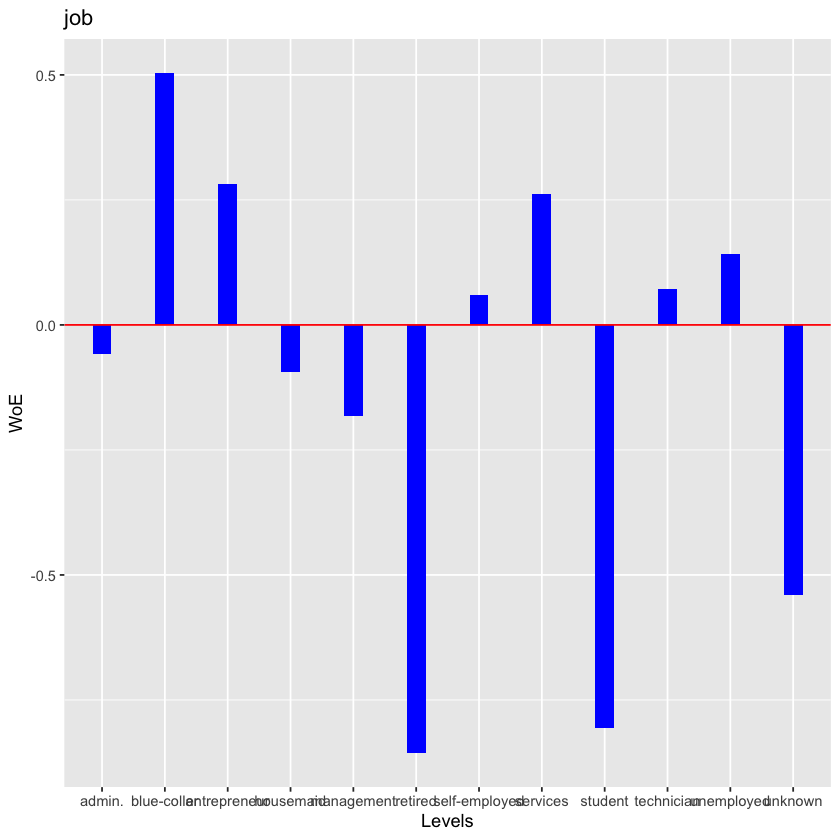

In [171]:
k <- blr_woe_iv(bank_marketing, job, y)
plot(k)


### Multiple Variables

We can generate the weight of evidence and information value for multiple variables using blr_woe_iv_stats().


In [172]:
blr_woe_iv_stats(bank_marketing, y, job, marital, education)



Variable: job

                               Weight of Evidence                                
--------------------------------------------------------------------------------
   levels        count_0s    count_1s    dist_0s    dist_1s        woe      iv   
--------------------------------------------------------------------------------
   admin.          420          58          0.10       0.11      -0.06     0.00  
 blue-collar       877          69          0.22       0.13       0.50     0.04  
entrepreneur       153          15          0.04       0.03       0.28     0.00  
  housemaid         98          14          0.02       0.03      -0.09     0.00  
 management        838         131          0.21       0.25      -0.18     0.01  
   retired         176          54          0.04       0.10      -0.86     0.05  
self-employed      163          20          0.04       0.04       0.06     0.00  
  services         379          38          0.09       0.07       0.26     0.01  
   

### Stepwise Selection

For the initial/ first cut model, all the independent variables are put into the model. Our goal is to include a limited number of independent variables (5-15) which are all significant, without sacrificing too much on the model performance. The rationale behind not-including too many variables is that the model would be over fitted and would become unstable when tested on the validation sample. The variable reduction is done using forward or backward or stepwise variable selection procedures. We will use blr_step_aic_both() to shortlist predictors for our model.

### Model


In [173]:
model <- glm(y ~ ., data = bank_marketing, family = binomial(link = 'logit'))



### Selection Summary



In [174]:
blr_step_aic_both(model)



Stepwise Selection Method 
-------------------------

Candidate Terms: 

1 . age 
2 . job 
3 . marital 
4 . education 
5 . default 
6 . balance 
7 . housing 
8 . loan 
9 . contact 
10 . day 
11 . month 
12 . duration 
13 . campaign 
14 . pdays 
15 . previous 
16 . poutcome 


Variables Entered/Removed: 

- duration added 
- poutcome added 
- month added 
- contact added 
- loan added 
- marital added 
- housing added 
- campaign added 
- education added 
- day added 

No more variables to be added or removed.



                     Stepwise Summary                      
---------------------------------------------------------
Variable      Method       AIC         BIC       Deviance 
---------------------------------------------------------
duration     addition    2705.753    2718.586    2701.753 
poutcome     addition    2472.218    2504.300    2462.218 
month        addition    2332.784    2435.448    2300.784 
contact      addition    2282.539    2398.036    2246.539 
loan         addition    2271.730    2393.643    2233.730 
marital      addition    2264.149    2398.895    2222.149 
housing      addition    2257.919    2399.082    2213.919 
campaign     addition    2254.283    2401.862    2208.283 
education    addition    2251.533    2418.362    2199.533 
day          addition    2249.500    2422.745    2195.500 
---------------------------------------------------------


As we can notice in the Stepwise Summary, as we start to add more variables, the AIC ad the deviance starts to improve. As we also can see on the following graphs.

#### Plot


Stepwise Selection Method 
-------------------------

Candidate Terms: 

1 . age 
2 . job 
3 . marital 
4 . education 
5 . default 
6 . balance 
7 . housing 
8 . loan 
9 . contact 
10 . day 
11 . month 
12 . duration 
13 . campaign 
14 . pdays 
15 . previous 
16 . poutcome 


Variables Entered/Removed: 

- duration added 
- poutcome added 
- month added 
- contact added 
- loan added 
- marital added 
- housing added 
- campaign added 
- education added 
- day added 

No more variables to be added or removed.

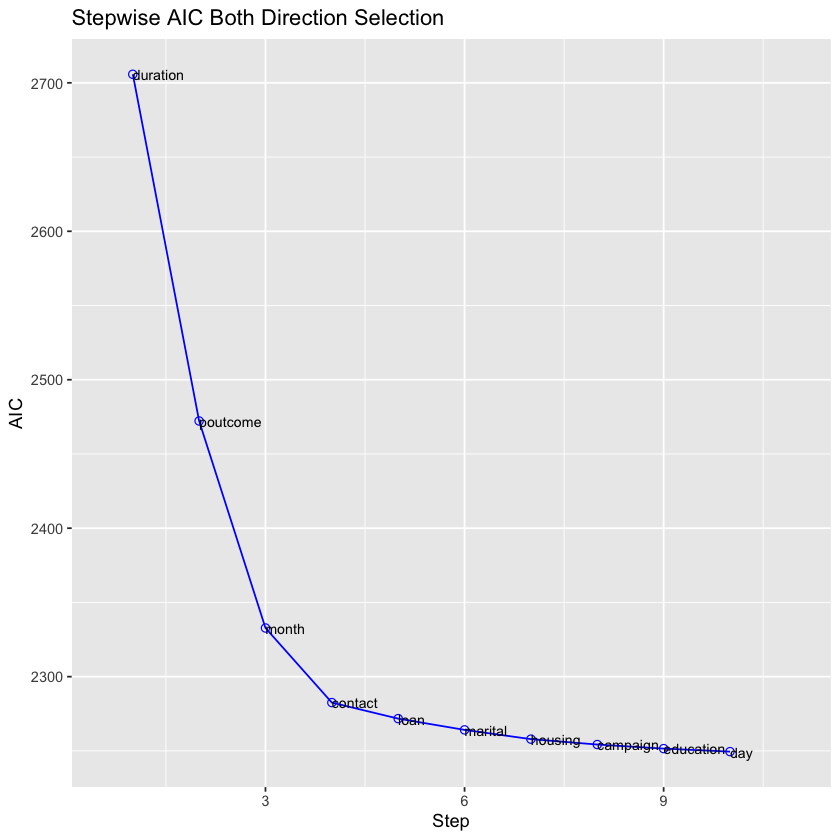

In [175]:
model %>%
  blr_step_aic_both() %>%
  plot()


### Regression Output

#### Model

We can use bivariate analysis and stepwise selection procedure to shortlist predictors and build the model using the glm(). The predictors used in the below model are for illustration purposes and not necessarily shortlisted from the bivariate analysis and variable selection procedures.


In [176]:
model <- glm(y ~  age + duration + previous + housing + default +
             loan + poutcome + job + marital, data = bank_marketing, 
             family = binomial(link = 'logit'))


Using model

Let us look at the output generated from blr_regress():


In [177]:
blr_regress(model)



                             Model Overview                              
------------------------------------------------------------------------
Data Set    Resp Var    Obs.    Df. Model    Df. Residual    Convergence 
------------------------------------------------------------------------
  data         y        4521      4520           4498           TRUE     
------------------------------------------------------------------------

                    Response Summary                     
--------------------------------------------------------
Outcome        Frequency        Outcome        Frequency 
--------------------------------------------------------
   0             4000              1              521    
--------------------------------------------------------

                     Maximum Likelihood Estimates                      
----------------------------------------------------------------------
   Parameter        DF    Estimate    Std. Error    z value    Pr(>|z

If you want to examine the odds ratio estimates, set odd_conf_limit to TRUE. The odds ratio estimates are not explicitly computed as we observed considerable increase in computation time when dealing with large data sets.

#### Using Formula

Let us use the model formula and the data set to generate the above results.


In [178]:
blr_regress(y ~  age + duration + previous + housing + default +
             loan + poutcome + job + marital, data = bank_marketing)


                             Model Overview                              
------------------------------------------------------------------------
Data Set    Resp Var    Obs.    Df. Model    Df. Residual    Convergence 
------------------------------------------------------------------------
  data         y        4521      4520           4498           TRUE     
------------------------------------------------------------------------

                    Response Summary                     
--------------------------------------------------------
Outcome        Frequency        Outcome        Frequency 
--------------------------------------------------------
   0             4000              1              521    
--------------------------------------------------------

                     Maximum Likelihood Estimates                      
----------------------------------------------------------------------
   Parameter        DF    Estimate    Std. Error    z value    Pr(>|z

#### Model Fit Statistics

Model fit statistics are available to assess how well the model fits the data and to compare two different models.The output includes likelihood ratio test, AIC, BIC and a host of pseudo r-squared measures.

#### Single Model


In [179]:
blr_model_fit_stats(model)



                               Model Fit Statistics                                
----------------------------------------------------------------------------------
Log-Lik Intercept Only:     -1615.500    Log-Lik Full Model:             -1168.896 
Deviance(4498):              2337.792    LR(22):                           893.208 
                                         Prob > LR:                          0.000 
MCFadden's R2                   0.276    McFadden's Adj R2:                  0.262 
ML (Cox-Snell) R2:              0.179    Cragg-Uhler(Nagelkerke) R2:         0.351 
McKelvey & Zavoina's R2:        0.352    Efron's R2:                         0.259 
Count R2:                       0.902    Adj Count R2:                       0.148 
BIC:                         2531.371    AIC:                             2383.792 
----------------------------------------------------------------------------------


### Model Validation

#### Confusion Matrix

In the event of deciding a cut-off point on the probability scores of a logistic regression model, a confusion matrix is created corresponding to a particular cut-off. The observations with probability scores above the cut-off score are predicted to be events and those below the cut-off score, as non-events. The confusion matrix, a 2X2 table, then calculates the number of correctly classified and miss-classified observations.


In [180]:
blr_confusion_matrix(model, cutoff = 0.5)



Confusion Matrix and Statistics 

          Reference
Prediction    0    1
         0 3919  363
         1   81  158


                Accuracy : 0.9018 
     No Information Rate : 0.8848 

                   Kappa : 0.3701 

McNemars's Test P-Value  : 0.0000 

             Sensitivity : 0.3033 
             Specificity : 0.9798 
          Pos Pred Value : 0.6611 
          Neg Pred Value : 0.9152 
              Prevalence : 0.1152 
          Detection Rate : 0.0349 
    Detection Prevalence : 0.0529 
       Balanced Accuracy : 0.6415 
               Precision : 0.6611 
                  Recall : 0.3033 

        'Positive' Class : 1

The validity of a cut-off is measured using sensitivity, specificity and accuracy.

Sensitivity: The % of correctly classified events out of all events = TP / (TP + FN)

Specificity: The % of correctly classified non-events out of all non-events = TN / (TN + FP)

Accuracy: The % of correctly classified observation over all observations = (TP + TN) / (TP + FP + TN + FN)

True Positive (TP) : Events correctly classified as events.

True Negative (TN) : Non-Events correctly classified as non-events.

False Positive (FP): Non-events miss-classified as events.

False Negative (FN): Events miss-classified as non-events.

For a standard logistic model, the higher is the cut-off, the lower will be the sensitivity and the higher would be the specificity. As the cut-off is decreased, sensitivity will go up, as then more events would be captured. Also, specificity will go down, as more non-events would miss-classified as events. Hence a trade-off is done based on the requirements. For example, if we are looking to capture as many events as possible, and we can afford to have miss-classified non-events, then a low cut-off is taken.

#### Hosmer Lemeshow Test

Hosmer and Lemeshow developed a goodness-of-fit test for logistic regression models with binary responses. The test involves dividing the data into approximately ten groups of roughly equal size based on the percentiles of the estimated probabilities. The observations are sorted in increasing order of their estimated probability of having an even outcome. The discrepancies between the observed and expected number of observations in these groups are summarized by the Pearson chi-square statistic, which is then compared to chi-square distribution with t degrees of freedom, where t is the number of groups minus 2. Lower values of Goodness-of-fit are preferred.


In [181]:
blr_test_hosmer_lemeshow(model)



           Partition for the Hosmer & Lemeshow Test            
--------------------------------------------------------------
                        def = 1                 def = 0        
Group    Total    Observed    Expected    Observed    Expected 
--------------------------------------------------------------
  1       453        3          6.41        450        446.59  
  2       452        2         10.34        450        441.66  
  3       452        8         13.47        444        438.53  
  4       452        6         17.06        446        434.94  
  5       452        16        21.27        436        430.73  
  6       452        25        27.10        427        424.90  
  7       452        31        34.94        421        417.06  
  8       452        58        49.75        394        402.25  
  9       452       126        87.30        326        364.70  
 10       452       246        253.36       206        198.64  
------------------------------------------

#### Gains Table & Lift Chart

A lift curve is a graphical representation of the % of cumulative events captured at a specific cut-off. The cut-off can be a particular decile or a percentile. Similar, to rank ordering procedure, the data is in descending order of the scores and is then grouped into deciles/percentiles. The cumulative number of observations and events are then computed for each decile/percentile. The lift curve is the created using the cumulative % population as the x-axis and the cumulative percentage of events as the y-axis.


In [182]:
blr_gains_table(model)



   decile total   1   0       ks  tp   tn   fp  fn sensitivity specificity
1       1   452 246 206 42.06689 246 3794  206 275    47.21689      94.850
2       2   452 126 326 58.10115 372 3468  532 149    71.40115      86.700
3       3   452  58 394 59.38359 430 3074  926  91    82.53359      76.850
4       4   452  31 421 54.80869 461 2653 1347  60    88.48369      66.325
5       5   452  25 427 48.93215 486 2226 1774  35    93.28215      55.650
6       6   452  16 436 41.10317 502 1790 2210  19    96.35317      44.750
7       7   452   6 446 31.10480 508 1344 2656  13    97.50480      33.600
8       8   452   8 444 21.54031 516  900 3100   5    99.04031      22.500
9       9   452   2 450 10.67418 518  450 3550   3    99.42418      11.250
10     10   453   3 450  0.00000 521    0 4000   0   100.00000       0.000
   accuracy
1  89.36076
2  84.93696
3  77.50498
4  68.87857
5  59.98673
6  50.69675
7  40.96439
8  31.32050
9  21.41119
10 11.52400

#### Lift Chart



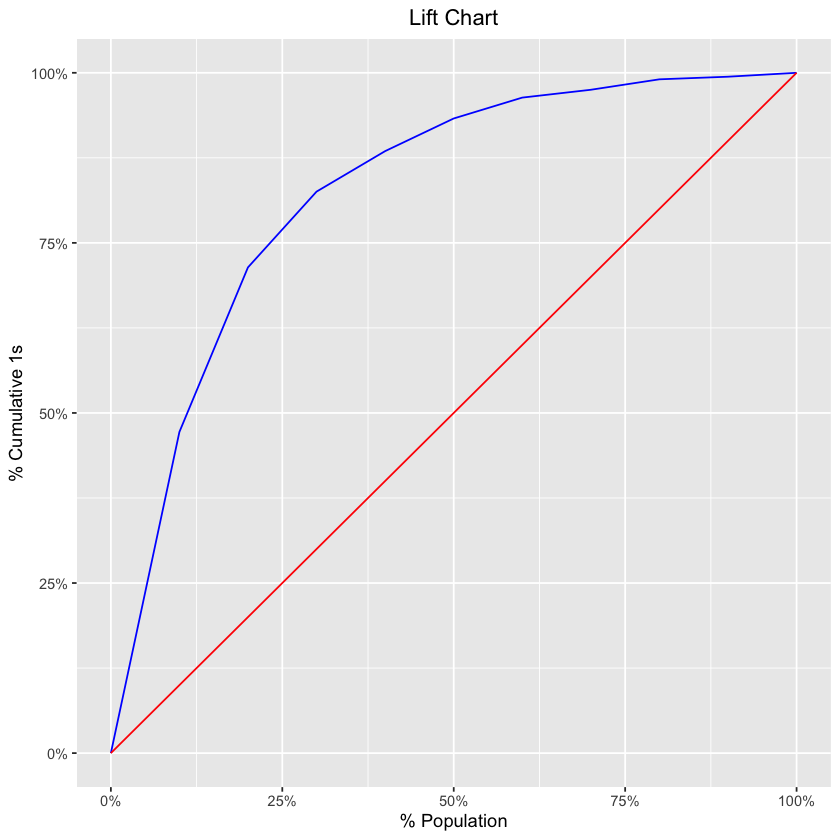

In [183]:
model %>%
    blr_gains_table() %>%
    plot()


#### ROC Curve

ROC curve is a graphical representation of the validity of cut-offs for a logistic regression model. The ROC curve is plotted using the sensitivity and specificity for all possible cut-offs, i.e., all the probability scores. The graph is plotted using sensitivity on the y-axis and 1-specificity on the x-axis. Any point on the ROC curve represents a sensitivity X (1-specificity) measure corresponding to a cut-off. The area under the ROC curve is used as a validation measure for the model – the bigger the area the better is the model.


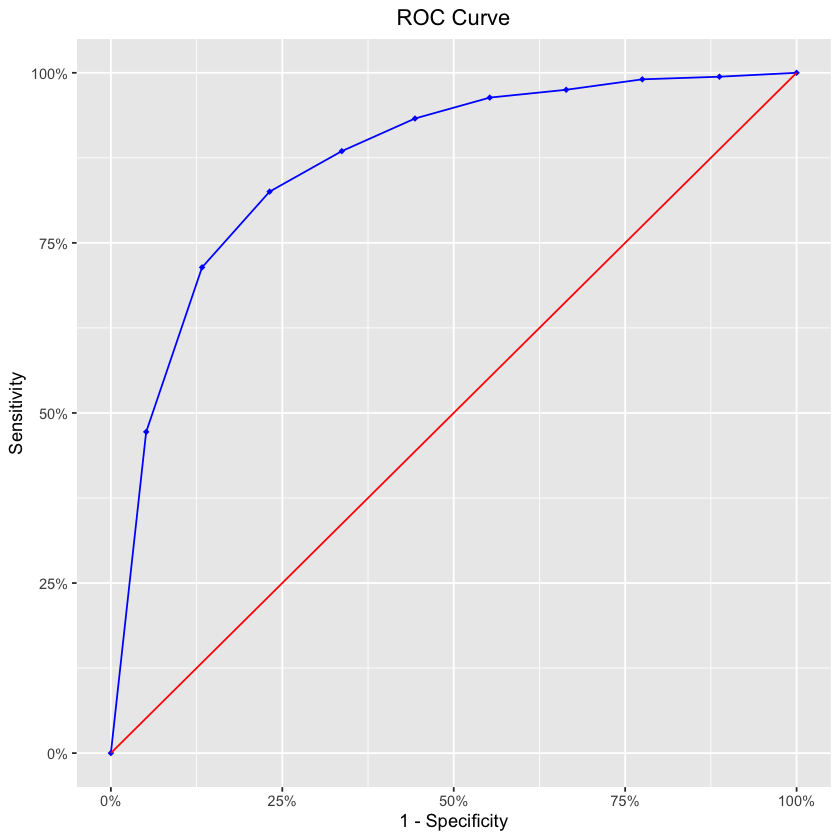

In [184]:
model %>%
    blr_gains_table() %>%
  blr_roc_curve()


#### KS Chart

The KS Statistic is again a measure of model efficiency, and it is created using the lift curve. The lift curve is created to plot % events. If we also plot % non-events on the same scale, with % population at x-axis, we would get another curve. The maximum distance between the lift curve for events and that for non-events is termed as KS. For a good model, KS should be big (>=0.3) and should occur as close to the event rate as possible.


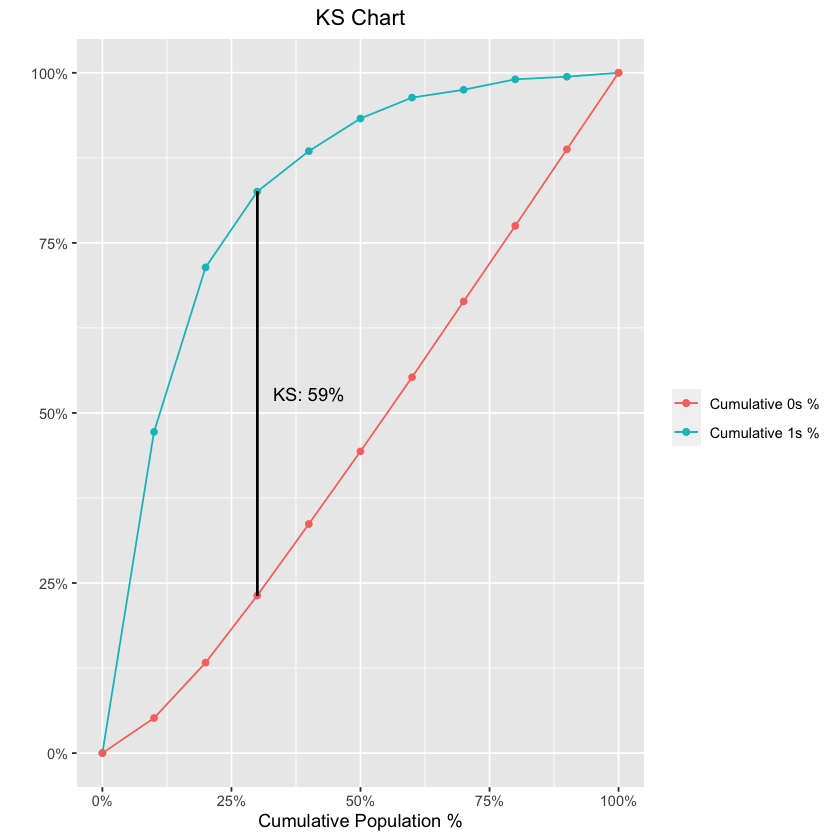

In [185]:
model %>%
    blr_gains_table() %>%
  blr_ks_chart()


#### Decile Lift Chart

The decile lift chart displays the lift over the global mean event rate for each decile. For a model with good discriminatory power, the top deciles should have an event/conversion rate greater than the global mean.


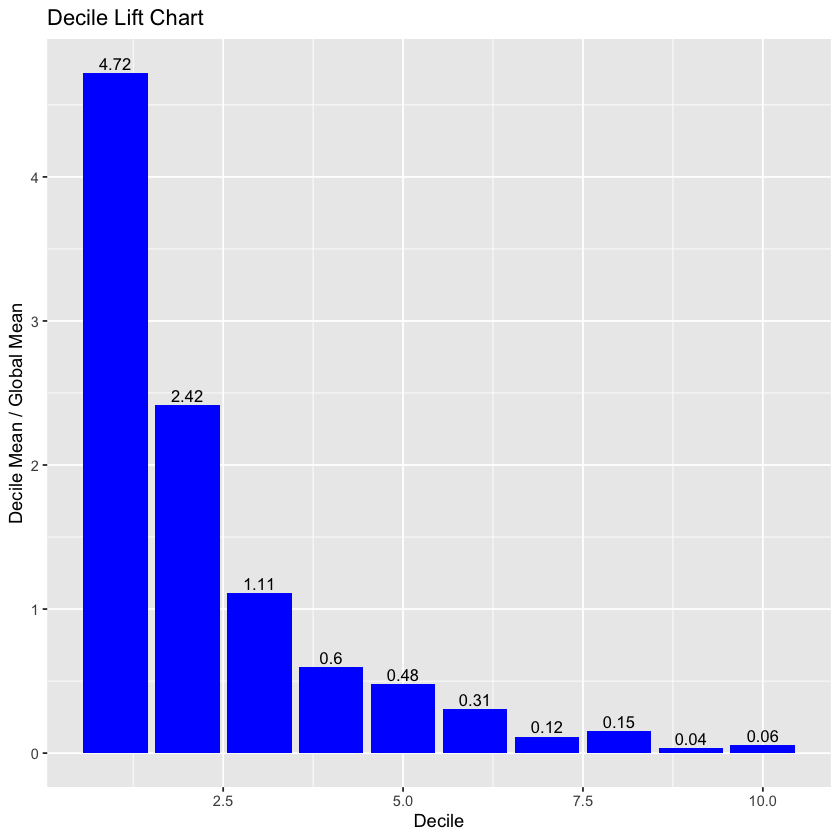

In [186]:
model %>%
  blr_gains_table() %>%
  blr_decile_lift_chart()


#### Capture Rate by Decile

If the model has good discriminatory power, the top deciles should have a higher event/conversion rate compared to the bottom deciles.


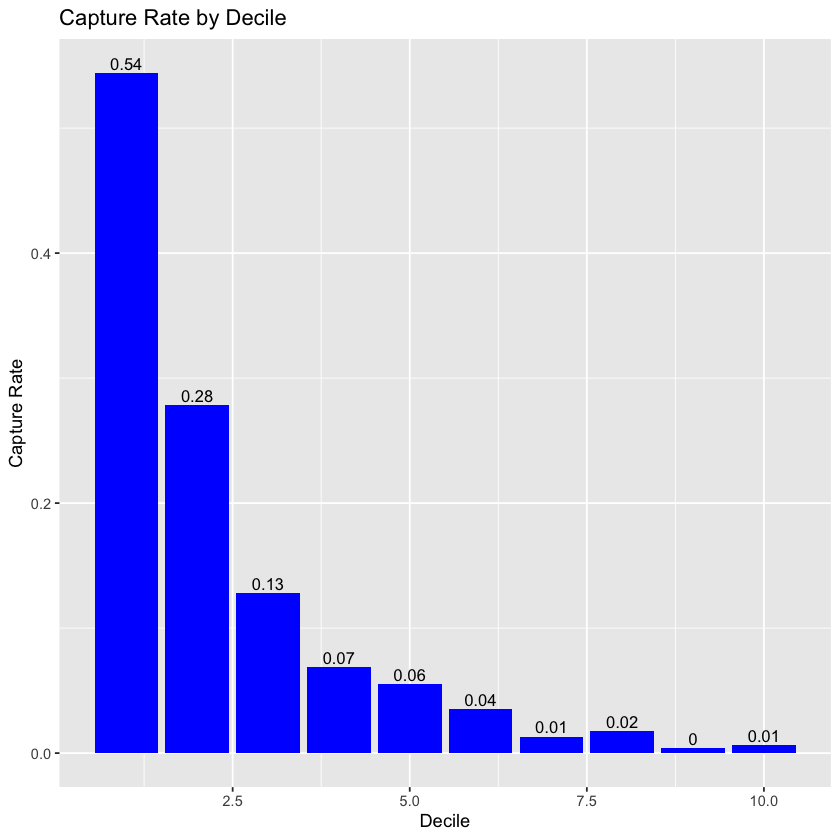

In [187]:
model %>%
  blr_gains_table() %>%
  blr_decile_capture_rate()


#### Lorenz Curve

The Lorenz curve is a simple graphic device which illustrates the degree of inequality in the distribution of thevariable concerned. It is a visual representation of inequality used to measure the discriminatory power of the predictive model.


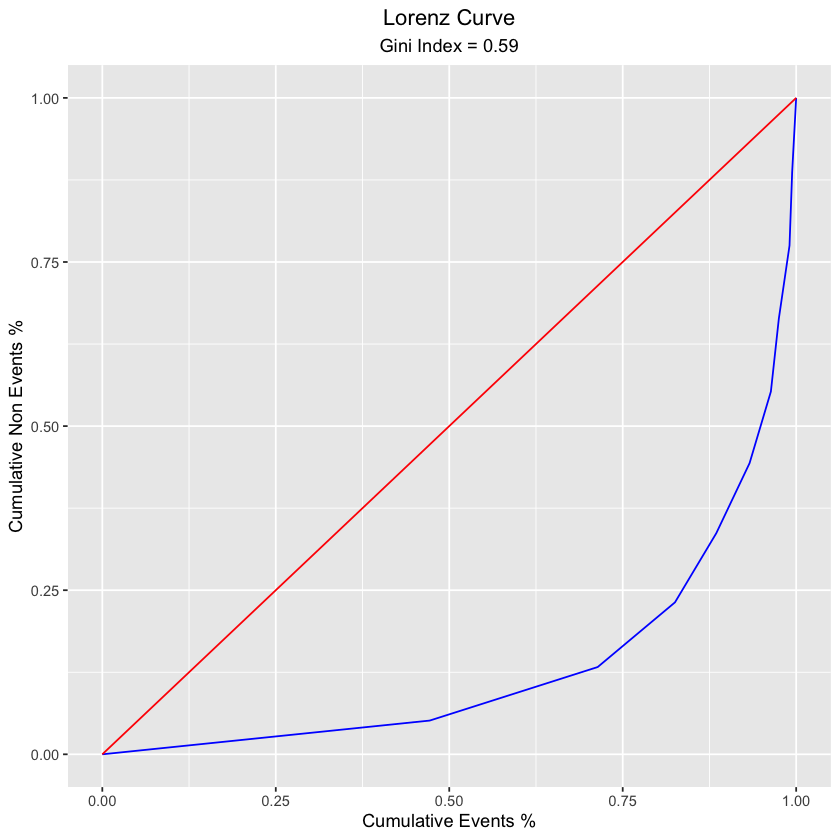

In [188]:
blr_lorenz_curve(model)



#### Residual & Influence Diagnostics

blorr can generate 22 plots for residual, influence and leverage diagnostics.

Influence Diagnostics


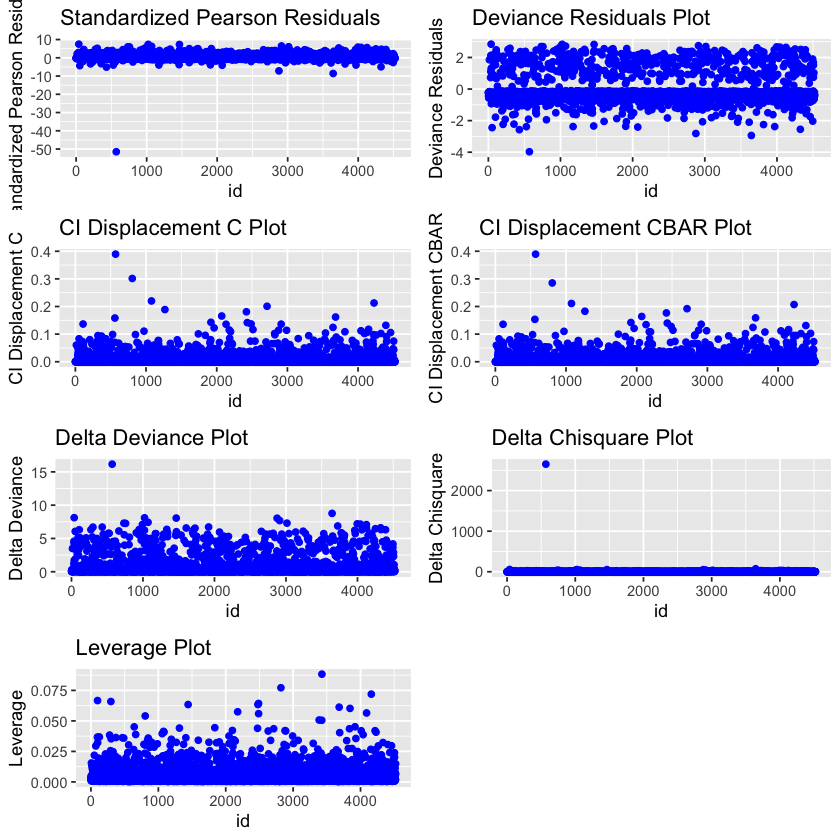

In [189]:
blr_plot_diag_influence(model)



From al the graphs above , we can focus and explain the Pearson residuals as the standardized distances between the observed and expected responses, and deviance residuals are defined as the signed square root of the individual contributions to the model deviance (i.e., the difference between the log-likelihoods of the saturated and fitted models)

On both residuals plots we can confirm that the residuals are stationary on all values.

#### Leverage Diagnostics


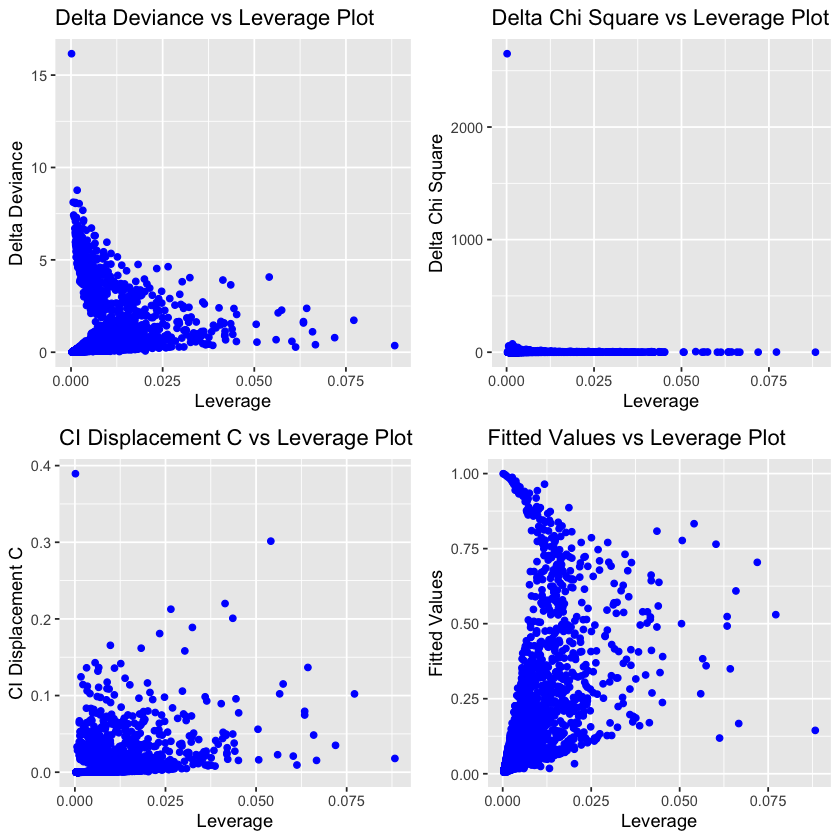

In [190]:
blr_plot_diag_leverage(model)



#### Fitted Values Diagnostics



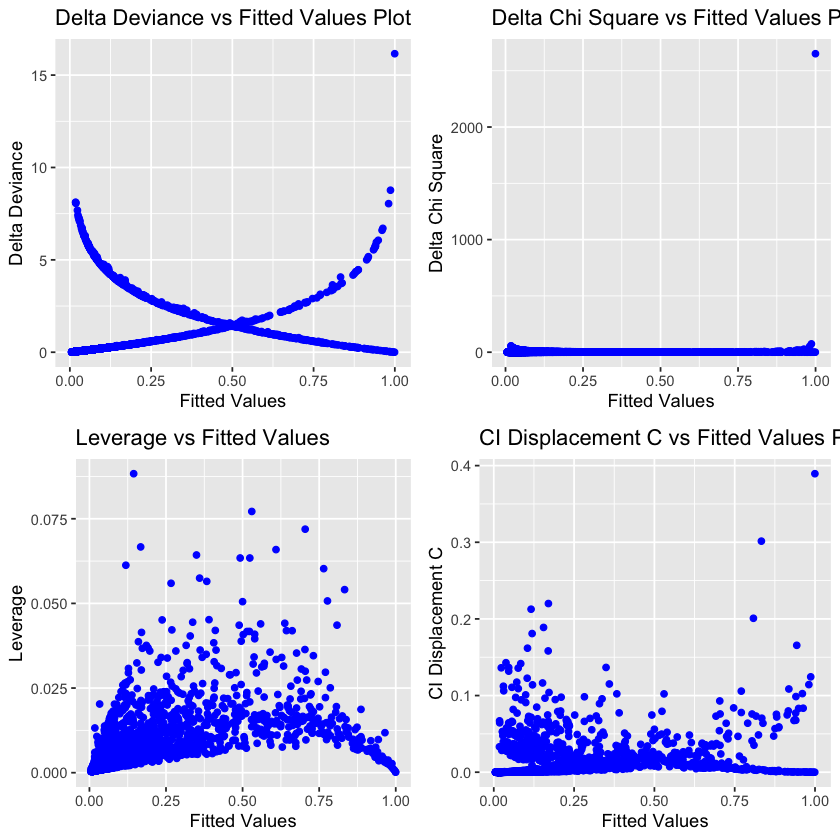

In [191]:
blr_plot_diag_fit(model)



The delta deviance measures the change in the deviance goodness-of-fit statistic because of deleting a specific factor/covariate pattern. Delta deviance can be large because of a large residual (deviance or Pearson) and/or a large leverage. Minitab calculates a value for each distinct factor/covariate pattern.

The delta chi-square is the change in Pearson chi-square because of deleting all the observations with the jth factor/covariate pattern. Minitab calculates a delta chi-square value for each distinct factor/covariate pattern. Observations that are not fit well by the model. have high delta chi-square values.
